In [1]:
#RUN IN SAOD or SAGEO (sageo has a problem with pandas min function)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
import scipy.io
from functools import reduce
from pyproj import Proj, transform #can run this fram sageo
import rasterio
import rasterstats
from netCDF4 import Dataset
import shapely
import rioxarray
import xarray
from functools import reduce
import glob
import re
import math
import folium
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib.transforms import Affine2D
from matplotlib.lines import Line2D
from geocube.api.core import make_geocube

# from osgeo import ogr
from shapely.geometry import MultiLineString, Point, LineString
from shapely import wkt
import sys

pd.set_option('display.max_columns', 200)
shapely.speedups.enable()

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# date_string='24July'
date_string='Summer2020_v3'

In [2]:
Arctic_discharge_fluxes_with_area_export = gpd.read_file('Arctic_discharge_fluxes_with_area_epsg3995_'+date_string+'.gpkg', driver="GPKG")#change file name based on distance

In [3]:
Arctic_discharge_fluxes_with_area_export['Middle_satellite_id'].isna().sum()

# 'Early_satellite_id',
#        'Middle_satellite_id', 'Late_satellite_id'

0

In [4]:
len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<-0.04])

286

In [60]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_total']<0.1)&(Arctic_discharge_fluxes_with_area_export['net_area_change_total']>-0.1)].sort_values('2010_2018_mean',ascending=False).head(10)[['lat','lon']]    

lat        lon
388  66.097596 -51.735001
439  60.693740 -43.584205
459  61.077219 -43.167430
447  60.666430 -43.155148
628  80.664642 -19.444696
349  71.929889 -76.318330
813  68.552951 -32.389144
404  71.734615 -51.837074
520  63.713479 -41.340609
457  61.099589 -43.415435

In [28]:
Arctic_discharge_fluxes_with_area_export.sort_values('net_area_change_total',ascending=True).head(20)

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
694   RGI60-05.10315_4  0.002065  0.005784                 0.027014   
698   RGI60-05.10315_8  0.013050  0.019149                 0.027107   
1124  RGI60-09.00515_2  0.254375  0.333679                 0.163005   
1052    RGI60-07.01554  0.342822  0.623555                 0.002263   
934     RGI60-07.00025  0.039147  0.089301                 0.000000   
40      RGI60-01.10689  1.870511  2.594455                 2.169633   
1054    RGI60-07.01394  0.309684  1.975622                 0.061768   
1099  RGI60-09.00498_2  0.045154  0.060319                 0.026542   
1138    RGI60-09.00909  0.000838  0.009835                 0.001111   
1025    RGI60-07.01506  0.013594  0.029753                 0.006855   
259     RGI60-03.03450  0.000326  0.001135                 0.000556   
86      RGI60-03.01517  0.005094  0.010985                 0.020555   
225     RGI60-03.01710  0.359237  0.466346                 0.198129   
227   RGI60-03.01710_3  0.983382  1.227540                 0.702210   
631     RGI60-05.10890  0.000029  0.000134                 0.000029   
1222    RGI60-09.00987  0.006835  0.085613                 0.001178   
650     RGI60-05.11001  0.003350  0.010115                 0.003351   
284     RGI60-03.03997  0.001880  0.005848                 0.002143   
1137    RGI60-09.00520  0.204176  0.934191                 0.020945   
218     RGI60-03.01678  0.021418  0.041702                 0.030404   

      2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
694                  0.099480                 0.005119   
698                  0.064374                 0.013116   
1124                 0.293442                 0.210338   
1052                 0.807991                 0.229214   
934                  1.034828                 0.016285   
40                   3.083200                 2.126339   
1054                 0.347959                 0.043052   
1099                 0.056607                 0.025501   
1138                 0.009077                 0.001111   
1025                 0.230931                 0.017686   
259                  0.012237                 0.000527   
86                   0.069042                 0.005997   
225                  0.324231                 0.321612   
227                  0.979980                 0.975050   
631                  0.000133                 0.000029   
1222                 0.946869                 0.001254   
650                  0.010113                 0.003351   
284                  0.043789                 0.002500   
1137                 0.132172                 0.117231   
218                  0.138365                 0.024721   

      2010_2018_mean_flux_max                                         Name_x  \
694                  0.024540                          Flade Isblink Ice Cap   
698                  0.027490                          Flade Isblink Ice Cap   
1124                 0.409530  Karpinsky Ice Cap (October Revolution Island)   
1052                 0.793696                                     Stonebreen   
934                  0.373162                                 Braasvellbreen   
40                   3.003481                               Columbia Glacier   
1054                 3.707590                                  Kvit?yj?kulen   
1099                 0.100803    Rusanov Ice Cap (October Revolution Island)   
1138                 0.009077             Ushakova Ice Cap (Ushakova Island)   
1025                 0.109989                                     Negribreen   
259                  0.002620                                           None   
86                   0.018467                                         Mittie   
225                  0.421823                          Wykeham Glacier South   
227                  1.235466                          Wykeham Glacier South   
631                  0.000133                                           None   
1222                 0.314

<IPython.core.display.Javascript object>


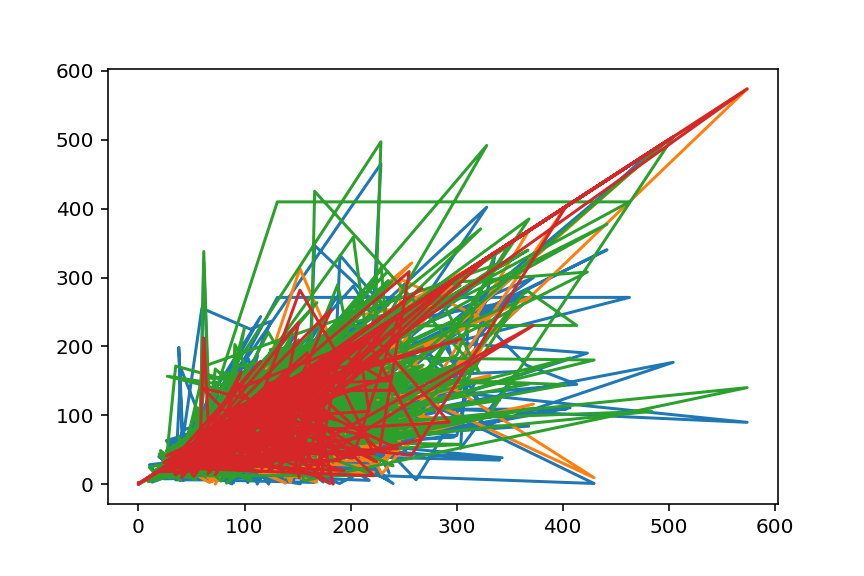

In [40]:
%matplotlib notebook
ax1 = plt.plot(Arctic_discharge_fluxes_with_area_export['best_thickness_mean'],Arctic_discharge_fluxes_with_area_export[['thickness_for_area_lost_early', 'thickness_for_area_gained_early','thickness_for_area_lost_late', 'thickness_for_area_gained_late',]])


<IPython.core.display.Javascript object>


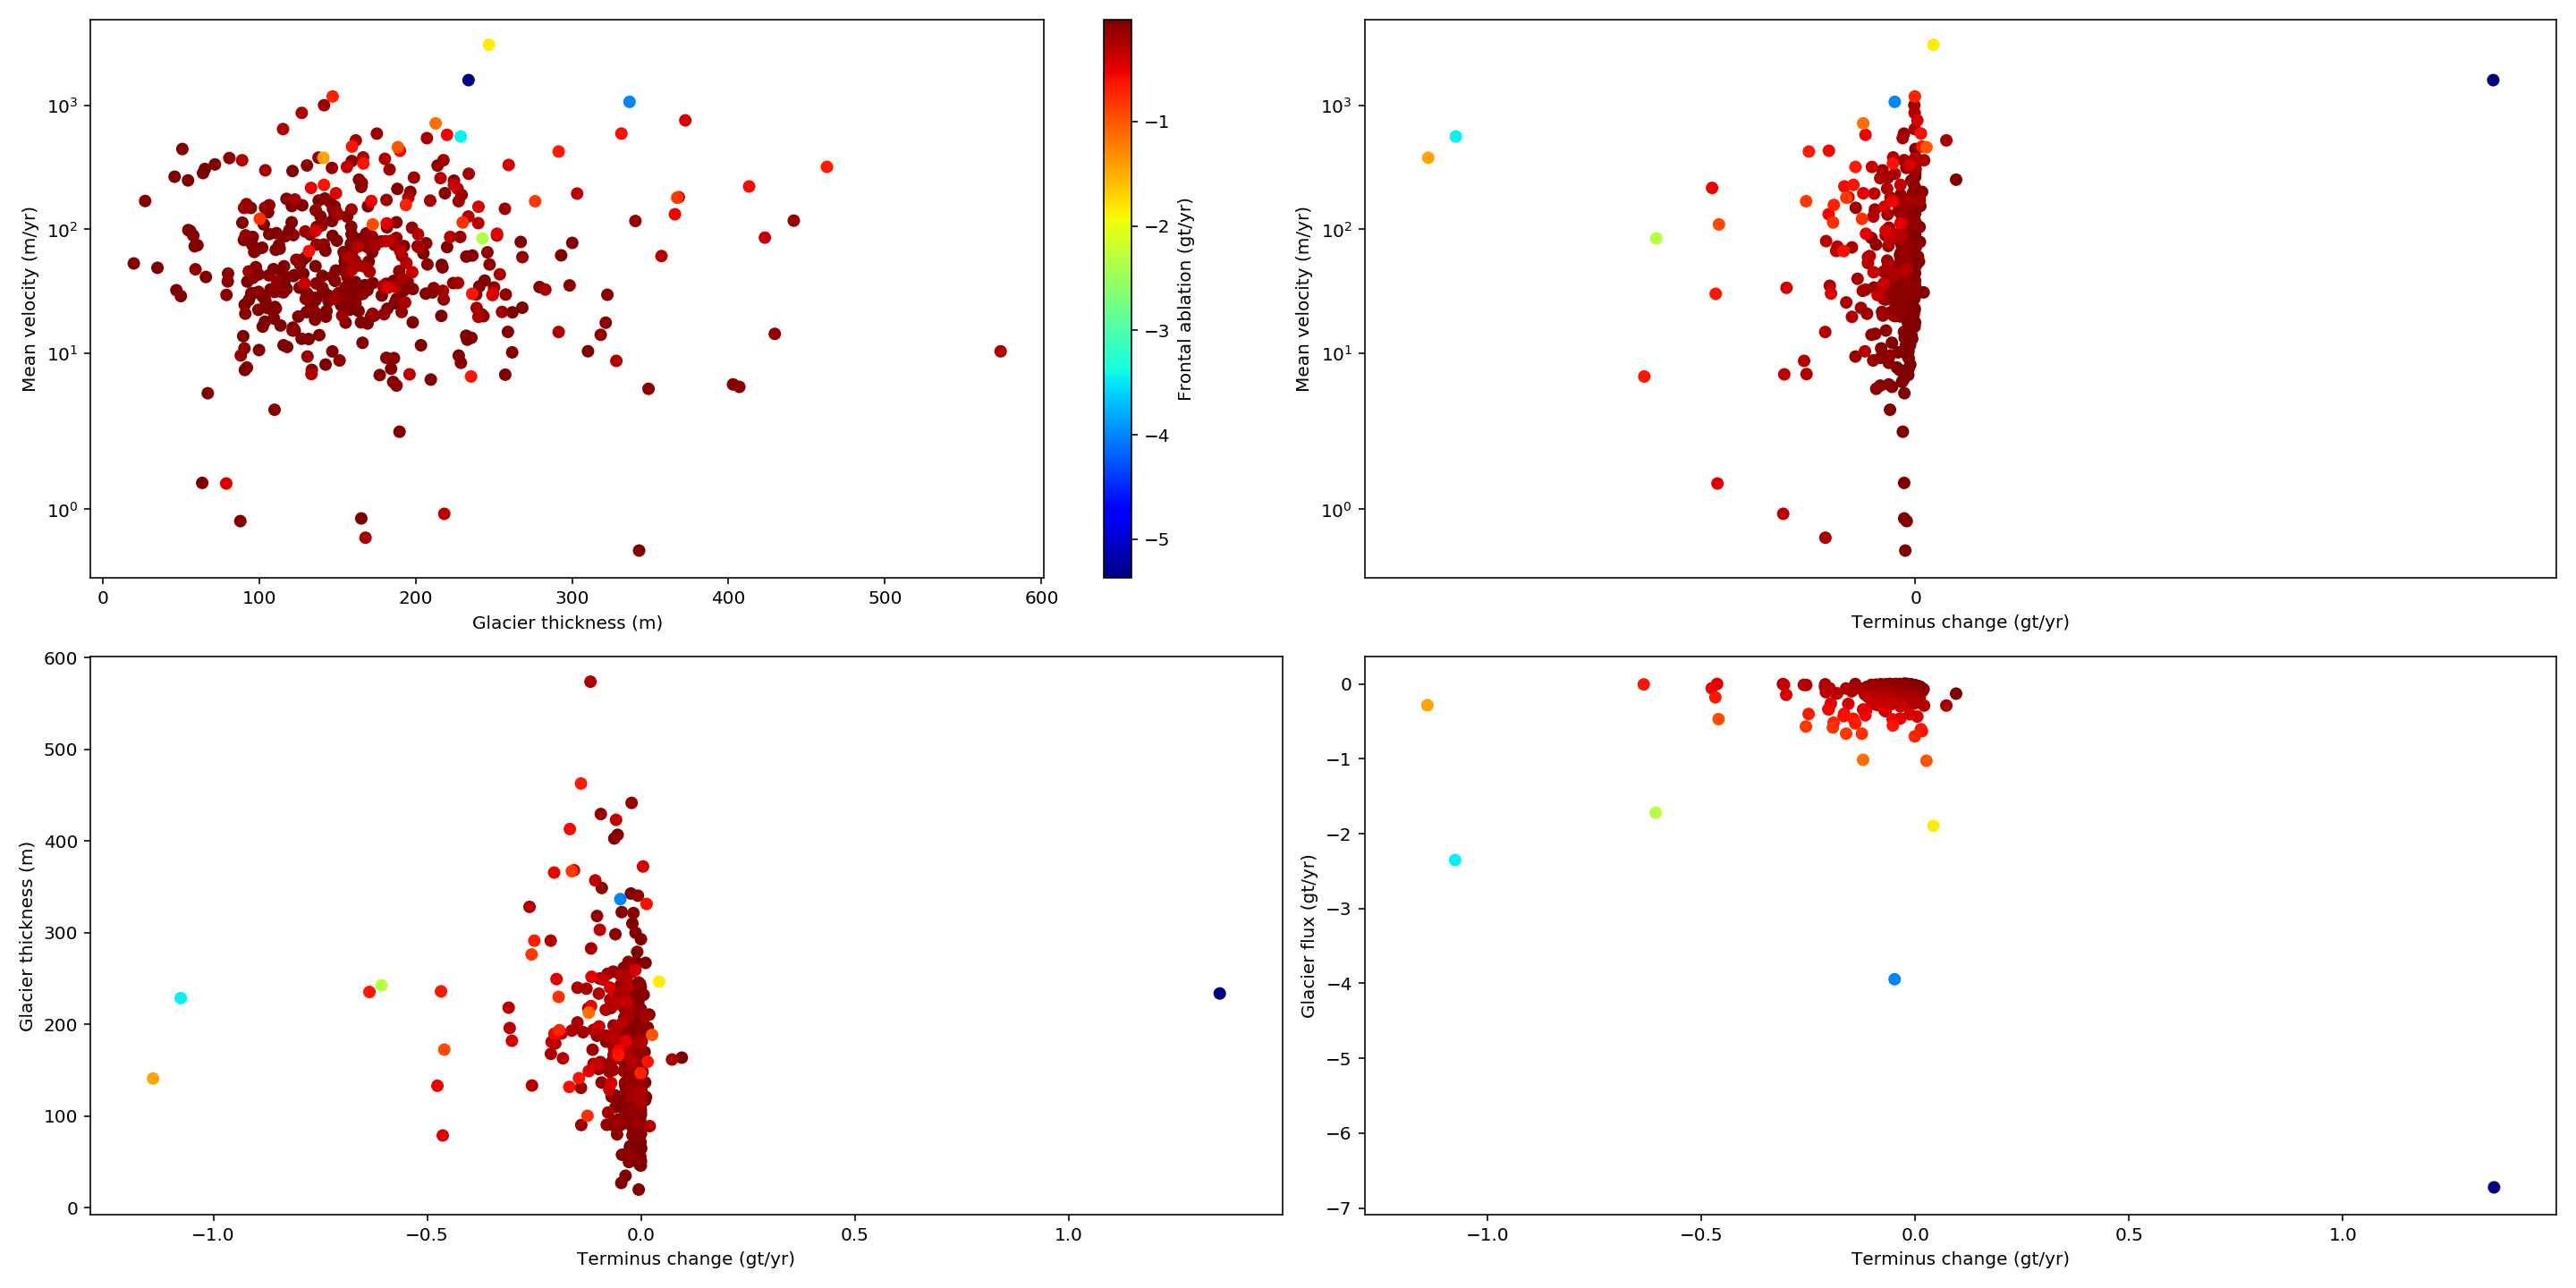

In [159]:
%matplotlib notebook
glacier_contrib_threshold = -0.02
Arctic_data_plotting = Arctic_discharge_fluxes_with_area_export
Arctic_data_plotting = Arctic_data_plotting[Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, tight_layout=True)

Arctic_data_plotting=Arctic_data_plotting.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)

first = ax1.scatter(Arctic_data_plotting[Arctic_data_plotting['best_thickness_mean']>10**0]['best_thickness_mean'],Arctic_data_plotting[Arctic_data_plotting['best_thickness_mean']>10**0]['2010_2018_mean'],c=Arctic_data_plotting[Arctic_data_plotting['best_thickness_mean']>10**0]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))#,norm=matplotlib.colors.LogNorm())
ax1.set_yscale('symlog')
ax2.set_xscale('symlog')
ax1.set_xlabel('Glacier thickness (m)')
ax1.set_ylabel('Mean velocity (m/yr)')
fig.colorbar(first, ax=ax1,label='Frontal ablation (gt/yr)')

ax2.scatter(Arctic_data_plotting['terminus_gt_change_per_year_late'],Arctic_data_plotting['2010_2018_mean'],c=Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))
ax2.set_yscale('symlog')
ax2.set_xlabel('Terminus change (gt/yr)')
ax2.set_ylabel('Mean velocity (m/yr)')

ax3.scatter(Arctic_data_plotting['terminus_gt_change_per_year_late'],Arctic_data_plotting['best_thickness_mean'],c=Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))
# ax3.set_yscale('symlog')
ax3.set_xlabel('Terminus change (gt/yr)')
ax3.set_ylabel('Glacier thickness (m)')

ax4.scatter(Arctic_data_plotting['terminus_gt_change_per_year_late'],-Arctic_data_plotting['2010_2018_mean_flux_gt'],c=Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))
# ax4.set_yscale('symlog')
ax4.set_xlabel('Terminus change (gt/yr)')
ax4.set_ylabel('Glacier flux (gt/yr)')

fig.set_figheight(10)
fig.set_figwidth(20)

plt.savefig('figures/data_comparison')

<IPython.core.display.Javascript object>


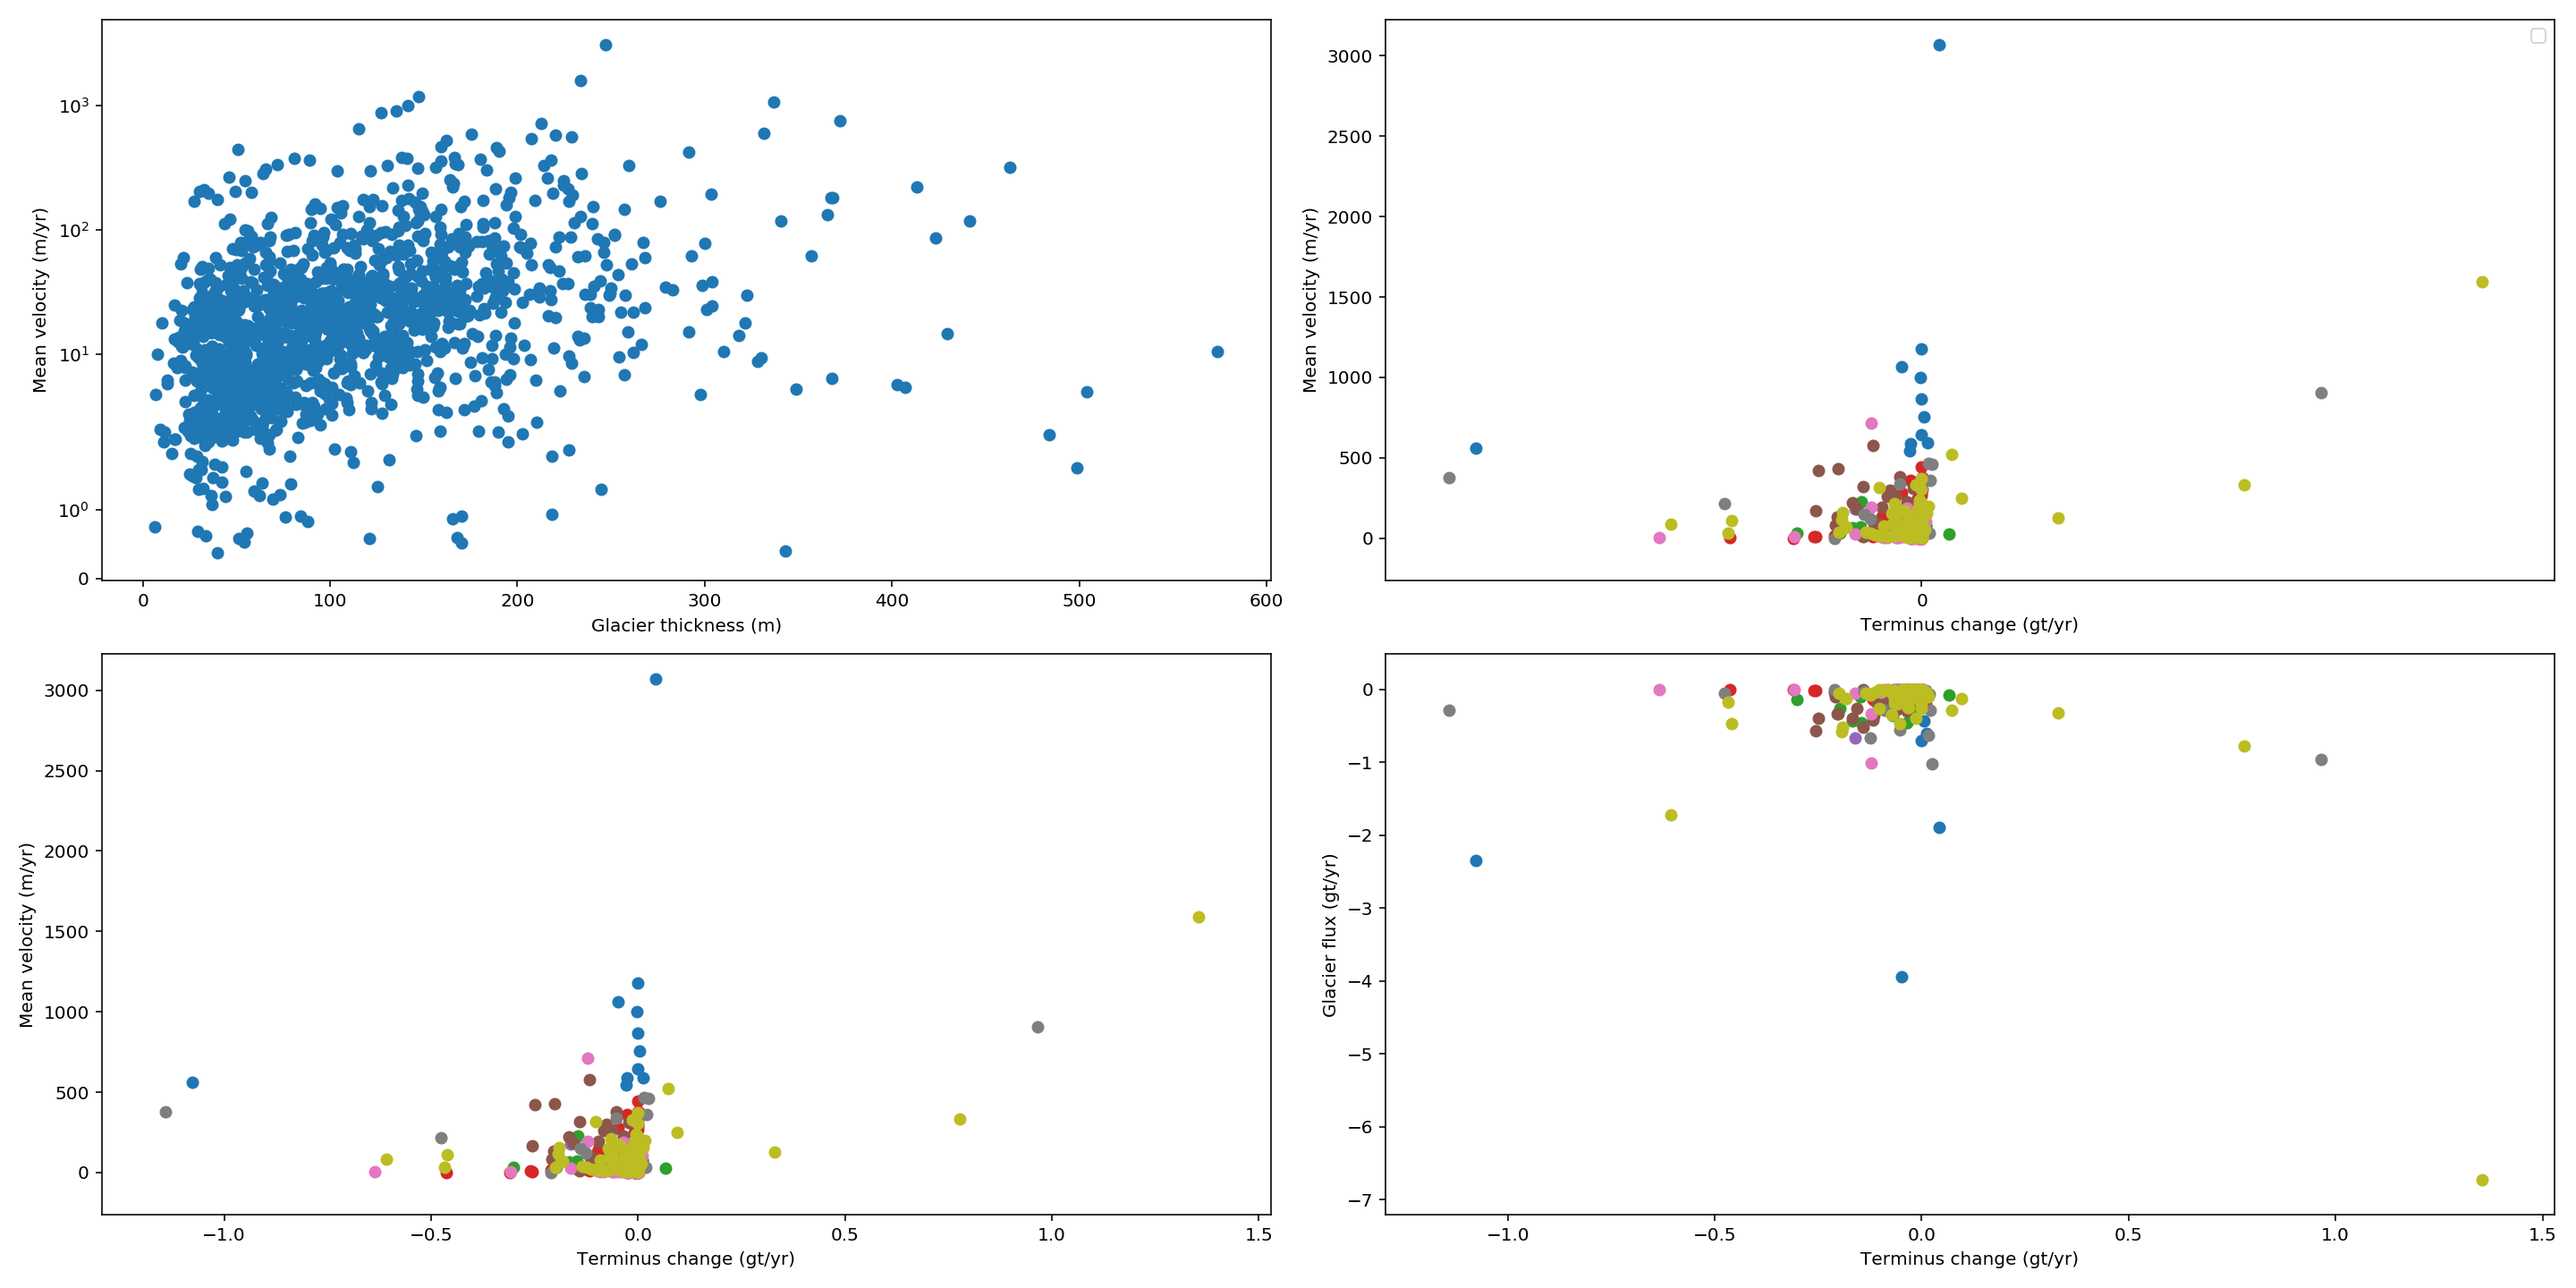

No handles with labels found to put in legend.


In [160]:
%matplotlib notebook
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, tight_layout=True)

Arctic_discharge_fluxes_with_area_export=Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)

colors={'Svalbard':'blue', 'SZ':'red', 'Greenland':'green', 'QEI':'cyan', 'Iceland and Jan Mayen':'black','BBI':'cyan', 'FJL':'red', 'Alaska':'magenta', 'NZ':'red'}

first = ax1.scatter(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['best_thickness_mean']>10**0]['best_thickness_mean'],Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['best_thickness_mean']>10**0]['2010_2018_mean'])#,c=Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['best_thickness_mean']>10**0]['Region_name'].map(colors))#,norm=matplotlib.colors.LogNorm())
ax1.set_yscale('symlog')
ax2.set_xscale('symlog')
ax1.set_xlabel('Glacier thickness (m)')
ax1.set_ylabel('Mean velocity (m/yr)')


groups = Arctic_discharge_fluxes_with_area_export.groupby("Region_name")
for name, group in groups:
    ax2.scatter(group['terminus_gt_change_per_year_late'],group['2010_2018_mean'])#,c=group['Region_name'].map(colors))
# ax2.set_yscale('symlog')
ax2.set_xlabel('Terminus change (gt/yr)')
ax2.set_ylabel('Mean velocity (m/yr)')
ax2.legend()

for name, group in groups:
    ax3.scatter(group['terminus_gt_change_per_year_late'],group['2010_2018_mean'])#,c=group['Region_name'].map(colors))
# ax3.set_yscale('symlog')
ax3.set_xlabel('Terminus change (gt/yr)')
ax3.set_ylabel('Mean velocity (m/yr)')

for name, group in groups:
    ax4.scatter(group['terminus_gt_change_per_year_late'],-group['2010_2018_mean_flux_gt'])#,c=group['Region_name'].map(colors))
# ax4.set_yscale('symlog')
ax4.set_xlabel('Terminus change (gt/yr)')
ax4.set_ylabel('Glacier flux (gt/yr)')

fig.set_figheight(10)
fig.set_figwidth(20)

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/p

<IPython.core.display.Javascript object>


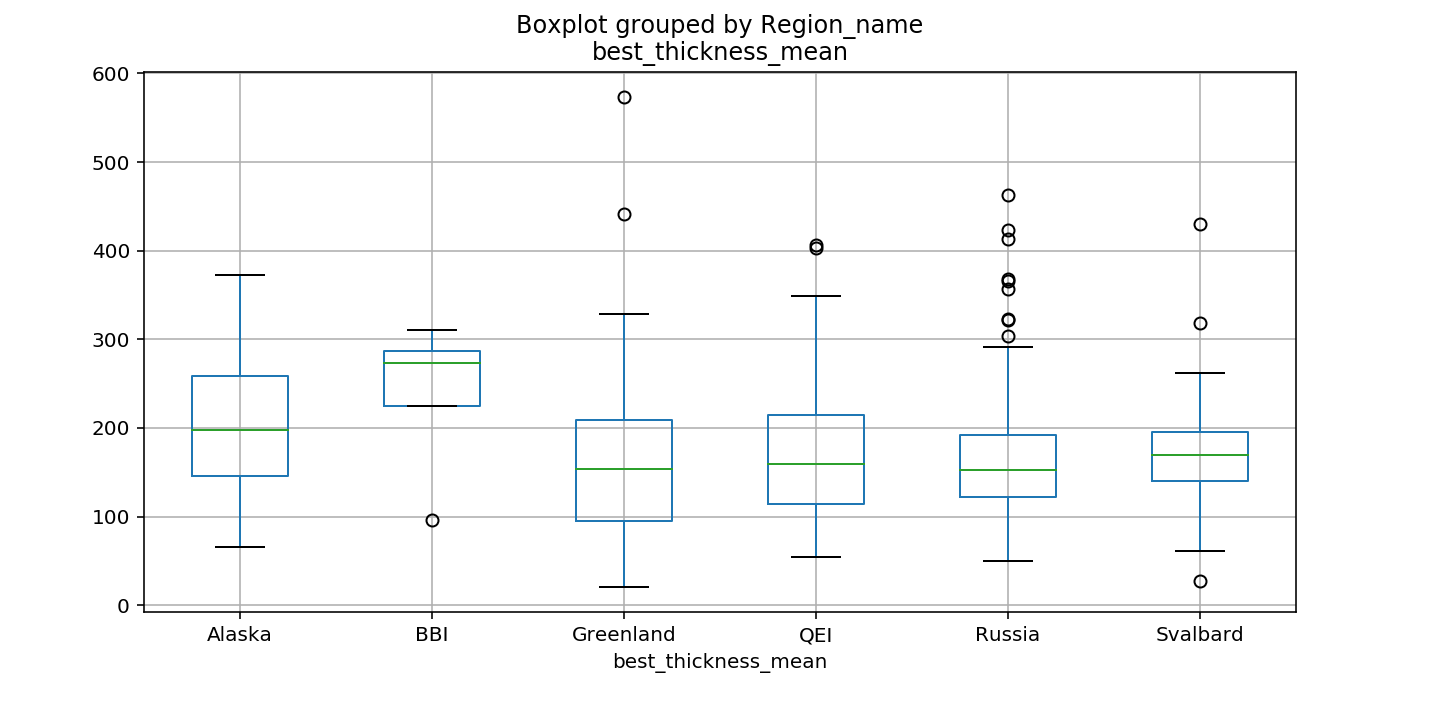

<IPython.core.display.Javascript object>


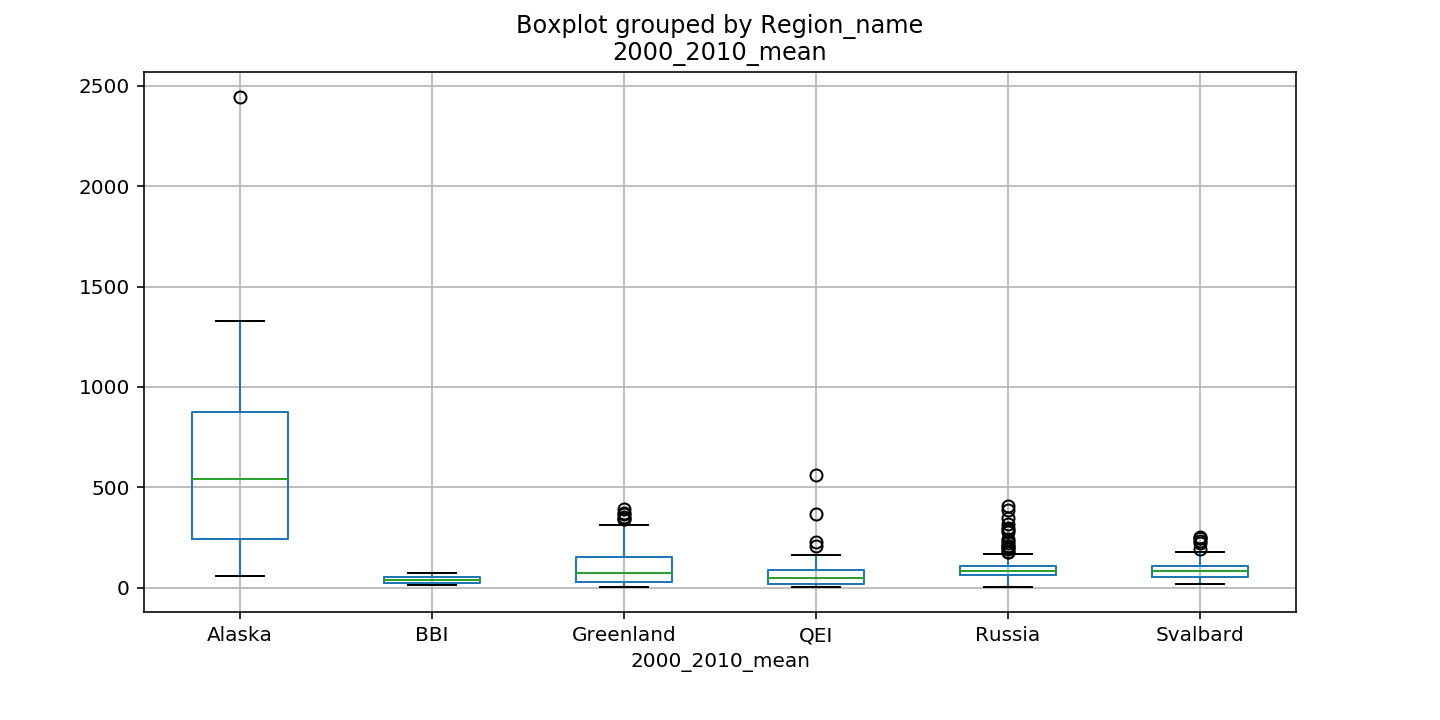

<IPython.core.display.Javascript object>


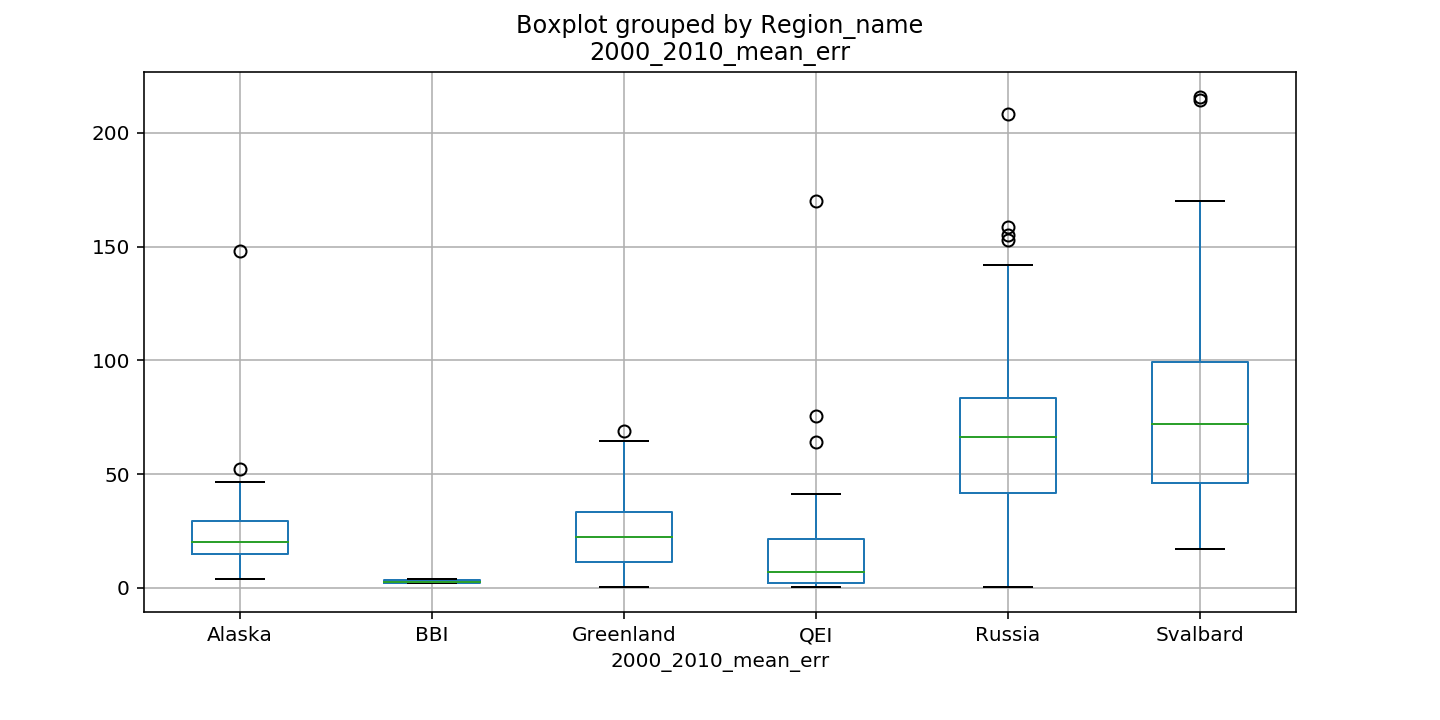

<IPython.core.display.Javascript object>


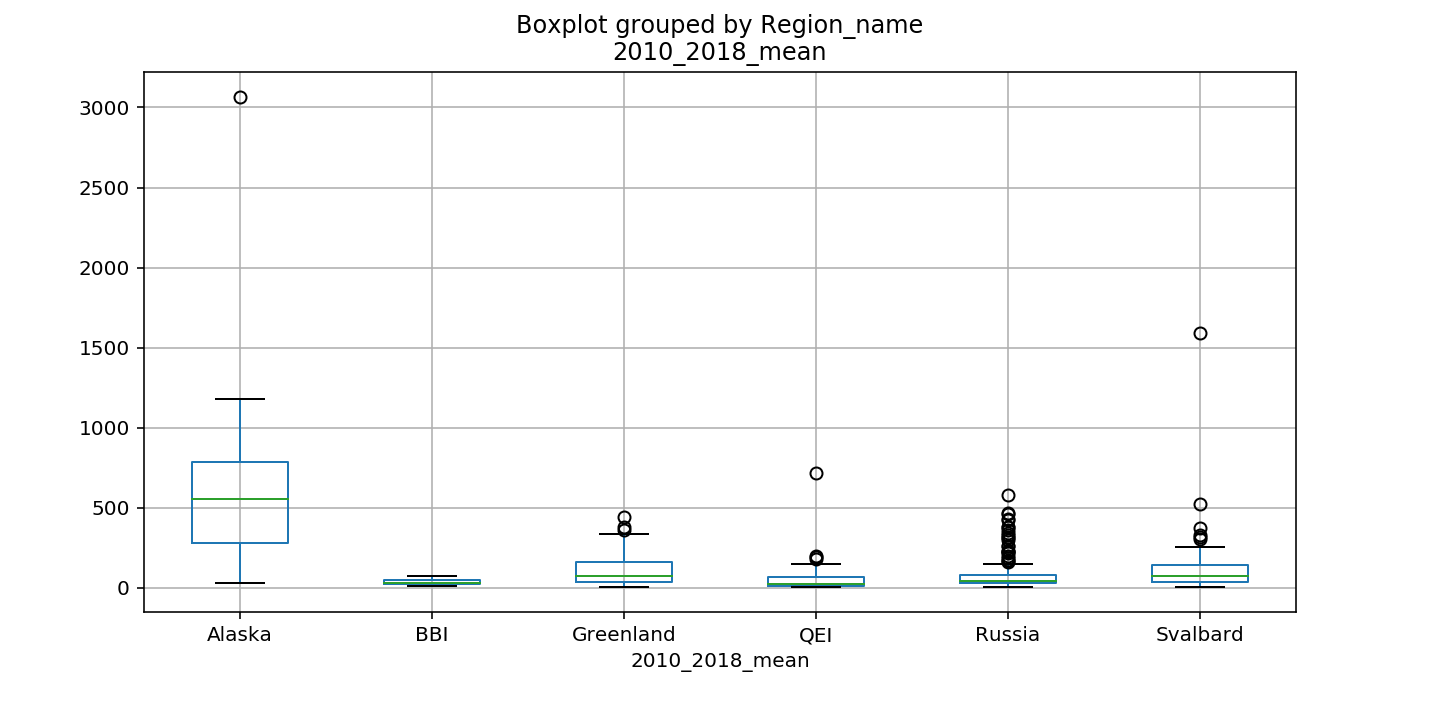

<IPython.core.display.Javascript object>


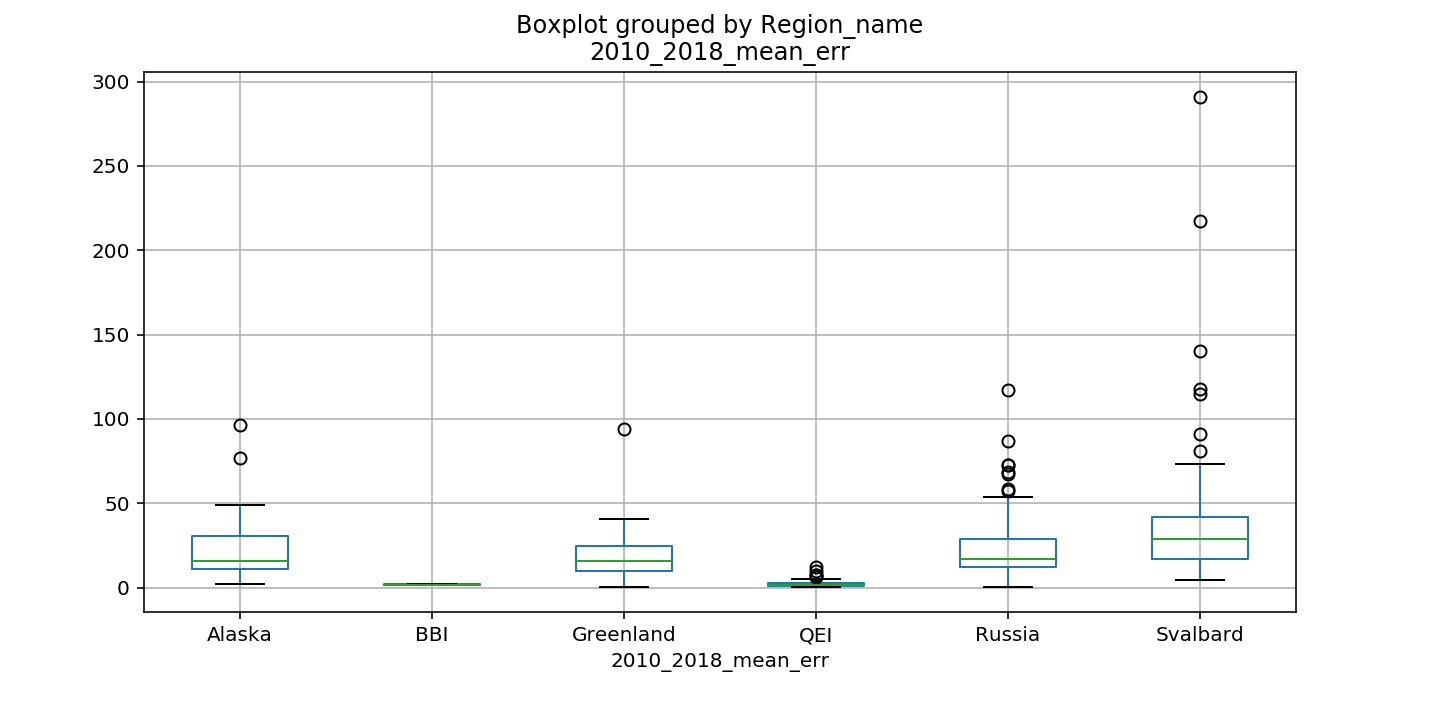

<IPython.core.display.Javascript object>


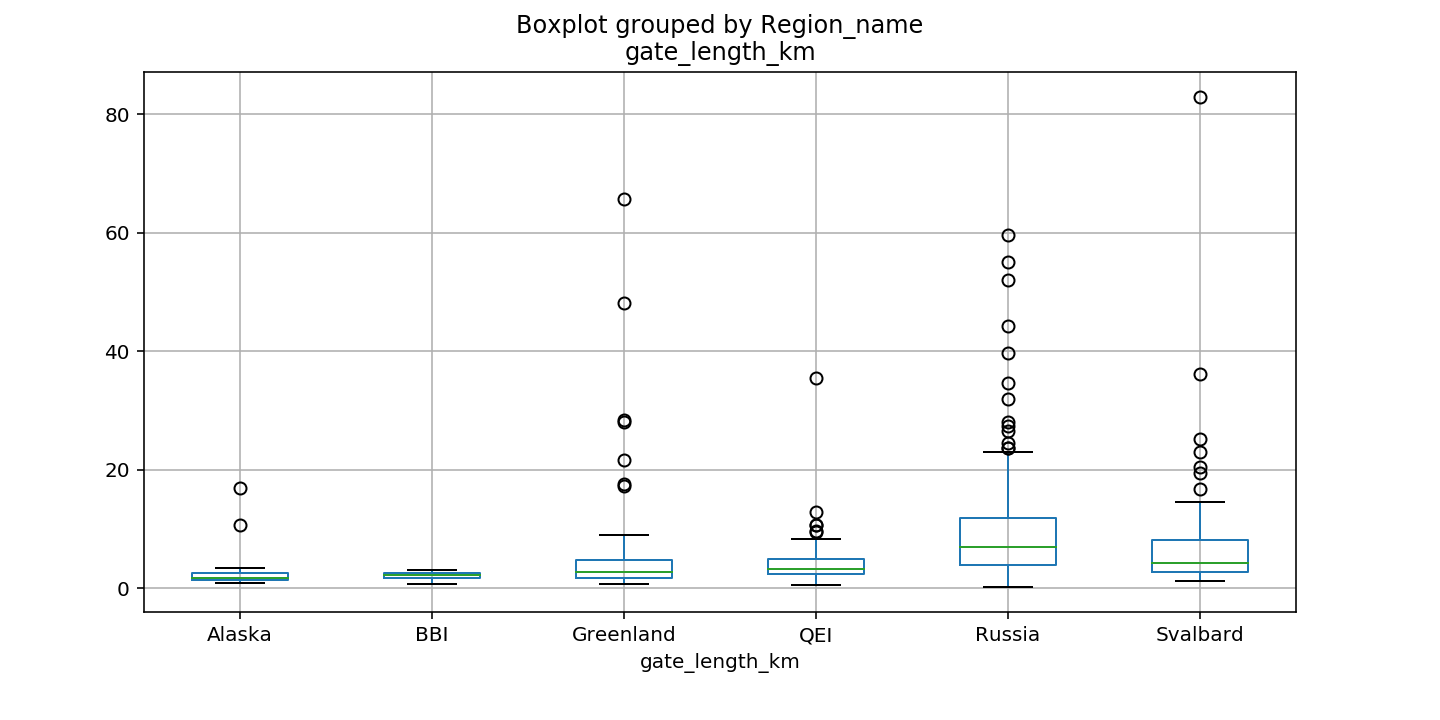

<IPython.core.display.Javascript object>


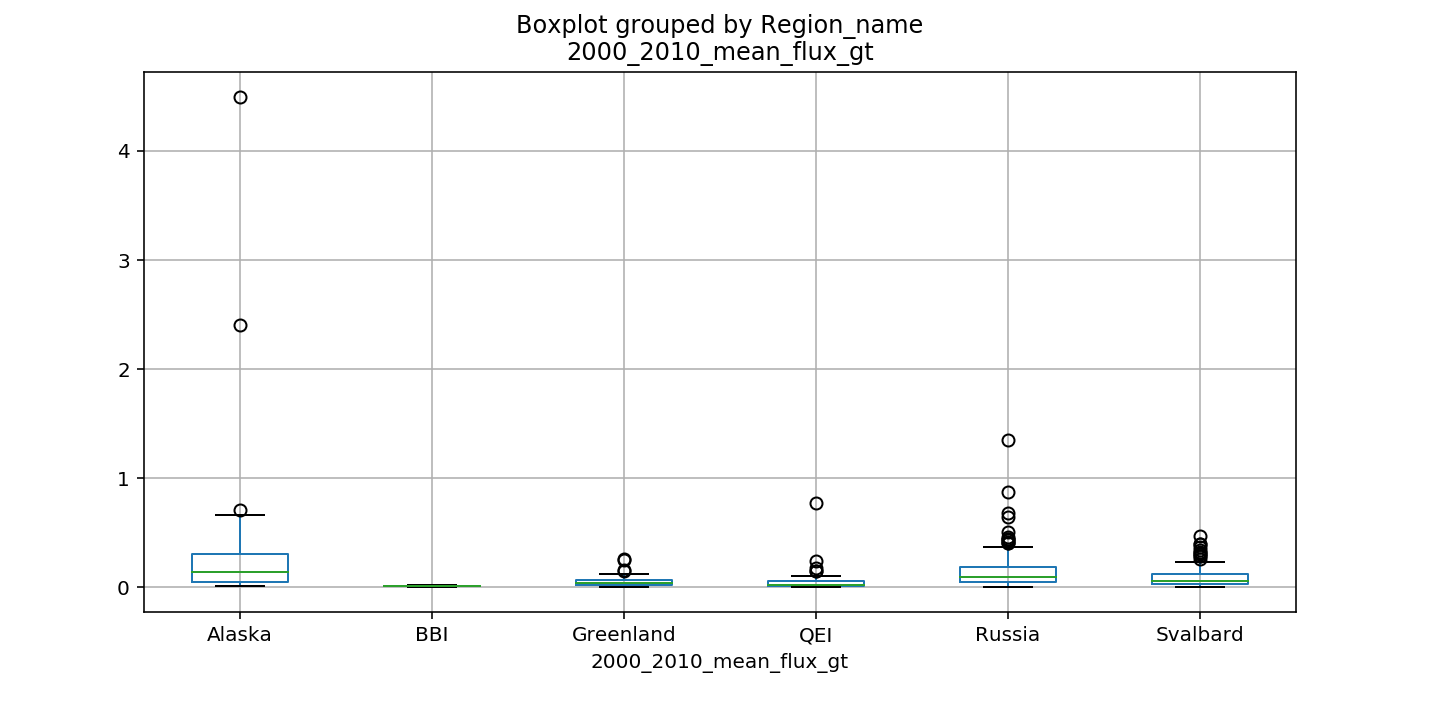

<IPython.core.display.Javascript object>


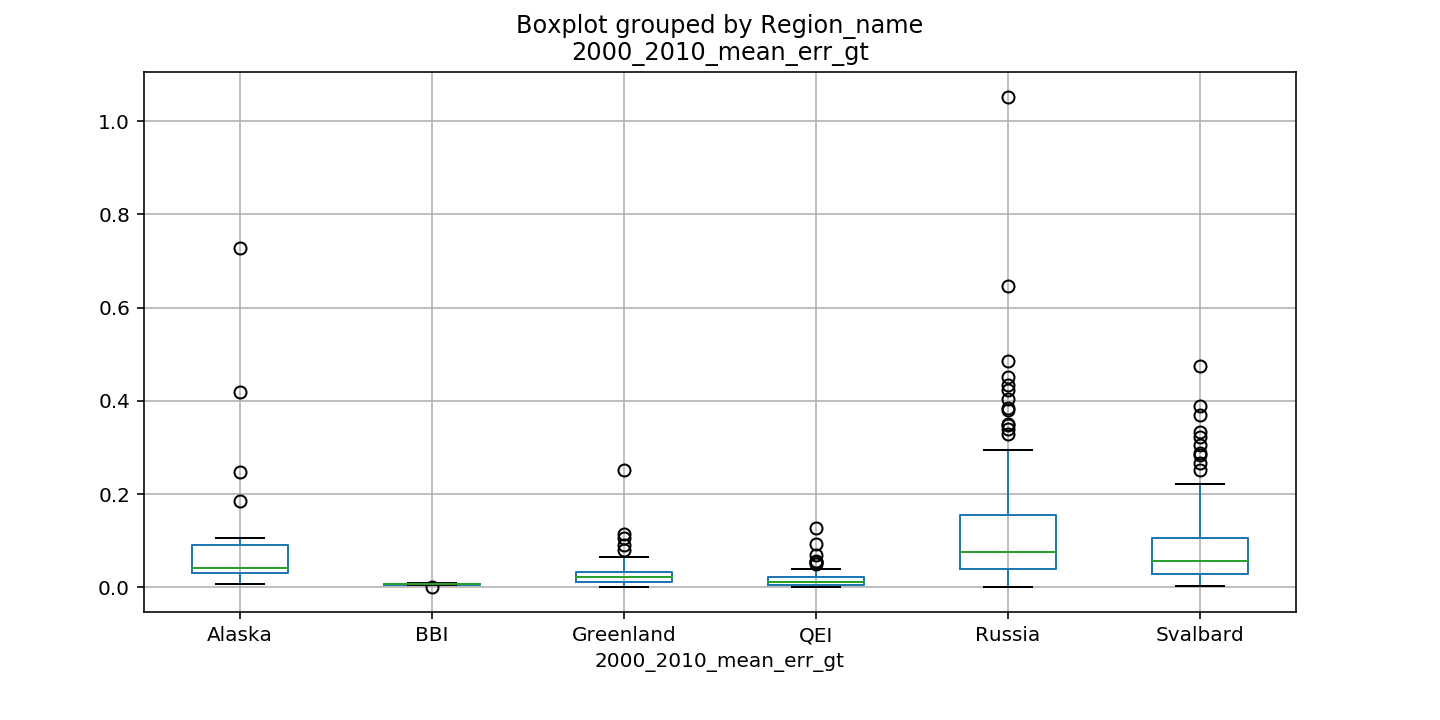

<IPython.core.display.Javascript object>


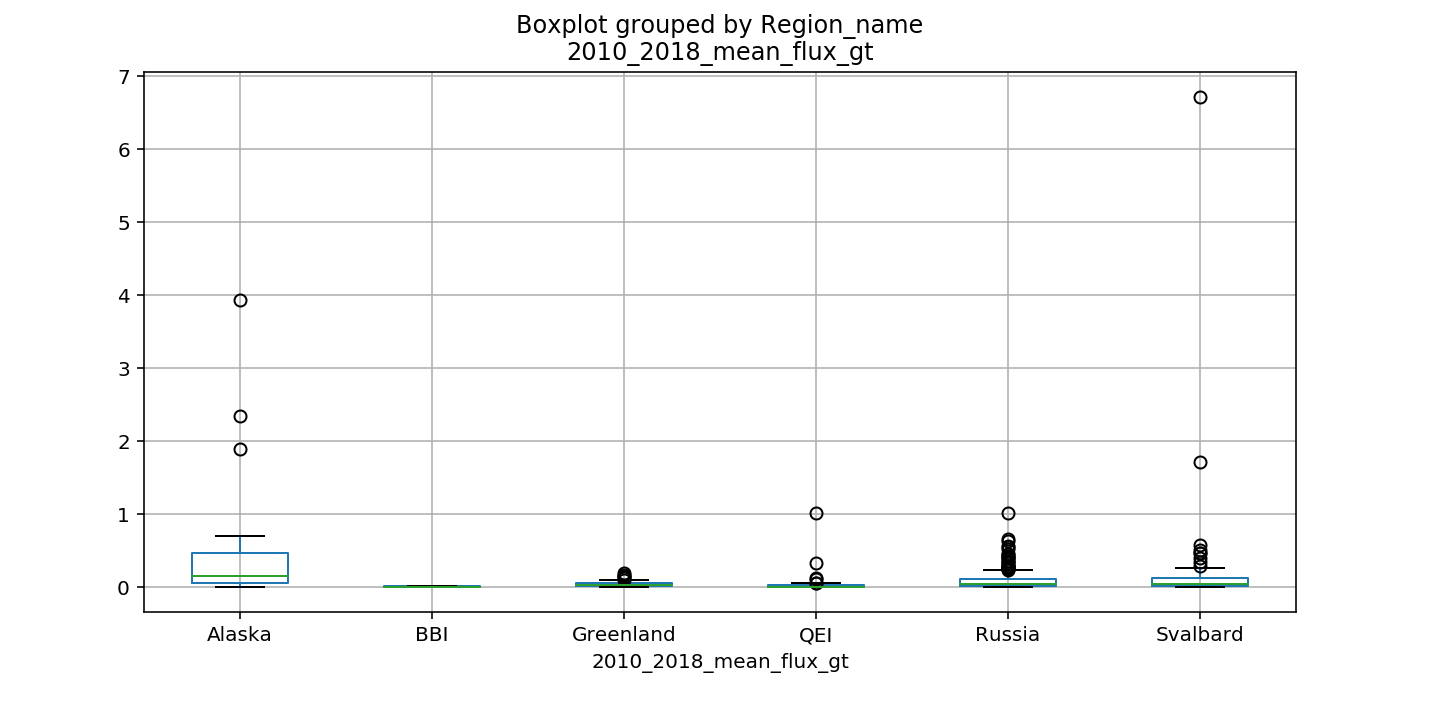

<IPython.core.display.Javascript object>


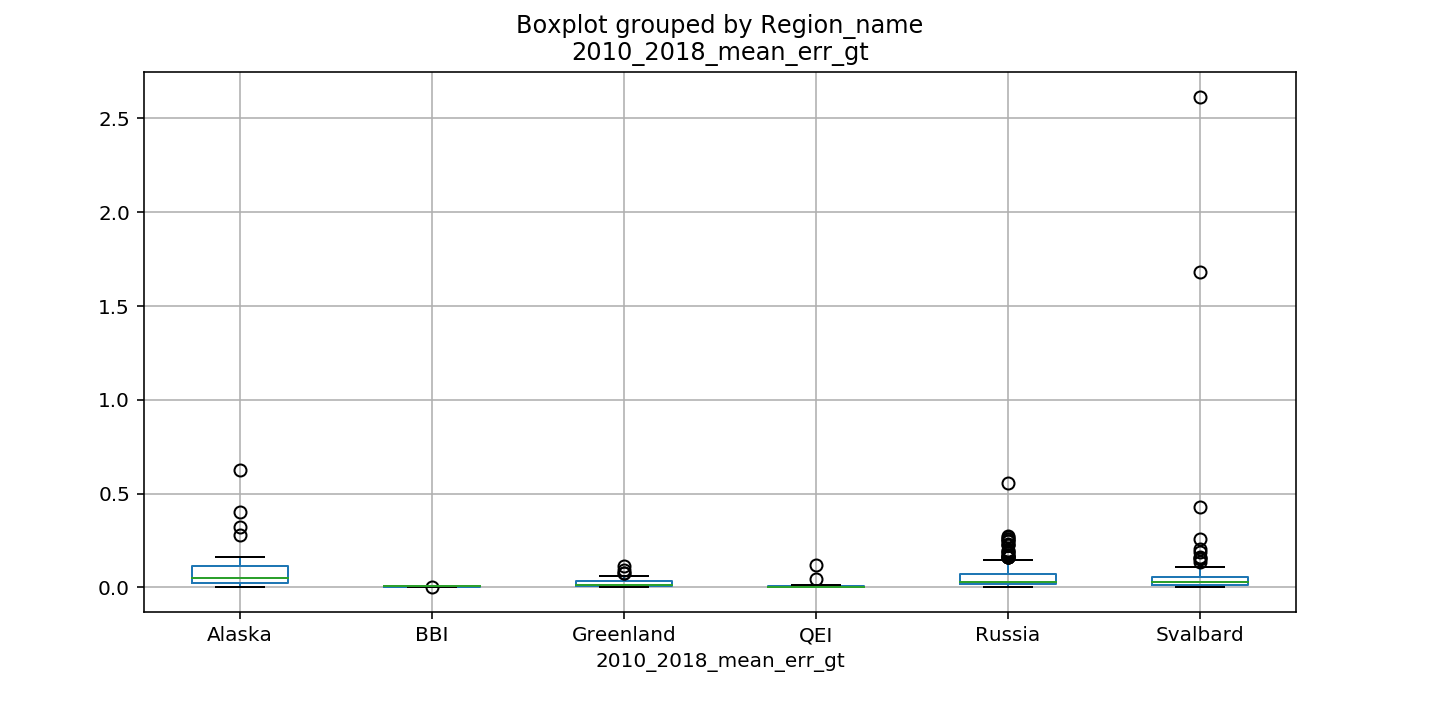

<IPython.core.display.Javascript object>


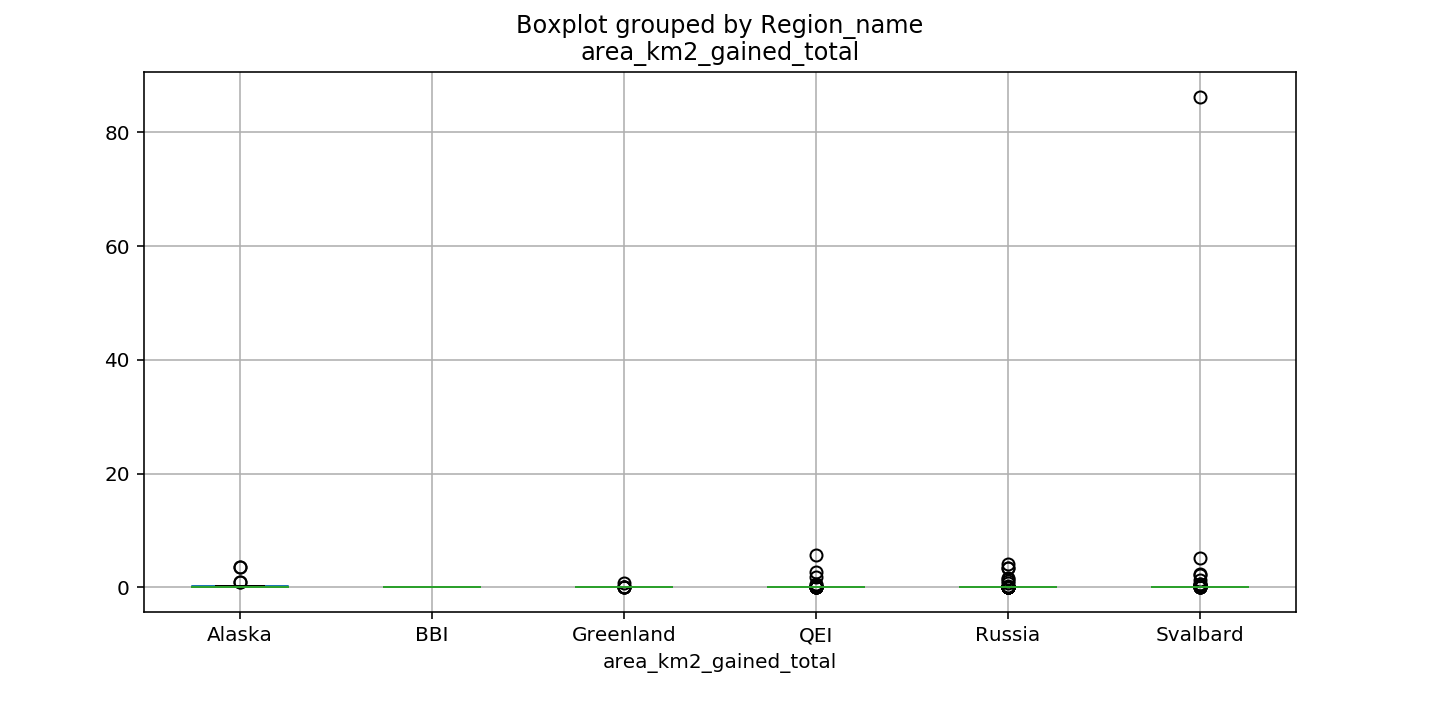

<IPython.core.display.Javascript object>


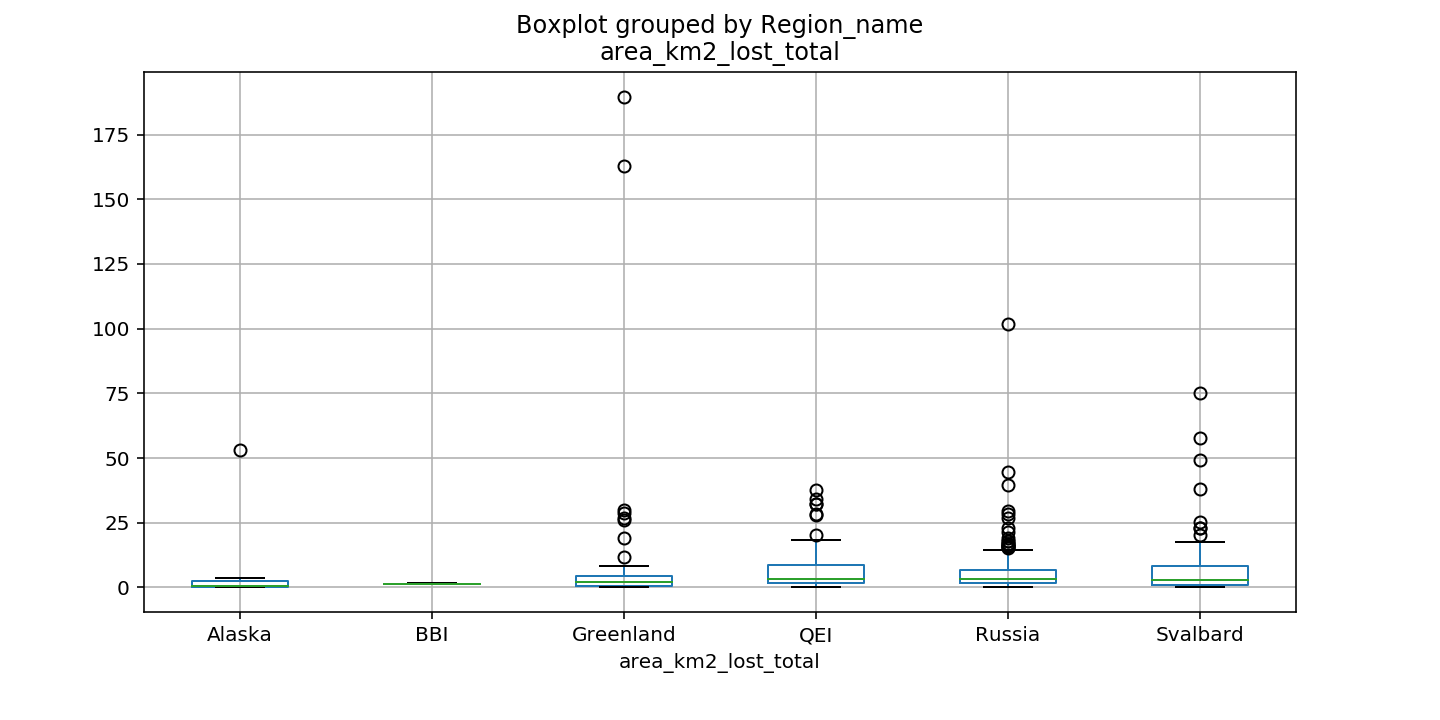

<IPython.core.display.Javascript object>


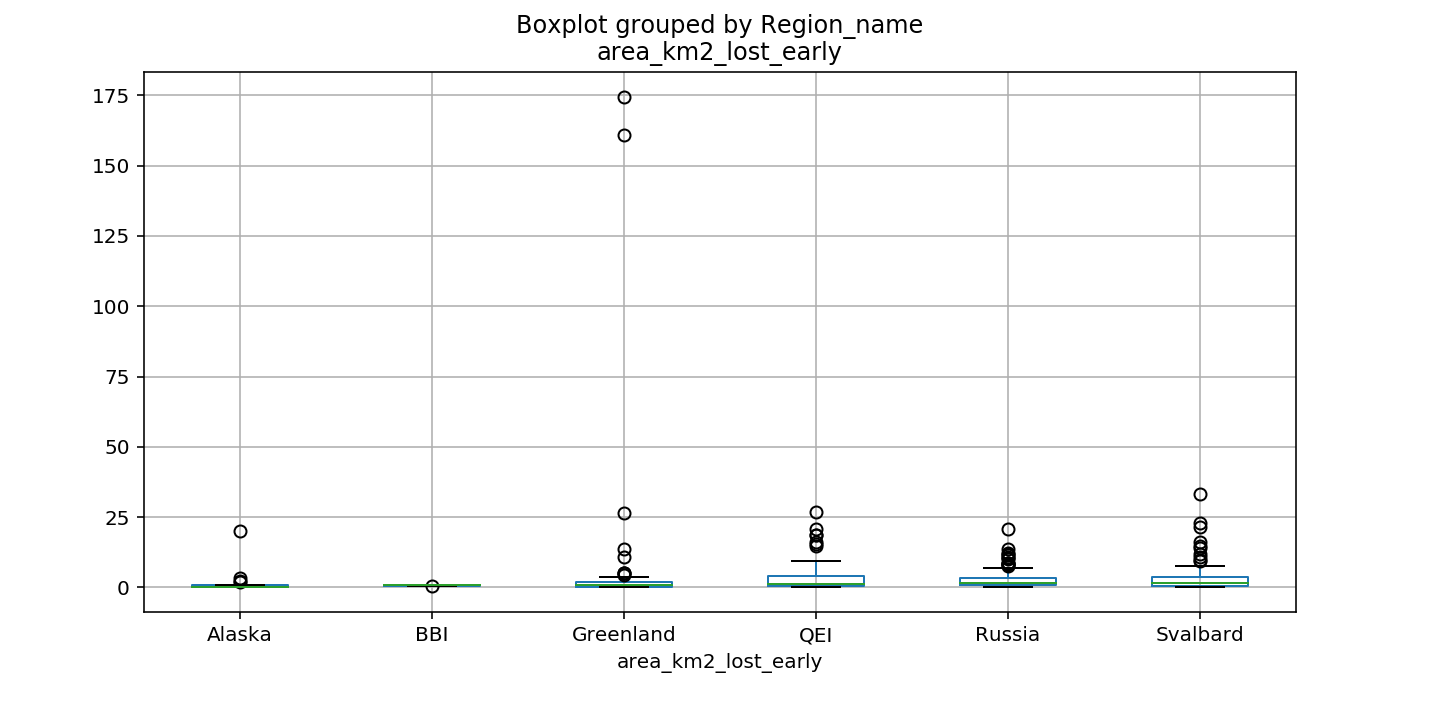

<IPython.core.display.Javascript object>


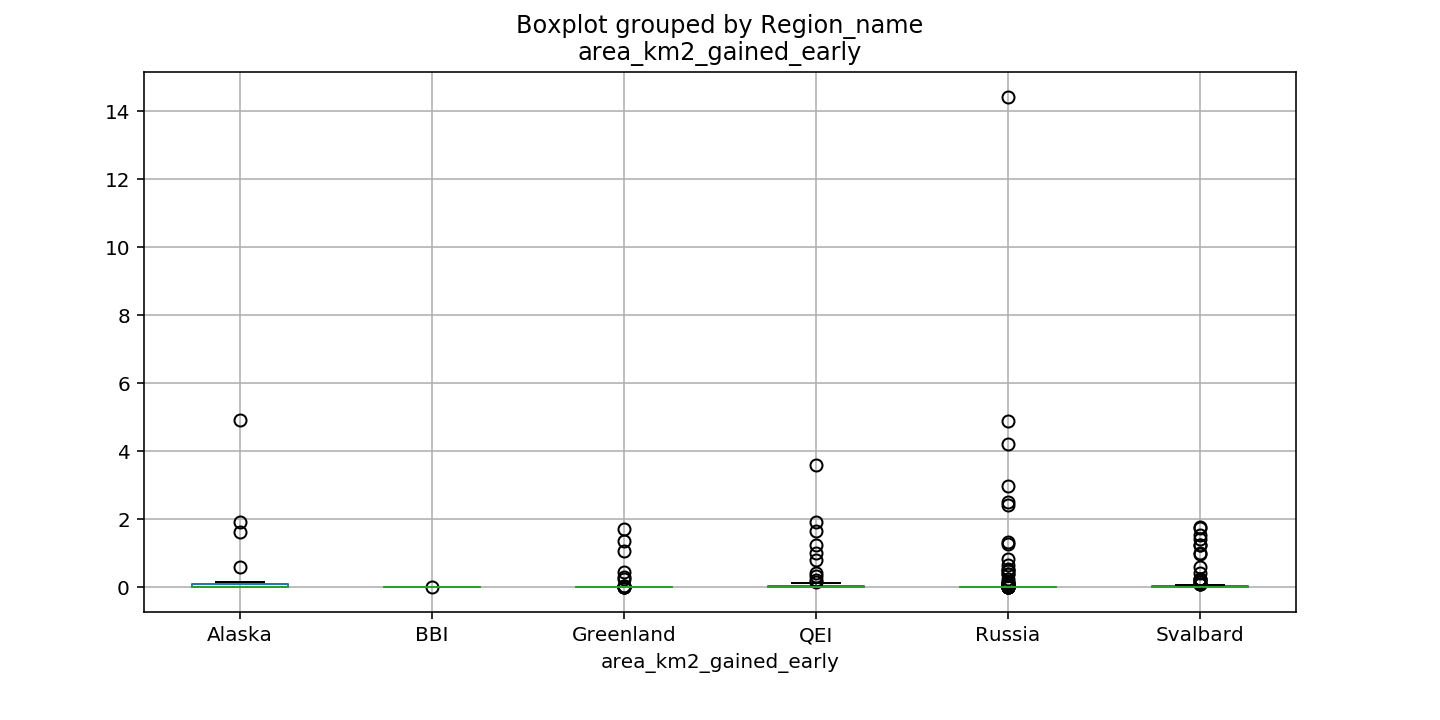

<IPython.core.display.Javascript object>


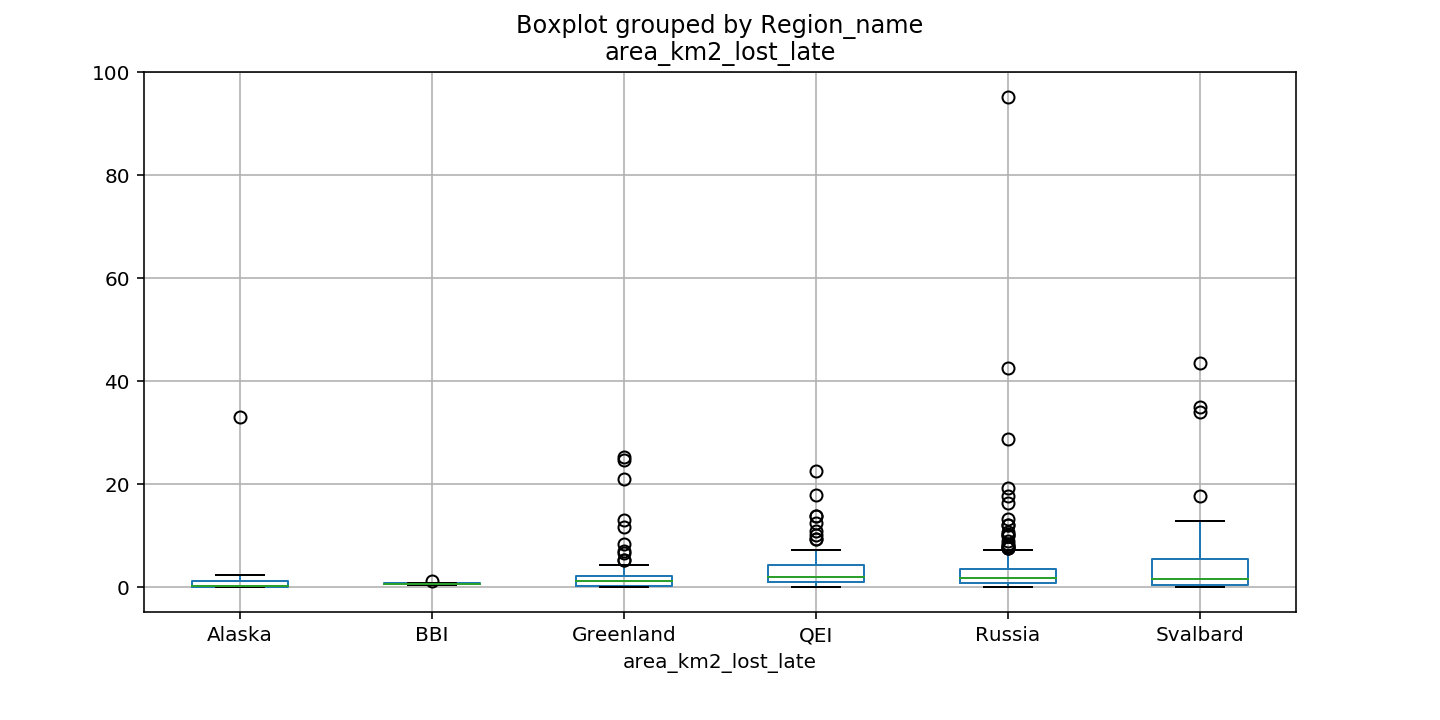

<IPython.core.display.Javascript object>


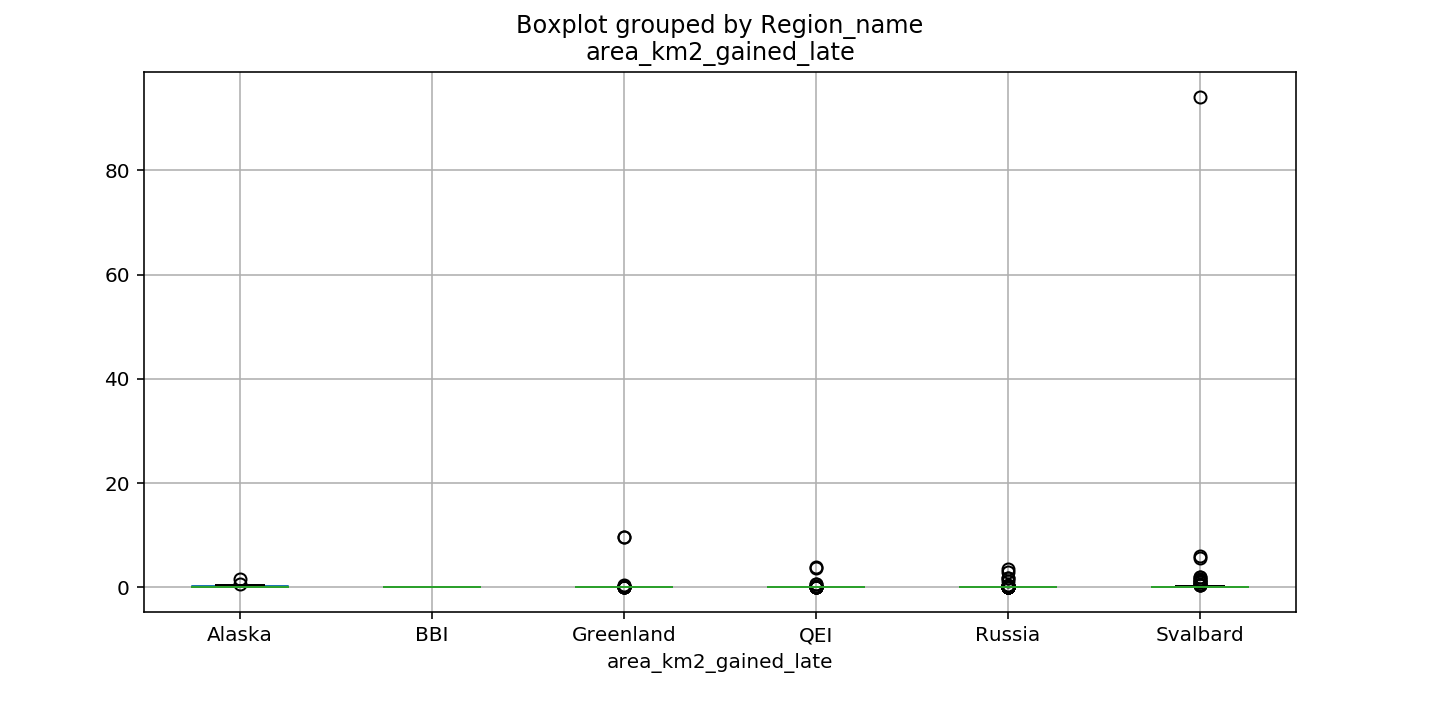

<IPython.core.display.Javascript object>


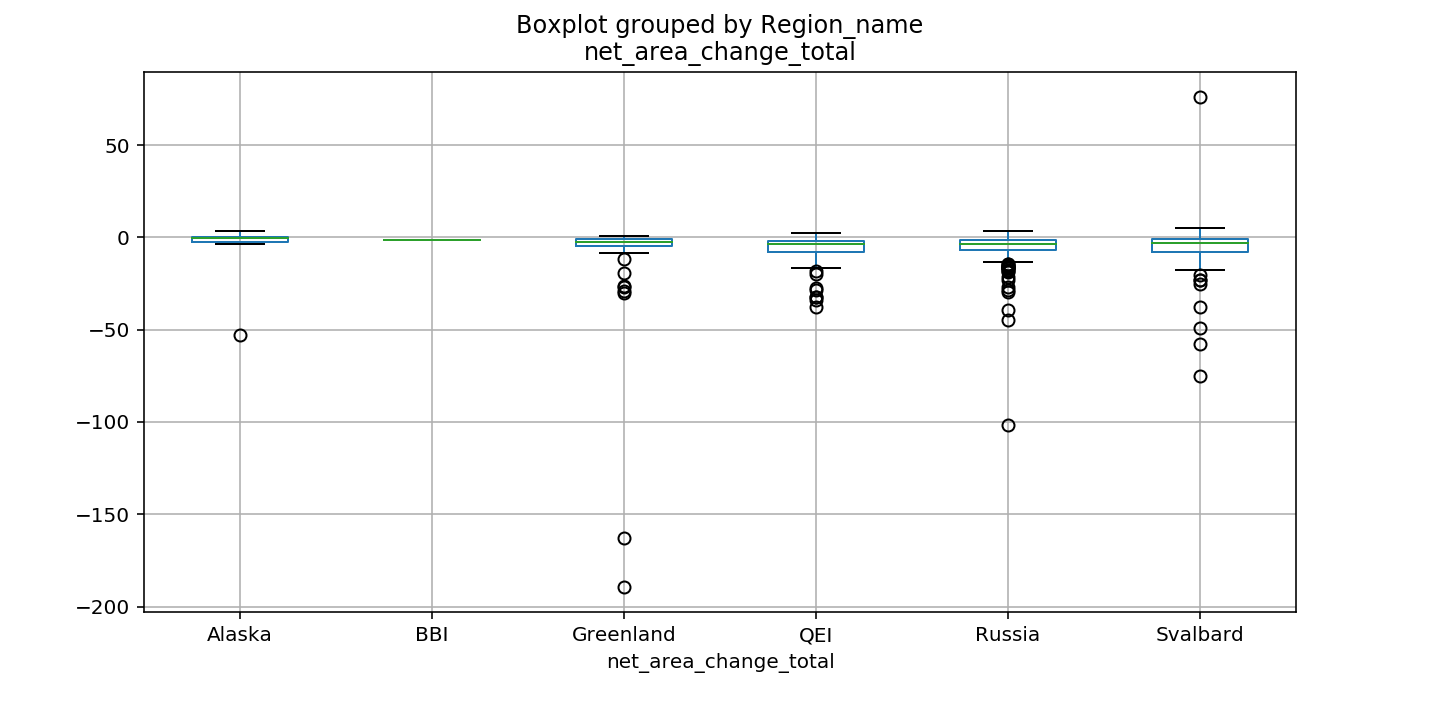

<IPython.core.display.Javascript object>


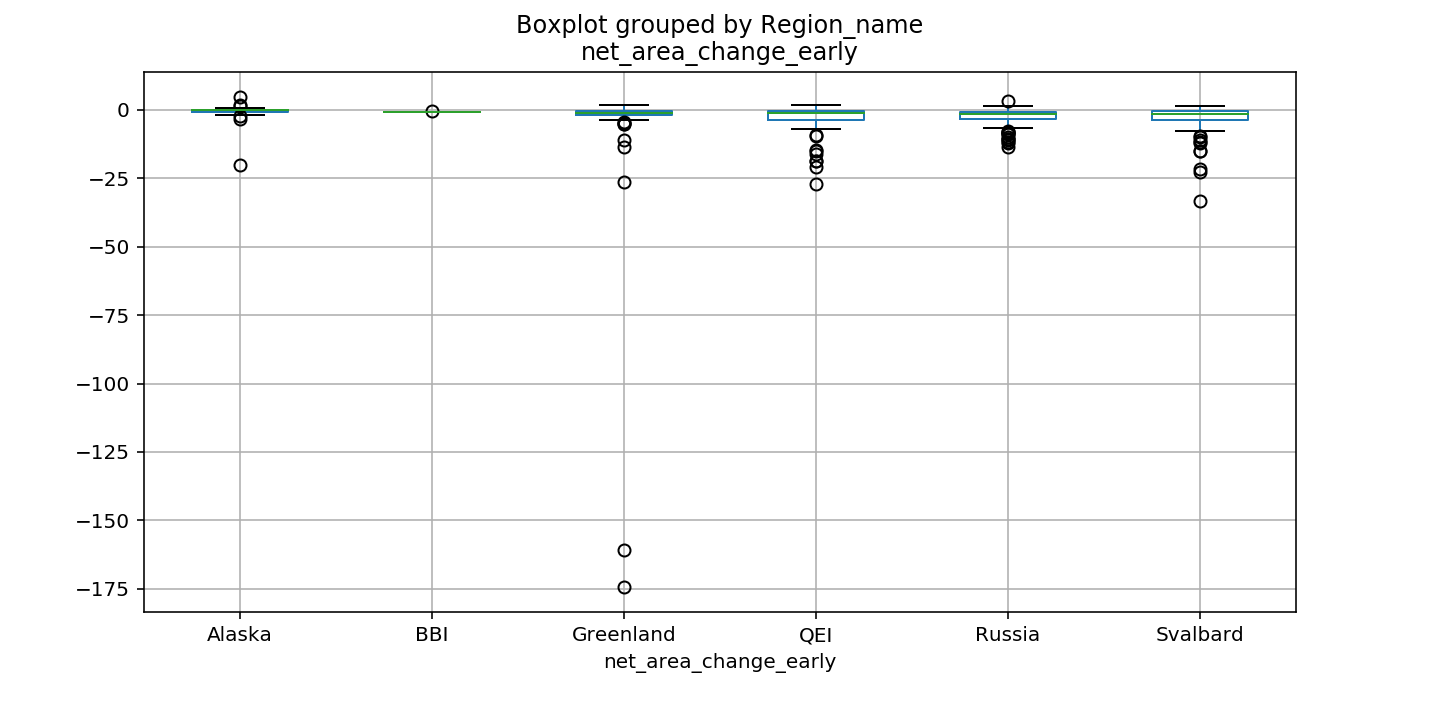

<IPython.core.display.Javascript object>


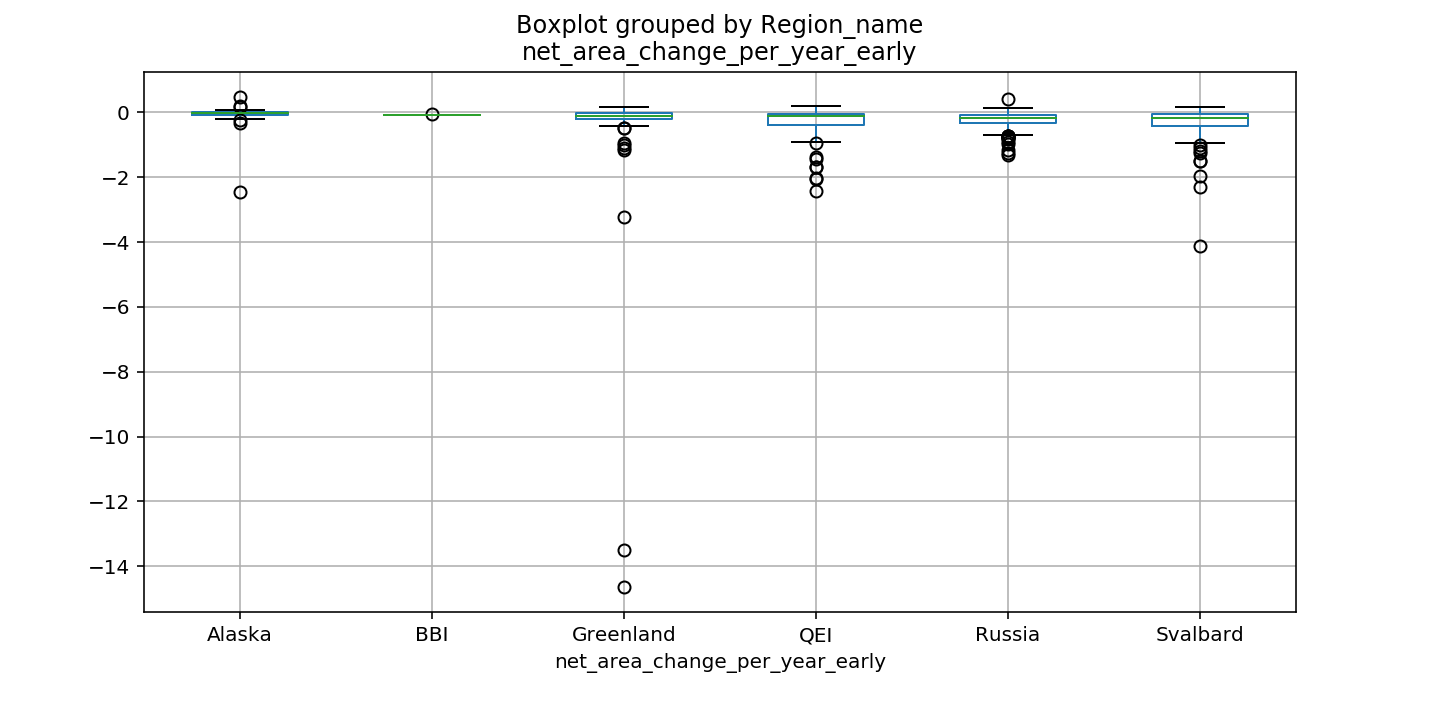

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


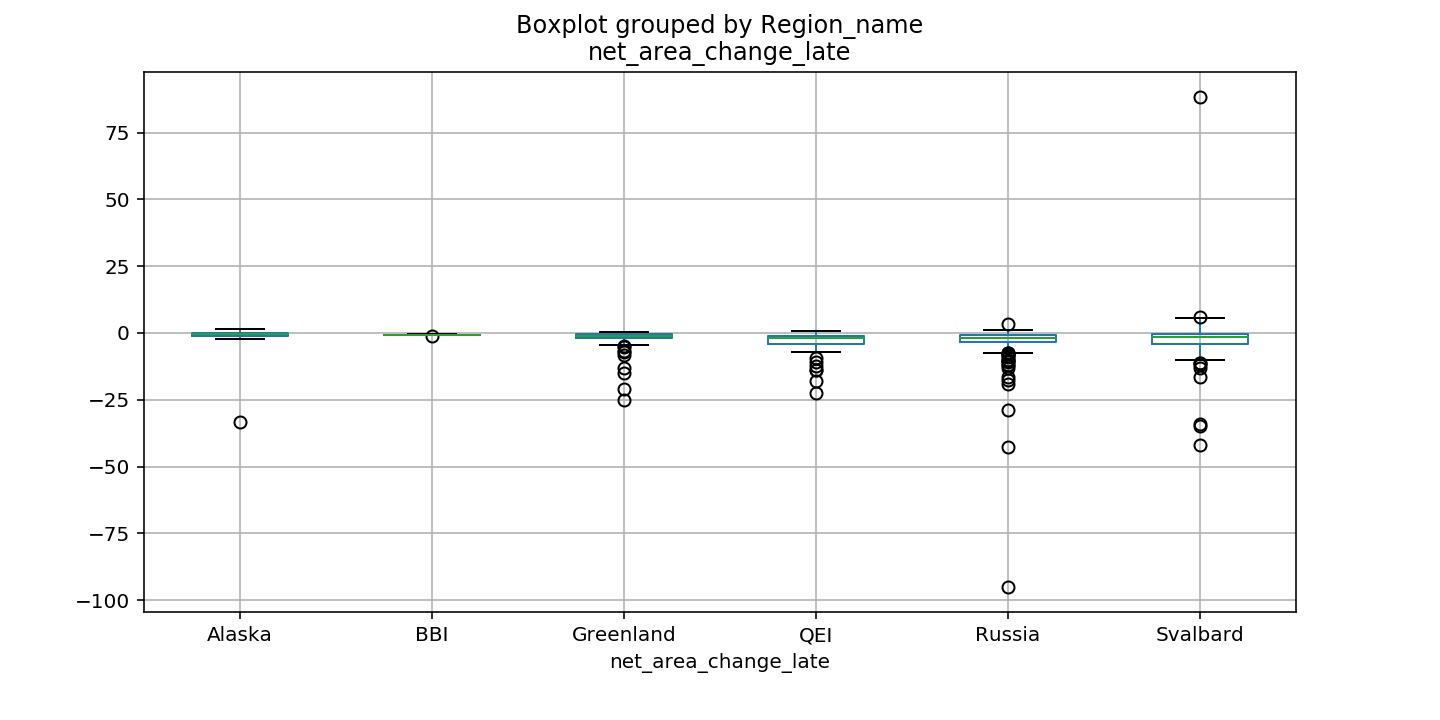

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


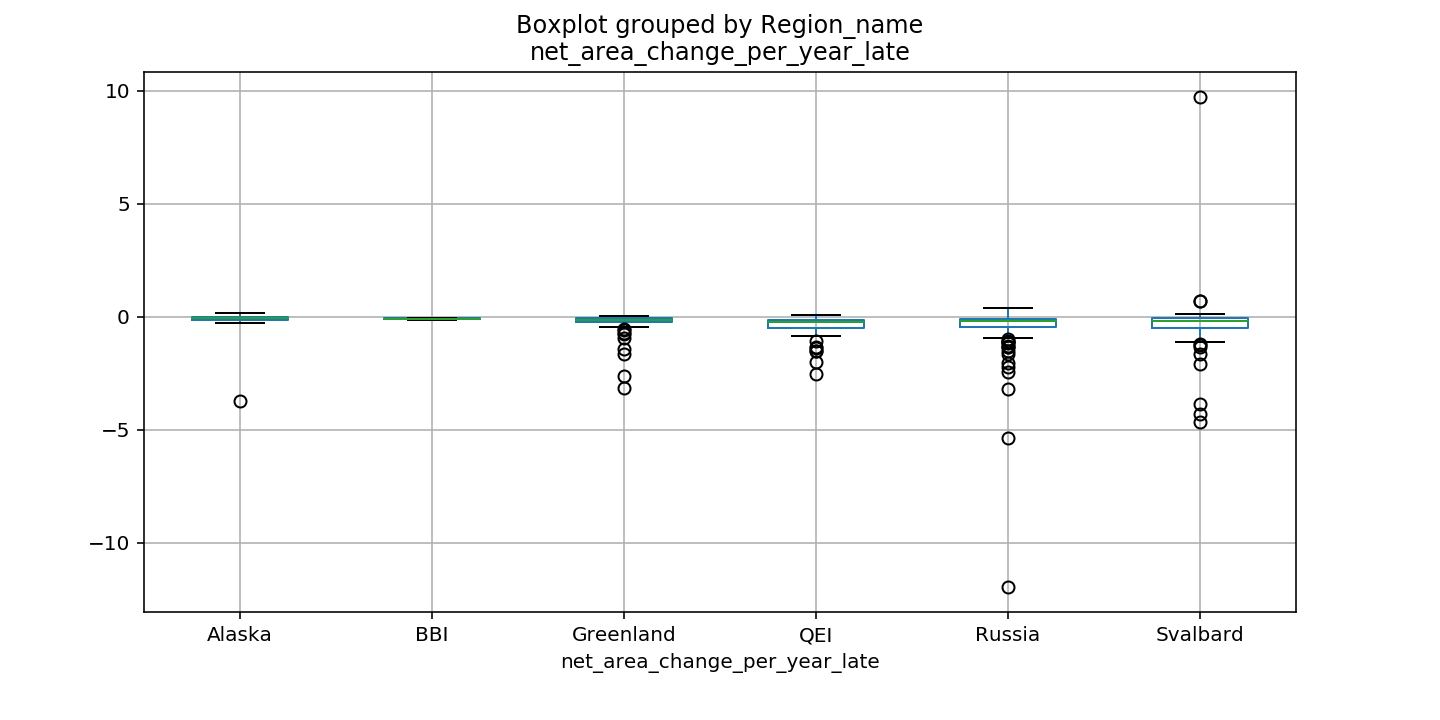

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


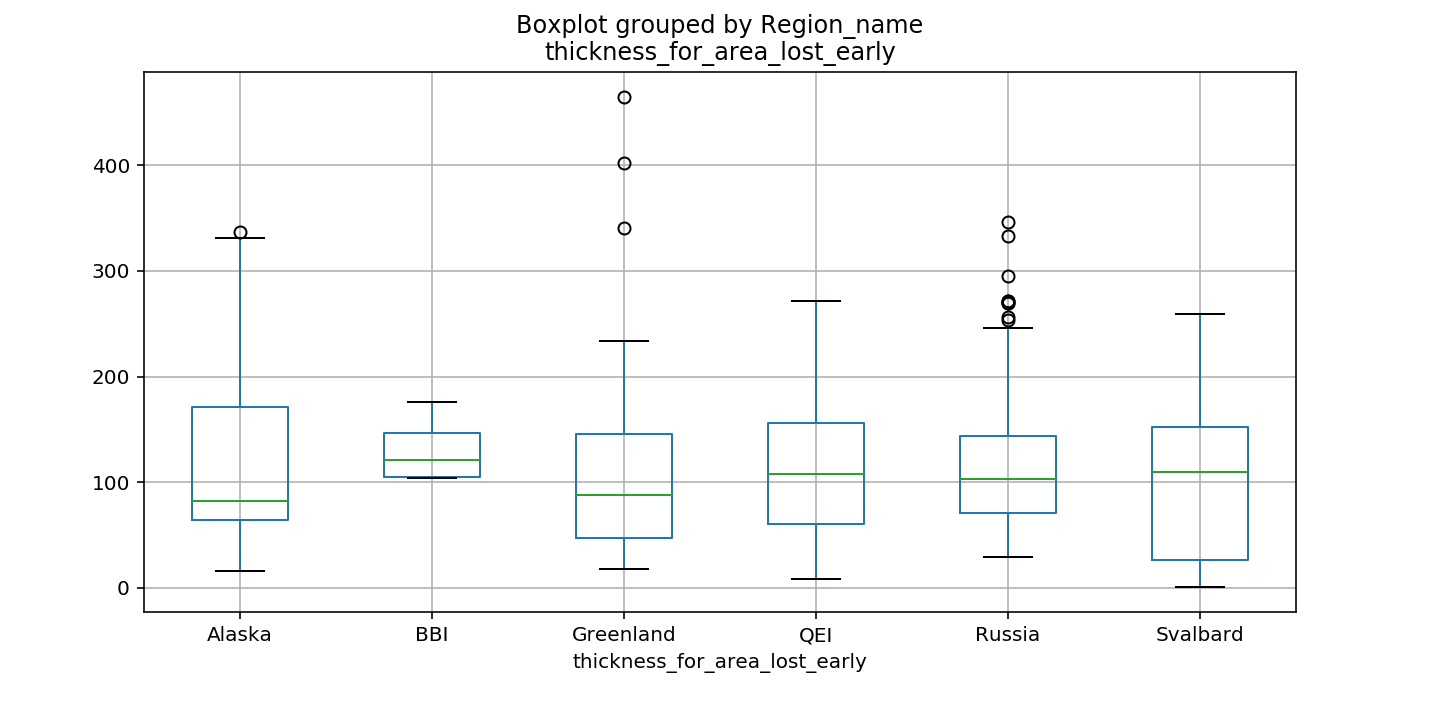

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


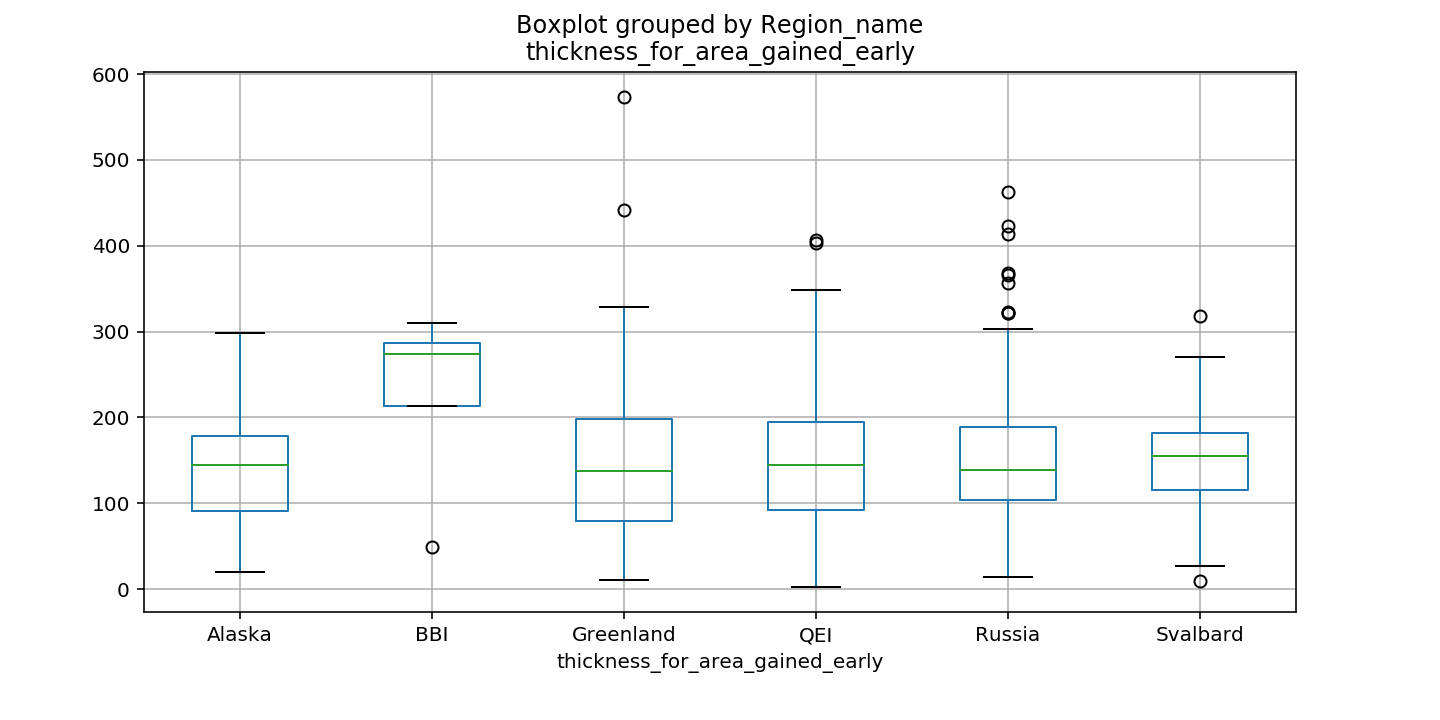

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


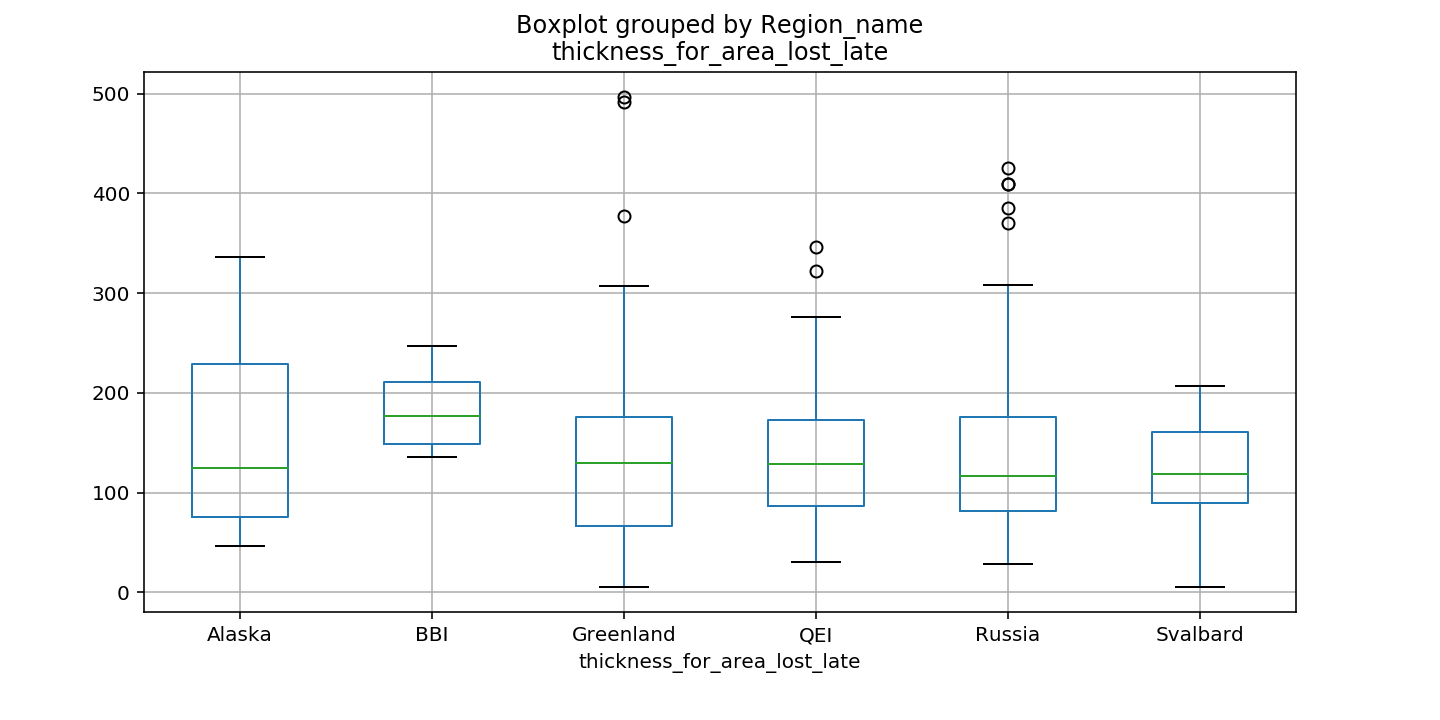

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


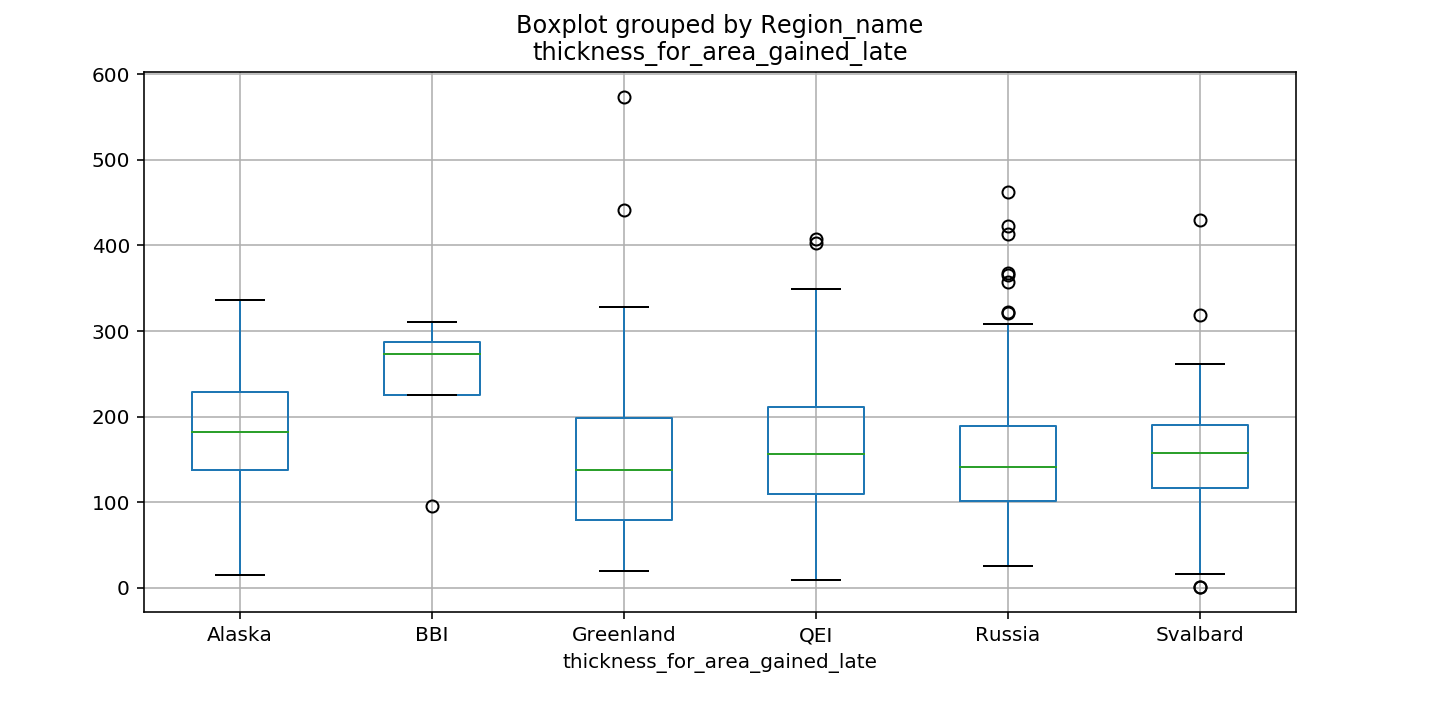

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


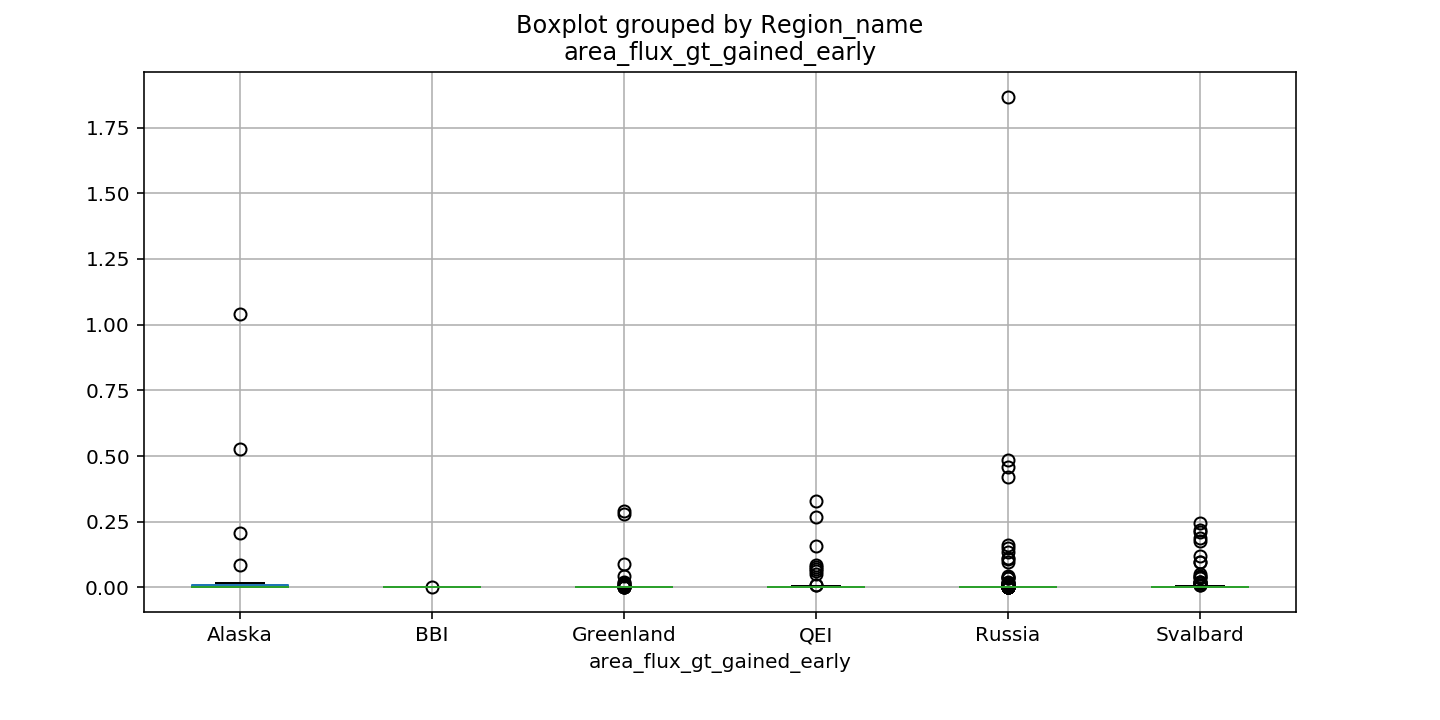

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


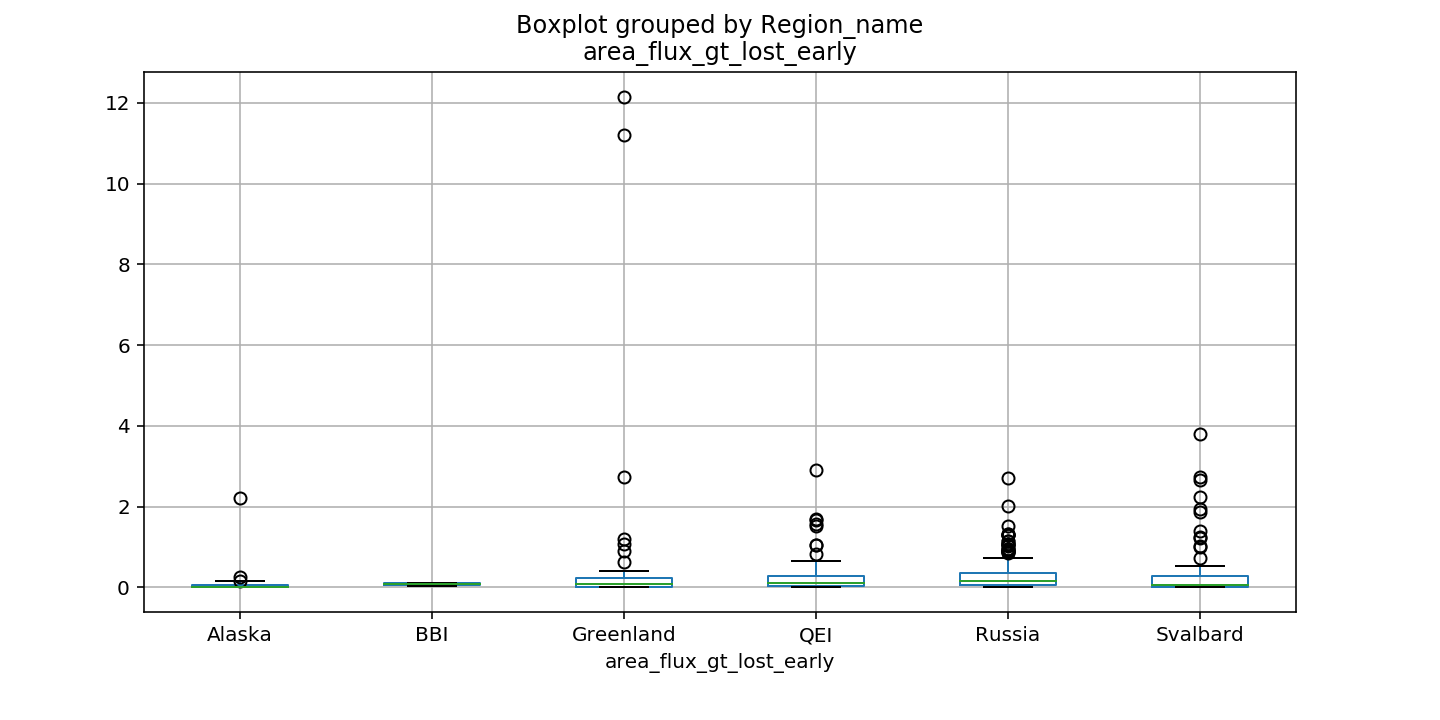

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


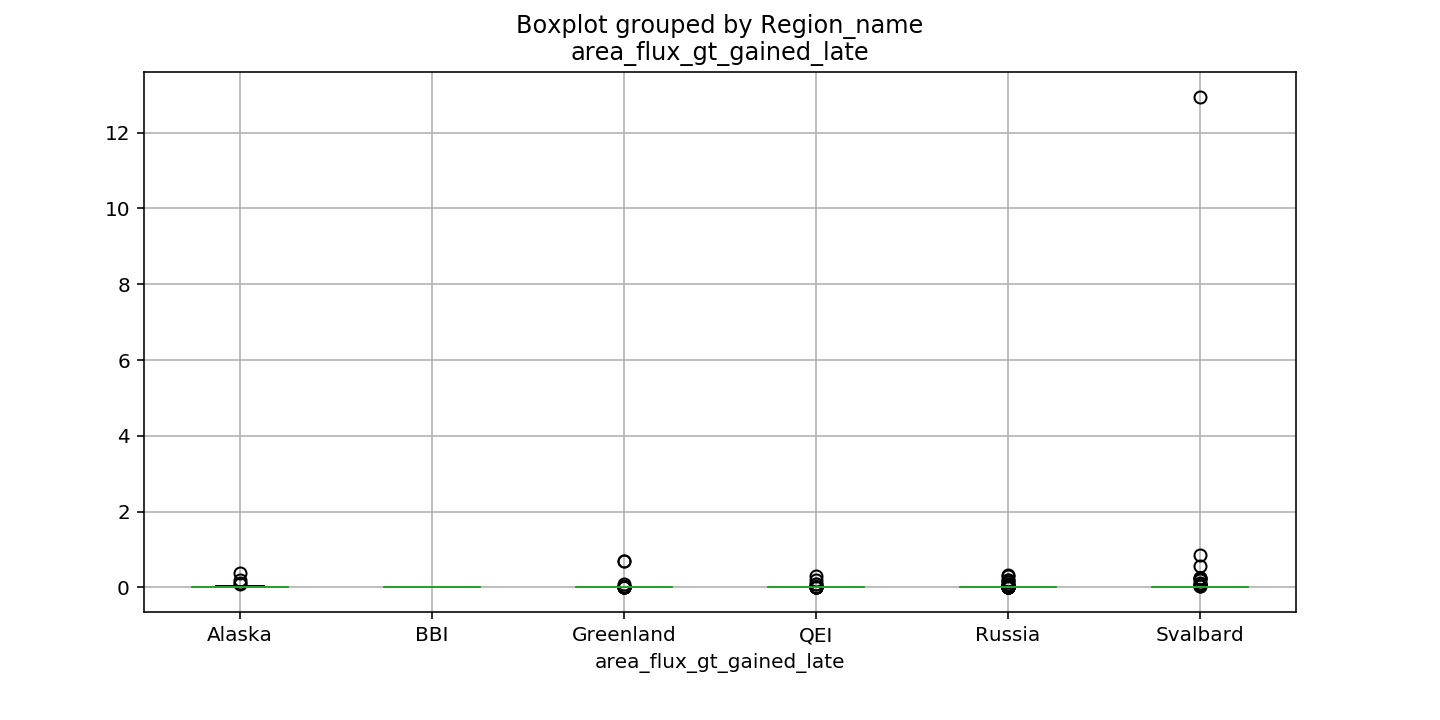

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


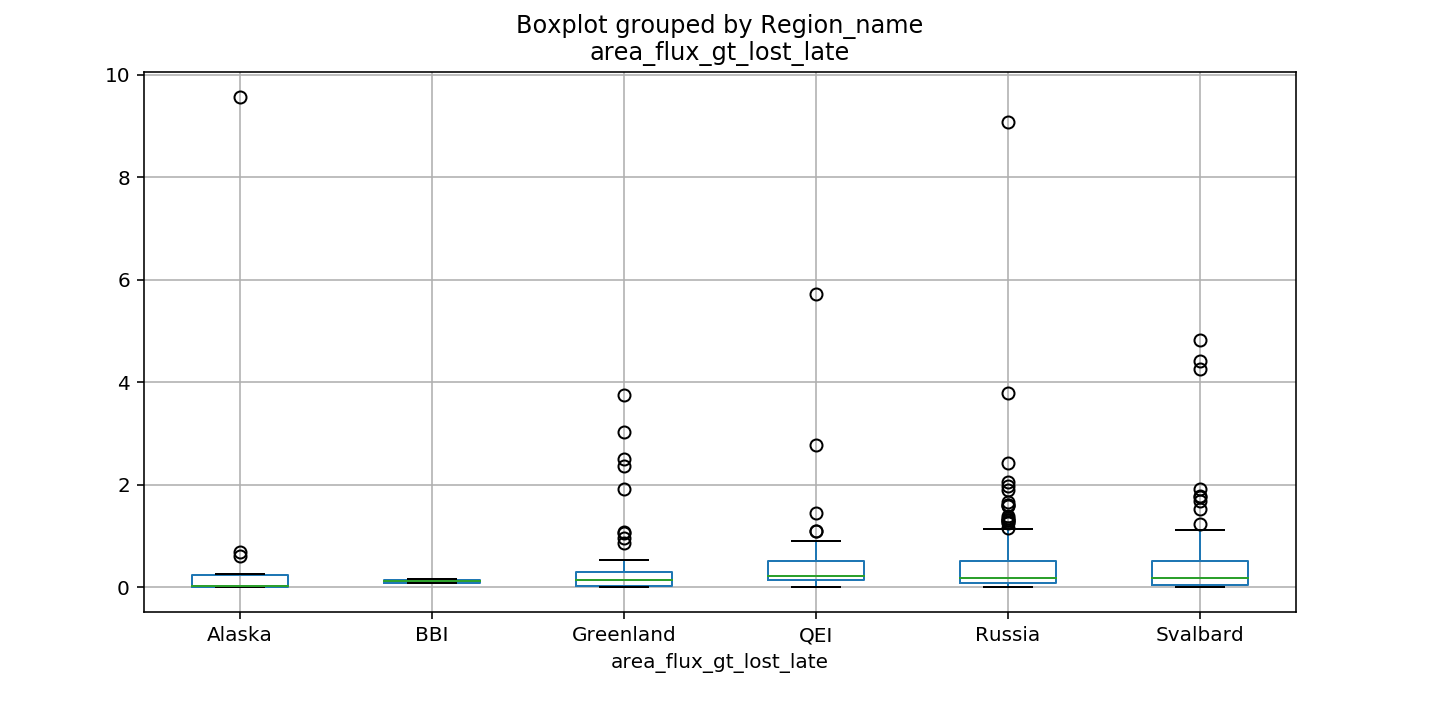

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


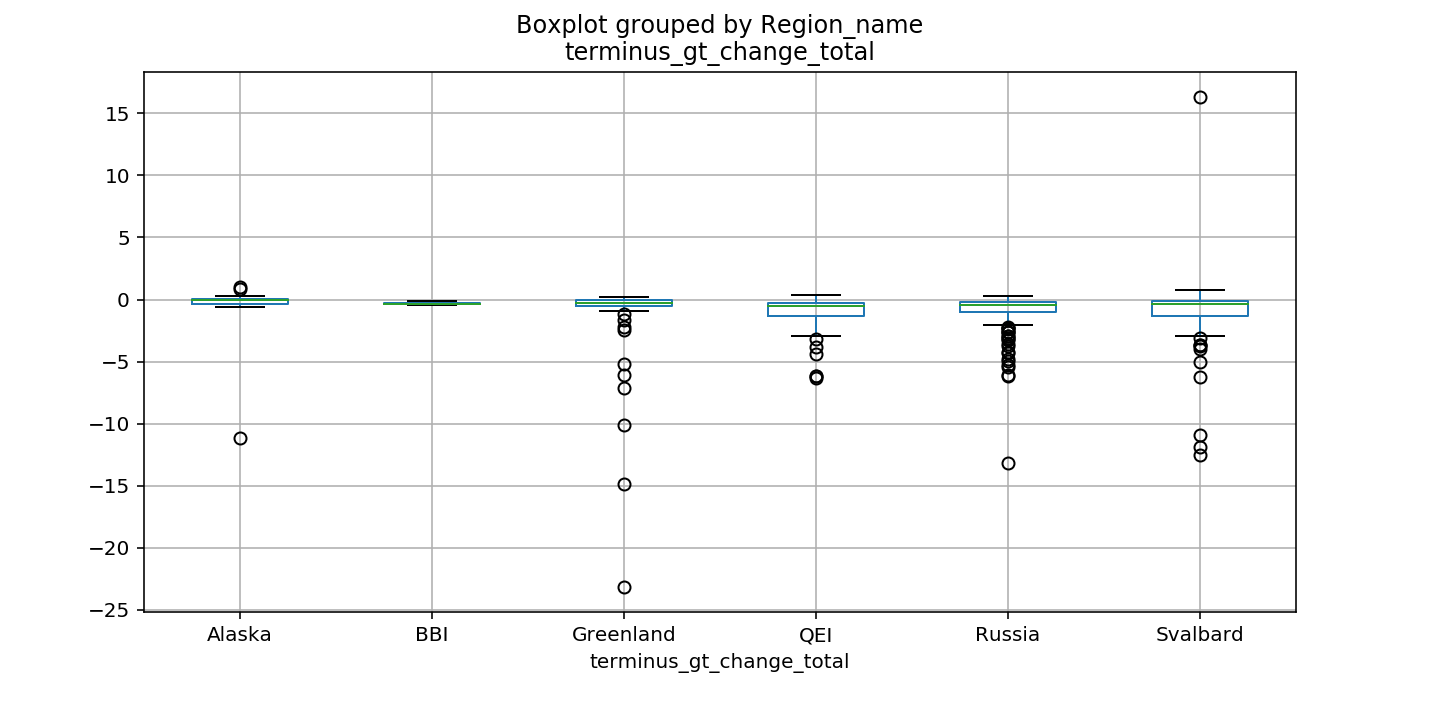

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


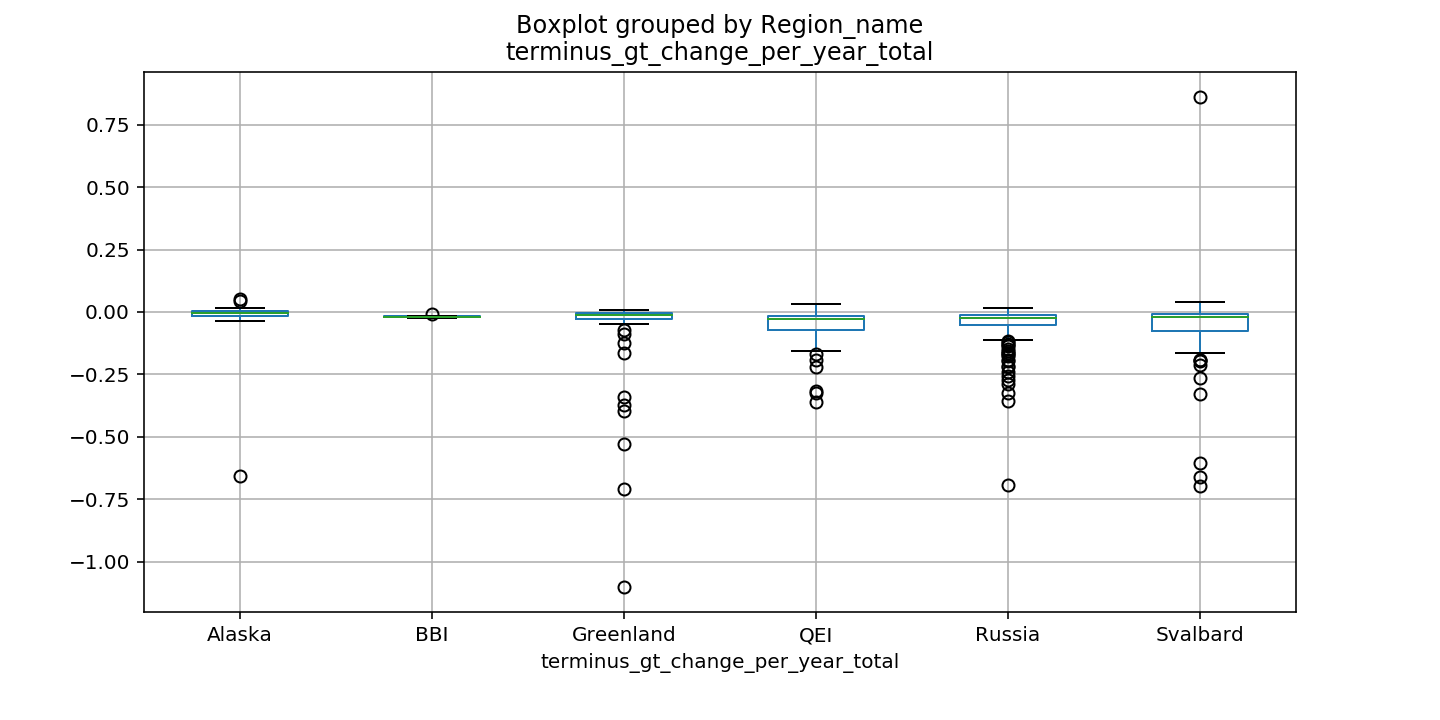

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


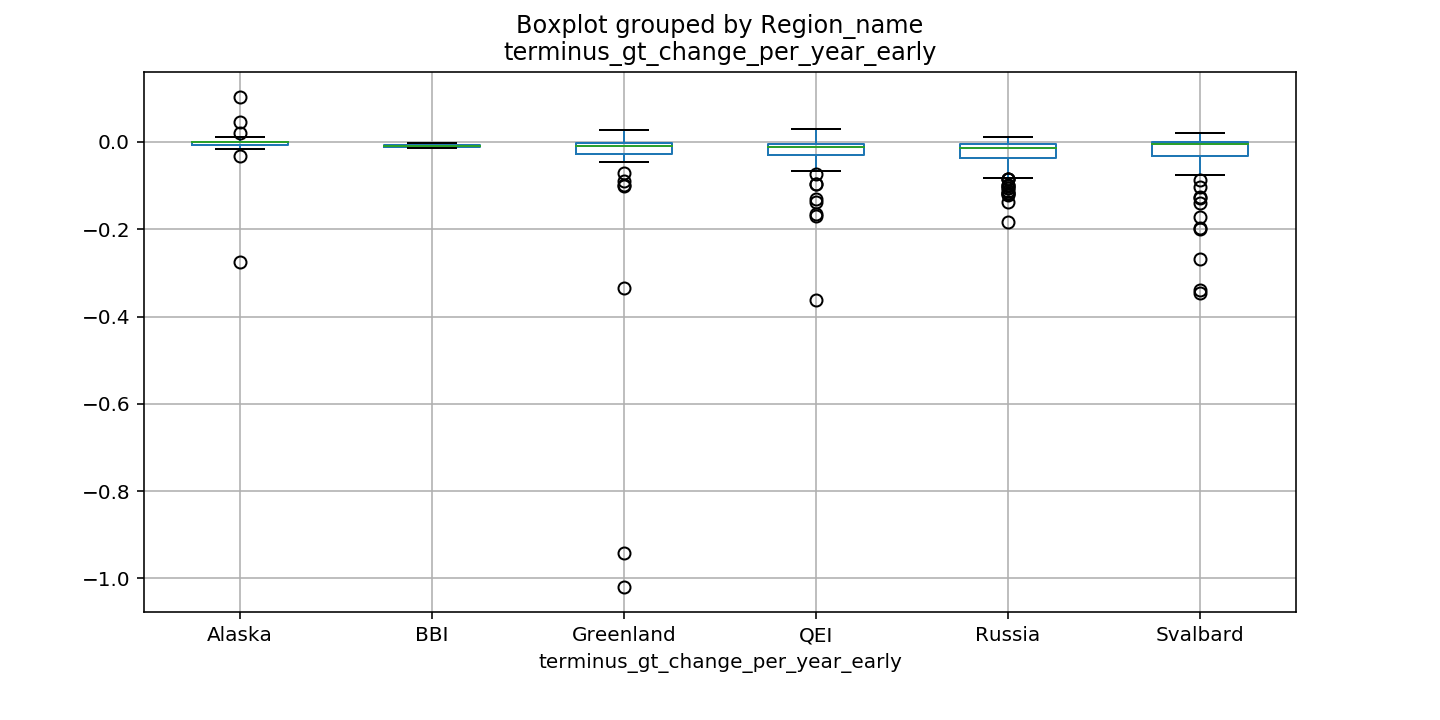

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


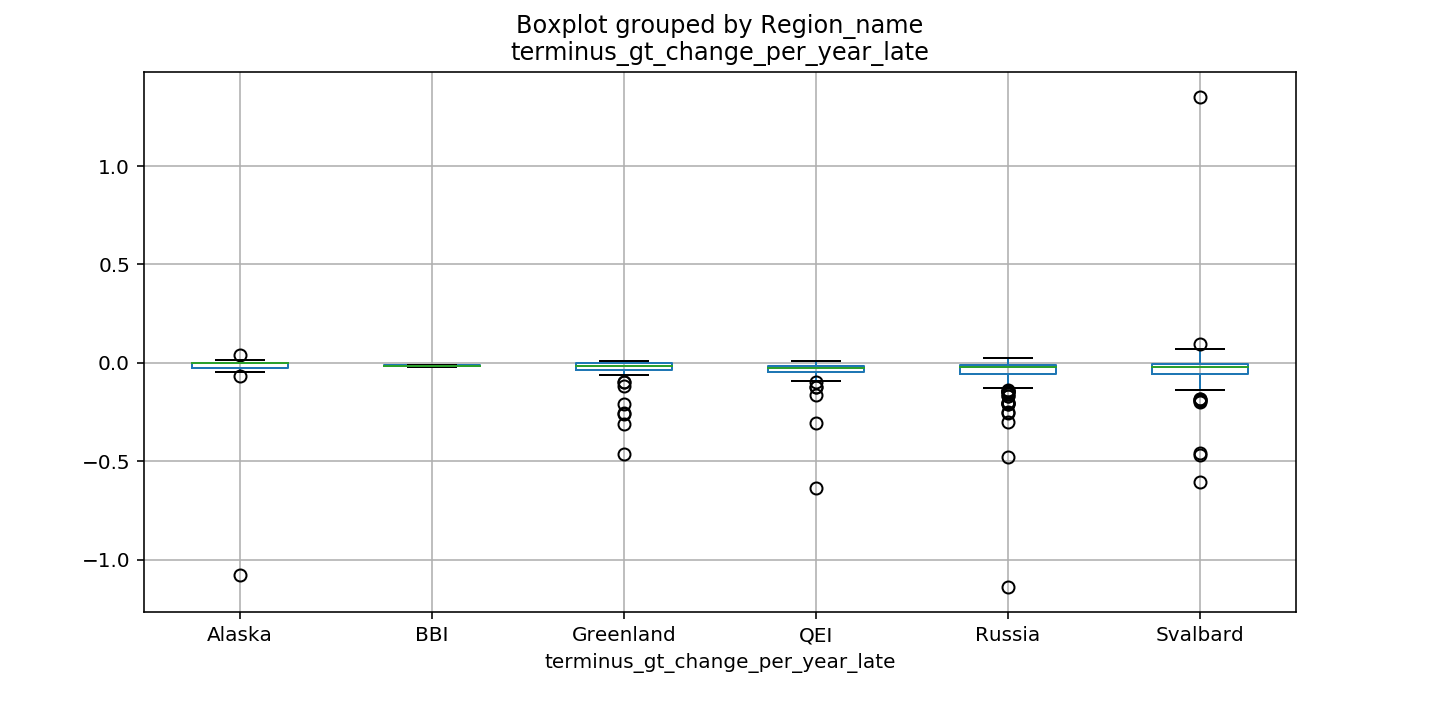

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


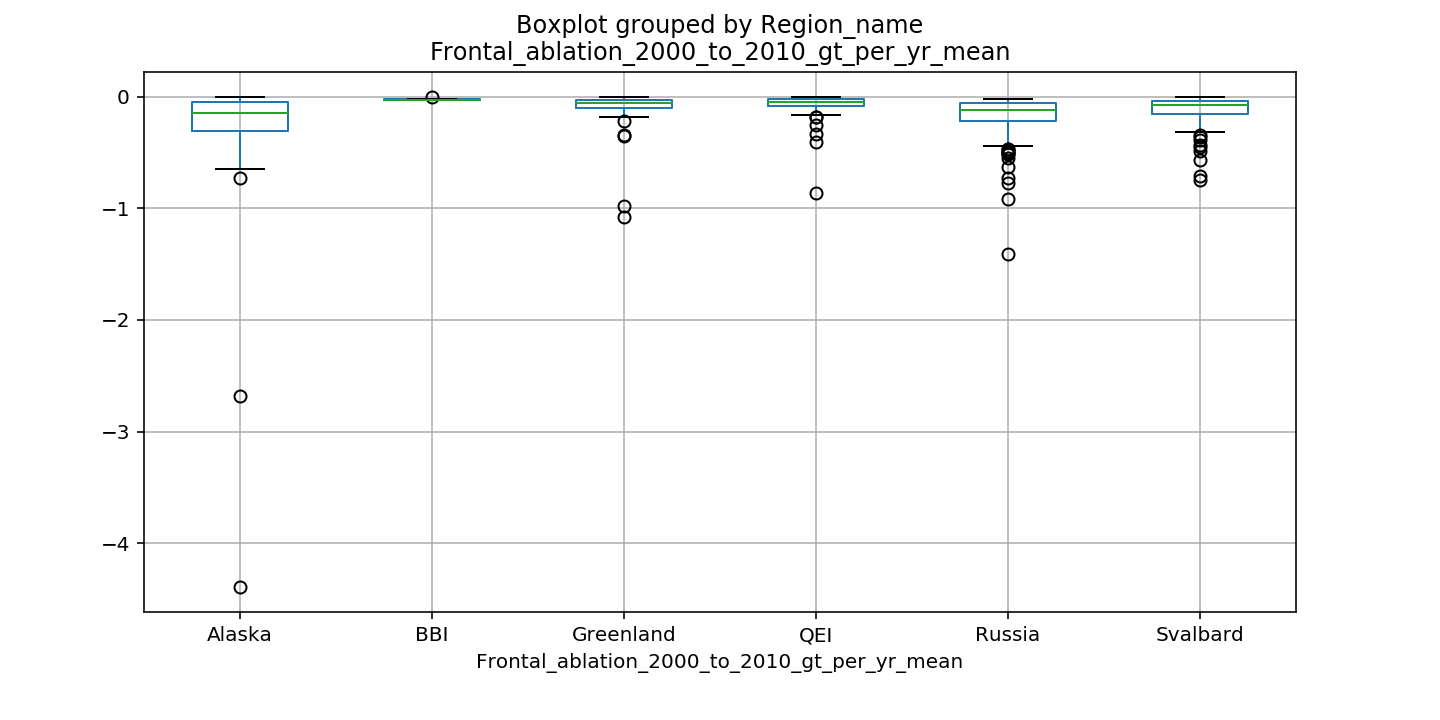

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


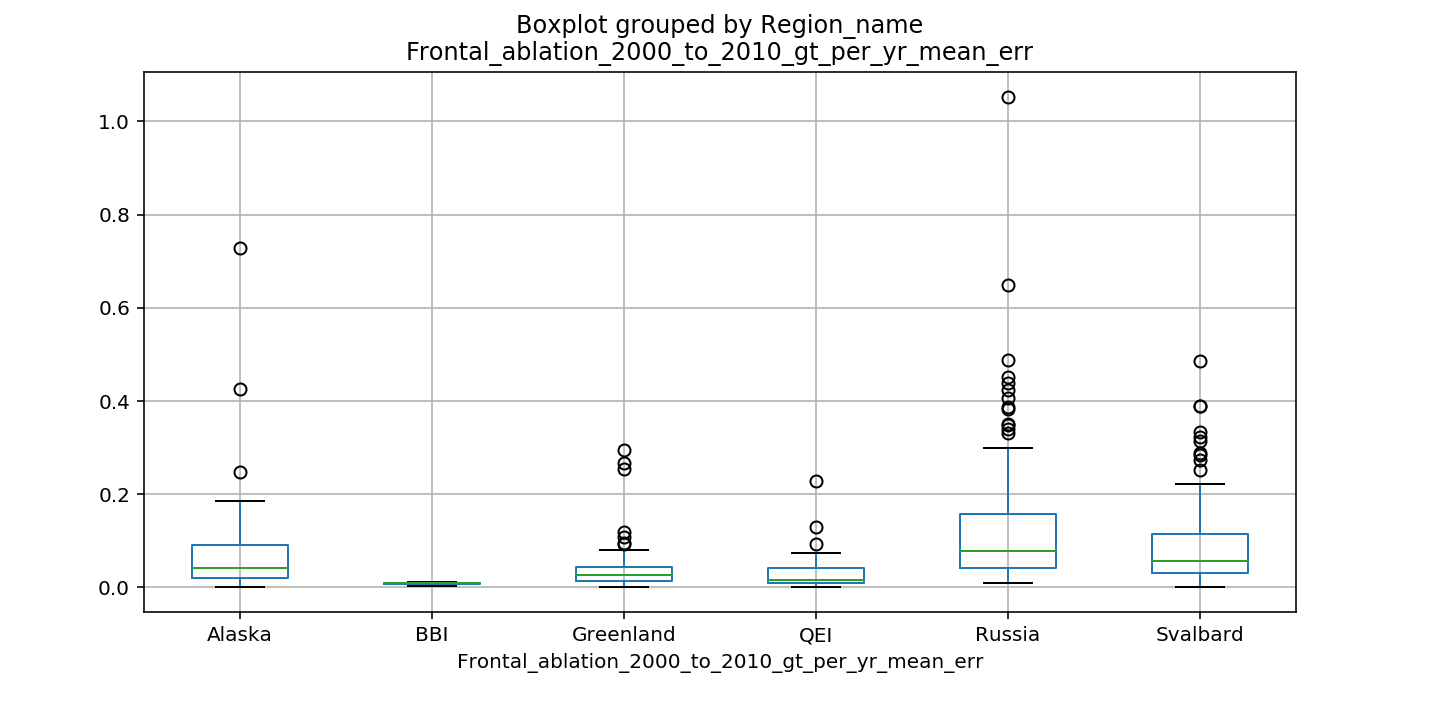

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


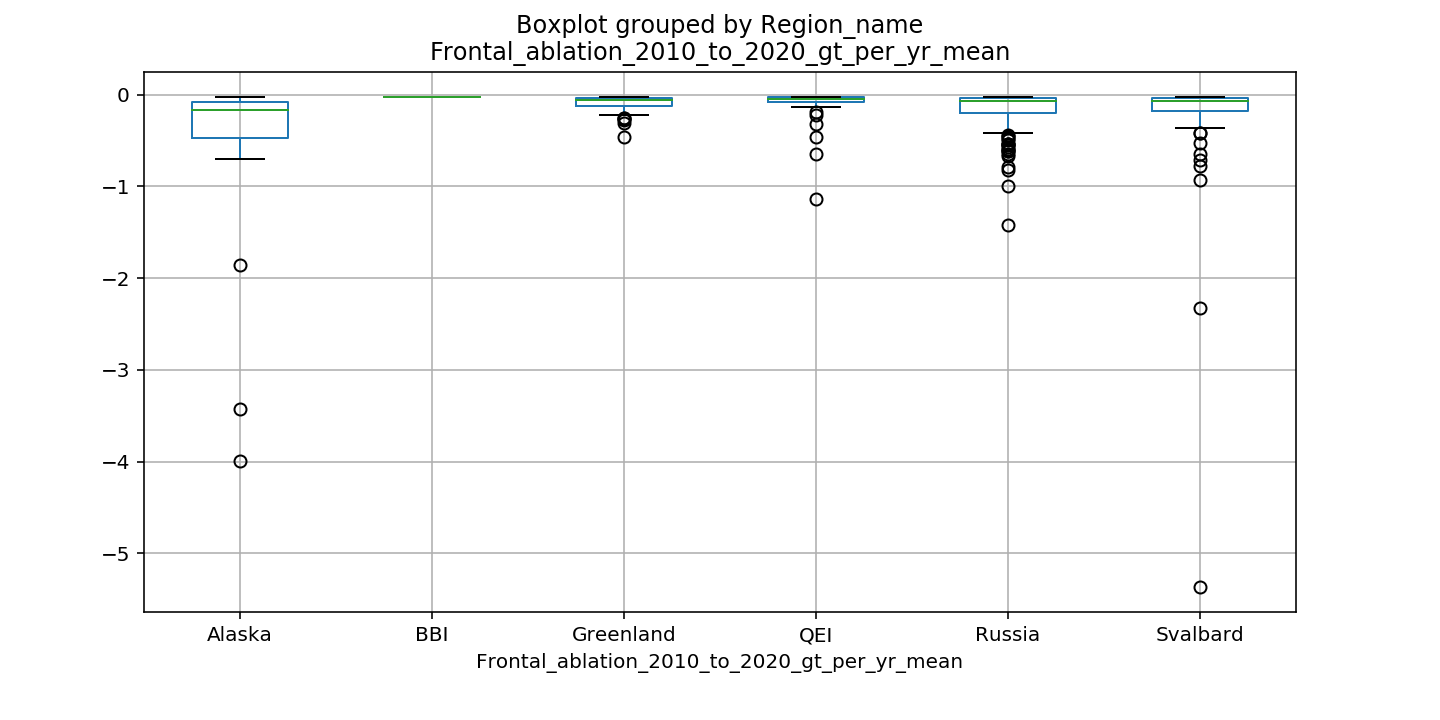

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


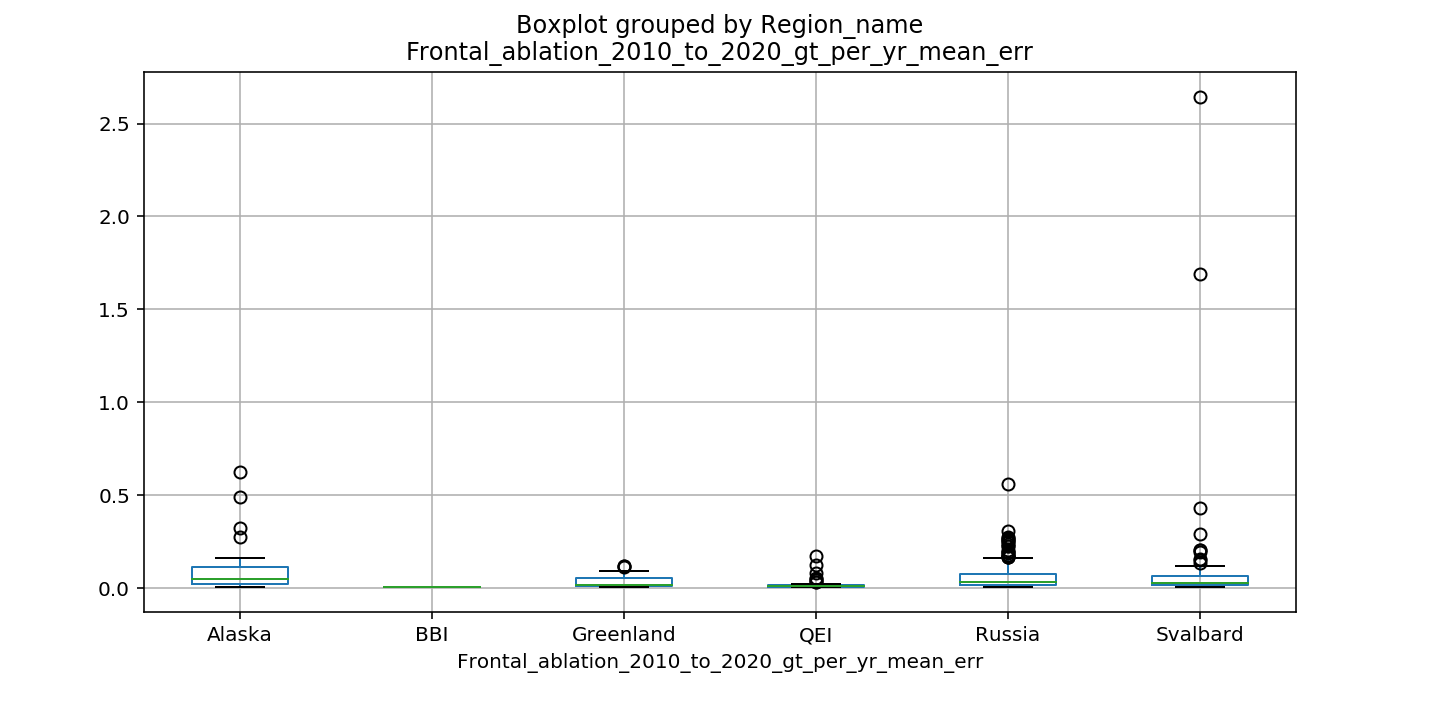

In [132]:
glacier_contrib_threshold = -0.02
Arctic_box_whis = Arctic_discharge_fluxes_with_area_export
Arctic_box_whis = Arctic_box_whis[Arctic_box_whis['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]

Arctic_box_whis['Region_name'][(Arctic_box_whis['Region_name']=='SZ')|(Arctic_box_whis['Region_name']=='FJL')|(Arctic_box_whis['Region_name']=='NZ')]='Russia'
Arctic_box_whis=Arctic_box_whis[Arctic_box_whis['Region_name']!='Iceland and Jan Mayen']
# Arctic_box_whis = Arctic_box_whis.groupby('Region_name').sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean','2010_2018_mean_flux_gt','2010_2018_mean_err_gt','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt','terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean')  
# Arctic_box_whis = Arctic_box_whis.reset_index()
for var in ['best_thickness_mean','2000_2010_mean','2000_2010_mean_err', '2010_2018_mean','2010_2018_mean_err','gate_length_km','2000_2010_mean_flux_gt','2000_2010_mean_err_gt', 
'2010_2018_mean_flux_gt','2010_2018_mean_err_gt', 'area_km2_gained_total','area_km2_lost_total', 'area_km2_lost_early',
'area_km2_gained_early', 'area_km2_lost_late','area_km2_gained_late','net_area_change_total',
'net_area_change_early', 'net_area_change_per_year_early', 'net_area_change_late', 'net_area_change_per_year_late','thickness_for_area_lost_early','thickness_for_area_gained_early', 'thickness_for_area_lost_late',
'thickness_for_area_gained_late','area_flux_gt_gained_early',
'area_flux_gt_lost_early','area_flux_gt_gained_late','area_flux_gt_lost_late',
'terminus_gt_change_total','terminus_gt_change_per_year_total',
'terminus_gt_change_per_year_early','terminus_gt_change_per_year_late',
'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']:
    Arctic_box_whis.boxplot(column=var,by='Region_name',figsize=(10,5))
    plt.xlabel(var)
    plt.savefig(('figures/box_whis_threshold_02/'+var))
# fig.savefig('test')

In [ ]:
'Surging','do_we_have_an_observation_in_middle_fifth','Farinotti_thickness_mean','best_thickness_mean', 'thickness_mean_uncertainty','2000_2010_mean', 
'2000_2010_mean_err', '2010_2018_mean','2010_2018_mean_err', 'num_pts', 'GlaThiDa_observations','Tomography_observations', 'Russian_observations', 'gate_length_km',
'2000_2010_mean_flux_gt','2000_2010_mean_err_gt', '2010_2018_mean_flux_gt','2010_2018_mean_err_gt', 'area_km2_gained_total','area_km2_lost_total', 'area_km2_lost_early',
'area_km2_gained_early', 'area_km2_lost_late','area_km2_gained_late','net_area_change_total', 'net_area_change_total_error','net_area_change_per_year_total',
'net_area_change_per_year_total_error', 'net_area_change_early','net_area_change_early_error', 'net_area_change_per_year_early','net_area_change_per_year_early_error', 'net_area_change_late',
'net_area_change_late_error', 'net_area_change_per_year_late','net_area_change_per_year_late_error','thickness_for_area_lost_early','thickness_for_area_gained_early', 'thickness_for_area_lost_late',
'thickness_for_area_gained_late', 'thickness_for_area_lost_early_err','thickness_for_area_gained_early_err','thickness_for_area_lost_late_err','thickness_for_area_gained_late_err', 'area_flux_gt_gained_early',
'area_flux_gt_gained_early_error', 'area_flux_gt_lost_early','area_flux_gt_lost_early_error', 'area_flux_gt_gained_late','area_flux_gt_gained_late_error', 'area_flux_gt_lost_late',
'area_flux_gt_lost_late_error', 'terminus_gt_change_total','terminus_gt_change_total_area_error','terminus_gt_change_per_year_total','terminus_gt_change_per_year_total_area_error',
'terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err',
'Region_name'

In [5]:
pd.set_option('display.max_rows', 200)
Arctic_discharge_fluxes_with_area_export.sum()

RGIId                                               RGI60-01.03377RGI60-01.03622RGI60-01.03890RGI6...
flux_min                                                                                      36.9059
flux_max                                                                                      67.2272
2000_2010_mean_flux_min                                                                       19.6871
2000_2010_mean_flux_max                                                                       110.751
2010_2018_mean_flux_min                                                                       34.4663
2010_2018_mean_flux_max                                                                        94.527
Area                                                                                           228087
Zmin                                                                                            61191
Zmax                                                                              

In [161]:
pd.set_option('display.max_rows', 200)
Arctic_discharge_fluxes_with_area_export.sum()

RGIId                                               RGI60-03.01741RGI60-03.01740RGI60-03.03956RGI6...
flux_min                                                                                      36.9098
flux_max                                                                                      67.2168
2000_2010_mean_flux_min                                                                       19.6871
2000_2010_mean_flux_max                                                                       110.751
2010_2018_mean_flux_min                                                                       34.4663
2010_2018_mean_flux_max                                                                        94.527
Area                                                                                           228087
Zmin                                                                                            61191
Zmax                                                                              

In [6]:
#how uncertain are different types of data
print('% mean uncertainty of all velocity data',np.mean(Arctic_discharge_fluxes_with_area_export['2010_2018_mean_err']/Arctic_discharge_fluxes_with_area_export['2010_2018_mean']))
print('% mean uncertainty of all thickness data',np.mean(Arctic_discharge_fluxes_with_area_export['thickness_mean_uncertainty']/Arctic_discharge_fluxes_with_area_export['best_thickness_mean']))
print('% mean uncertainty of all area data',np.sum(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late_error'])/np.sum(np.abs(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late'])))


% mean uncertainty of all velocity data 0.4975374246445847
% mean uncertainty of all thickness data 0.23608390570620144
% mean uncertainty of all area data 0.1815300604209257


In [79]:
#Velocity error by region
Arctic_discharge_fluxes_with_area_export['percent_velocity_error'] = (Arctic_discharge_fluxes_with_area_export['2010_2018_mean_err']/Arctic_discharge_fluxes_with_area_export['2010_2018_mean'])
Arctic_discharge_fluxes_with_area_export.groupby('Region_name')['percent_velocity_error'].mean()

Region_name
Alaska                   0.200531
BBI                      0.344596
FJL                      0.663749
Greenland                0.537730
Iceland and Jan Mayen    0.374525
NZ                       0.285260
QEI                      0.241082
SZ                       0.554702
Svalbard                 0.628314
Name: percent_velocity_error, dtype: float64

In [80]:
#Thickness error by region
Arctic_discharge_fluxes_with_area_export['percent_thickness_error'] = (Arctic_discharge_fluxes_with_area_export['thickness_mean_uncertainty']/Arctic_discharge_fluxes_with_area_export['best_thickness_mean'])
Arctic_discharge_fluxes_with_area_export.groupby('Region_name')['percent_thickness_error'].mean()

Region_name
Alaska                   0.241606
BBI                      0.260000
FJL                      0.256814
Greenland                0.256565
Iceland and Jan Mayen    0.260000
NZ                       0.221412
QEI                      0.213511
SZ                       0.136516
Svalbard                 0.180000
Name: percent_thickness_error, dtype: float64

In [7]:
#Area error by region
Arctic_discharge_fluxes_with_area_export['abs_net_area_change_per_year_late'] = np.abs(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late'])
Arctic_discharge_fluxes_with_area_export.groupby('Region_name')['net_area_change_per_year_late_error'].sum()/Arctic_discharge_fluxes_with_area_export.groupby('Region_name')['abs_net_area_change_per_year_late'].sum()

Region_name
Alaska                   0.147624
BBI                      0.498936
FJL                      0.327958
Greenland                0.283515
Iceland and Jan Mayen    0.164954
NZ                       0.110580
QEI                      0.230221
SZ                       0.089173
Svalbard                 0.107721
dtype: float64

In [89]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name')['net_area_change_per_year_late'].sum()

Region_name
Alaska                   -4.891778
BBI                      -0.850671
FJL                     -44.353806
Greenland               -24.467877
Iceland and Jan Mayen    -0.524118
NZ                      -14.889014
QEI                     -29.406023
SZ                      -16.041441
Svalbard                -23.301478
Name: net_area_change_per_year_late, dtype: float64

In [71]:
(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late_error']/np.abs(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late']))

633.7197734227116

In [63]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()[['2000_2010_mean_flux_gt','2000_2010_mean_err_gt','2010_2018_mean_flux_gt','2010_2018_mean_err_gt']].sort_values(by='2010_2018_mean_flux_gt') 

2000_2010_mean_flux_gt  2000_2010_mean_err_gt  \
Region_name                                                            
BBI                                  0.097955               0.044989   
Iceland and Jan Mayen                0.543218               0.360704   
QEI                                  3.759432               1.545901   
Greenland                            4.099803               2.576579   
SZ                                   4.692538               2.807430   
NZ                                   4.980522               3.314599   
FJL                                 20.802513              19.246290   
Alaska                              10.512865               2.328631   
Svalbard                            10.316993               9.527691   

                       2010_2018_mean_flux_gt  2010_2018_mean_err_gt  
Region_name                                                           
BBI                                  0.074372               0.033559  
Iceland and Jan Mayen                0.663928               0.509039  
QEI                                  3.024793               0.650597  
Greenland                            3.468080               1.951367  
SZ                                   5.600742               2.382603  
NZ                                   6.395666               2.702333  
FJL                                 10.260708               7.365323  
Alaska                              11.518255               2.457390  
Svalbard                            18.136894               9.485625

In [9]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean') 

Frontal_ablation_2000_to_2010_gt_per_yr_mean  \
Region_name                                                           
FJL                                                      -24.130609   
Svalbard                                                 -13.641775   
Alaska                                                   -10.686732   
Greenland                                                 -8.314799   
NZ                                                        -6.737283   
QEI                                                       -6.117114   
SZ                                                        -5.200982   
Iceland and Jan Mayen                                     -0.607090   
BBI                                                       -0.193963   

                       Frontal_ablation_2000_to_2010_gt_per_yr_mean_err  \
Region_name                                                               
FJL                                                           19.430165   
Svalbard                                                       9.623741   
Alaska                                                         2.309362   
Greenland                                                      3.601869   
NZ                                                             3.441880   
QEI                                                            2.264586   
SZ                                                             2.916776   
Iceland and Jan Mayen                                          0.367461   
BBI                                                            0.077829   

                       Frontal_ablation_2010_to_2020_gt_per_yr_mean  \
Region_name                                                           
FJL                                                      -15.276820   
Svalbard                                                 -21.597221   
Alaska                                                   -12.773918   
Greenland                                                 -6.537959   
NZ                                                        -9.372444   
QEI                                                       -6.274820   
SZ                                                        -7.095880   
Iceland and Jan Mayen                                     -0.835976   
BBI                                                       -0.187248   

                       Frontal_ablation_2010_to_2020_gt_per_yr_mean_err  
Region_name                                                              
FJL                                                            7.719883  
Svalbard                                                       9.545023  
Alaska                                                         2.572890  
Greenland                                                      2.564816  
NZ                                                             2.921742  
QEI                                                            1.375195  
SZ                                                             2.594756  
Iceland and Jan Mayen                                          0.518542  
BBI                                                            0.055125

In [102]:
Arctic_discharge_fluxes_with_area_export.columns[100:]

Index(['average_RUS_andrey_thickness_lost_late',
       'average_RUS_andrey_thickness_gained_late',
       'average_RUS_julian_thickness_lost_early',
       'average_RUS_julian_thickness_gained_early',
       'average_RUS_julian_thickness_lost_late',
       'average_RUS_julian_thickness_gained_late',
       'average_Farinotti_thickness_lost_early',
       'average_Farinotti_thickness_gained_early',
       'average_Farinotti_thickness_lost_late',
       'average_Farinotti_thickness_gained_late',
       'average_tomo_thickness_lost_early',
       'average_tomo_thickness_gained_early',
       'average_tomo_thickness_lost_late',
       'average_tomo_thickness_gained_late', 'thickness_for_area_lost_early',
       'thickness_for_area_gained_early', 'thickness_for_area_lost_late',
       'thickness_for_area_gained_late', 'thickness_for_area_lost_early_err',
       'thickness_for_area_gained_early_err',
       'thickness_for_area_lost_late_err',
       'thickness_for_area_gained_late_err', 'ar

In [87]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()[['terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt', '2010_2018_mean_flux_gt','2010_2018_mean_err_gt','Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]#.sort_values(by='lon') 

terminus_gt_change_per_year_early  \
Region_name                                                
Alaska                                         -0.173867   
BBI                                            -0.096007   
FJL                                            -3.328097   
Greenland                                      -4.214995   
Iceland and Jan Mayen                          -0.056222   
NZ                                             -1.756760   
QEI                                            -2.357682   
SZ                                             -0.508444   
Svalbard                                       -3.324782   

                       terminus_gt_change_per_year_early_area_error  \
Region_name                                                           
Alaska                                                     0.222453   
BBI                                                        0.056235   
FJL                                                        1.921090   
Greenland                                                  1.579547   
Iceland and Jan Mayen                                      0.020399   
NZ                                                         0.614395   
QEI                                                        1.252959   
SZ                                                         0.408712   
Svalbard                                                   1.819240   

                       terminus_gt_change_per_year_late  \
Region_name                                               
Alaska                                        -1.255663   
BBI                                           -0.112876   
FJL                                           -5.016112   
Greenland                                     -3.069879   
Iceland and Jan Mayen                         -0.161848   
NZ                                            -2.976778   
QEI                                           -3.250028   
SZ                                            -1.495138   
Svalbard                                      -3.460327   

                       terminus_gt_change_per_year_late_area_error  \
Region_name                                                          
Alaska                                                    0.399965   
BBI                                                       0.037438   
FJL                                                       1.691358   
Greenland                                                 1.007504   
Iceland and Jan Mayen                                     0.043926   
NZ                                                        0.862855   
QEI                                                       1.033453   
SZ                                                        0.963380   
Svalbard                                                  2.721067   

                       2000_2010_mean_flux_gt  2000_2010_mean_err_gt  \
Region_name                                                            
Alaska                              10.512865               2.328631   
BBI                                  0.097955               0.044989   
FJL                                 20.802513              19.246290   
Greenland                            4.099803               2.576579   
Iceland and Jan Mayen                0.543218               0.360704   
NZ                                   4.980522               3.314599   
QEI                                  3.759432               1.545901   
SZ                                   4.692538               2.807430   
Svalbard                            10.316993               9.527691   

                       2010_2018_mean_flux_gt  2010_2018_mean_err_gt  \
Region_name                                                            
Alaska                              11.518255               2.457390   
BBI                                  0.074372               0.033559   
FJL                                 10.260708               7.365323   
Greenl

In [15]:
Arctic_discharge_fluxes_with_area_export.sum()[['terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt', '2010_2018_mean_flux_gt','2010_2018_mean_err_gt','Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]

terminus_gt_change_per_year_early                  -15.8169
terminus_gt_change_per_year_early_area_error        7.89503
terminus_gt_change_per_year_late                   -20.7986
terminus_gt_change_per_year_late_area_error         8.76095
2000_2010_mean_flux_gt                              59.8058
2000_2010_mean_err_gt                               41.7528
2010_2018_mean_flux_gt                              59.1434
2010_2018_mean_err_gt                               27.5378
Frontal_ablation_2000_to_2010_gt_per_yr_mean       -75.6303
Frontal_ablation_2000_to_2010_gt_per_yr_mean_err    44.0337
Frontal_ablation_2010_to_2020_gt_per_yr_mean       -79.9523
Frontal_ablation_2010_to_2020_gt_per_yr_mean_err     29.868
dtype: object

In [12]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').count()

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
Region_name                                                                 
Alaska                    42        42        42                       42   
BBI                       86        86        86                       86   
FJL                      321       321       321                      321   
Greenland                514       514       514                      514   
Iceland and Jan Mayen      7         7         7                        7   
NZ                        40        40        40                       40   
QEI                      246       246       246                      246   
SZ                        44        44        44                       44   
Svalbard                 160       160       160                      160   

                       2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
Region_name                                                               
Alaska                                      42                       42   
BBI                                         86                       86   
FJL                                        321                      321   
Greenland                                  514                      514   
Iceland and Jan Mayen                        7                        7   
NZ                                          40                       40   
QEI                                        246                      246   
SZ                                          44                       44   
Svalbard                                   160                      160   

                       2010_2018_mean_flux_max  Name_x  Area  Zmin  Zmax  \
Region_name                                                                
Alaska                                      42      42    42    42    42   
BBI                                         86       0    86    86    86   
FJL                                        321     320   321   321   321   
Greenland                                  514       8   514   514   514   
Iceland and Jan Mayen                        7       7     7     7     7   
NZ                                          40      40    40    40    40   
QEI                                        246      42   246   246   246   
SZ                                          44      43    44    44    44   
Svalbard                                   160     157   160   160   160   

                       Zmed  Slope  Aspect  Lmax  Status  Connect  Form  \
Region_name                                                               
Alaska                   42     42      42    42      42       42    42   
BBI                      86     86      86    86      86       86    86   
FJL                     321    321     321   321     321      321   321   
Greenland               514    514     514   514     514      514   514   
Iceland and Jan Mayen     7      7       7     7       7        7     7   
NZ                       40     40      40    40      40       40    40   
QEI                     246    246     246   246     246      246   246   
SZ                       44     44      44    44      44       44    44   
Svalbard                160    160     160   160     160      160   160   

                       TermType  Surging  Linkages  Farinotti_thickness_min  \
Region_name                                                                   
Alaska                       42       42        42                       42   
BBI                          86       86        86                       86   
FJL                         321      321       321                      321   
Greenland                   514      514       514                      514   
Iceland and Jan Mayen         7        7         7                        7   
NZ                           40       40        40                       40   
QEI                         246      246       246    

In [13]:
Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']!='Greenland'].sum()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]   

Frontal_ablation_2000_to_2010_gt_per_yr_mean       -67.3155
Frontal_ablation_2000_to_2010_gt_per_yr_mean_err    40.4318
Frontal_ablation_2010_to_2020_gt_per_yr_mean       -73.4143
Frontal_ablation_2010_to_2020_gt_per_yr_mean_err    27.3032
dtype: object

In [14]:
Arctic_discharge_fluxes_with_area_export.sum()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]   

Frontal_ablation_2000_to_2010_gt_per_yr_mean       -75.6303
Frontal_ablation_2000_to_2010_gt_per_yr_mean_err    44.0337
Frontal_ablation_2010_to_2020_gt_per_yr_mean       -79.9523
Frontal_ablation_2010_to_2020_gt_per_yr_mean_err     29.868
dtype: object

In [111]:
Arctic_discharge_fluxes_with_area_export['do_we_have_an_observation_in_middle_fifth'].sum()

202.0

In [122]:
temp_data =Arctic_discharge_fluxes_with_area_export
temp_data[((temp_data['GlaThiDa_observations']/temp_data['num_pts'])>0.90)|((temp_data['Tomography_observations']/temp_data['num_pts'])>0.90)|((temp_data['Russian_observations']/temp_data['num_pts'])>0.90)].count()

RGIId                                80
flux_min                             80
flux_max                             80
2000_2010_mean_flux_min              80
2000_2010_mean_flux_max              80
                                     ..
geometry                             80
percent_velocity_error               80
percent_thickness_error              80
percent_area_error                   80
abs_net_area_change_per_year_late    80
Length: 152, dtype: int64

1460
1460


/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


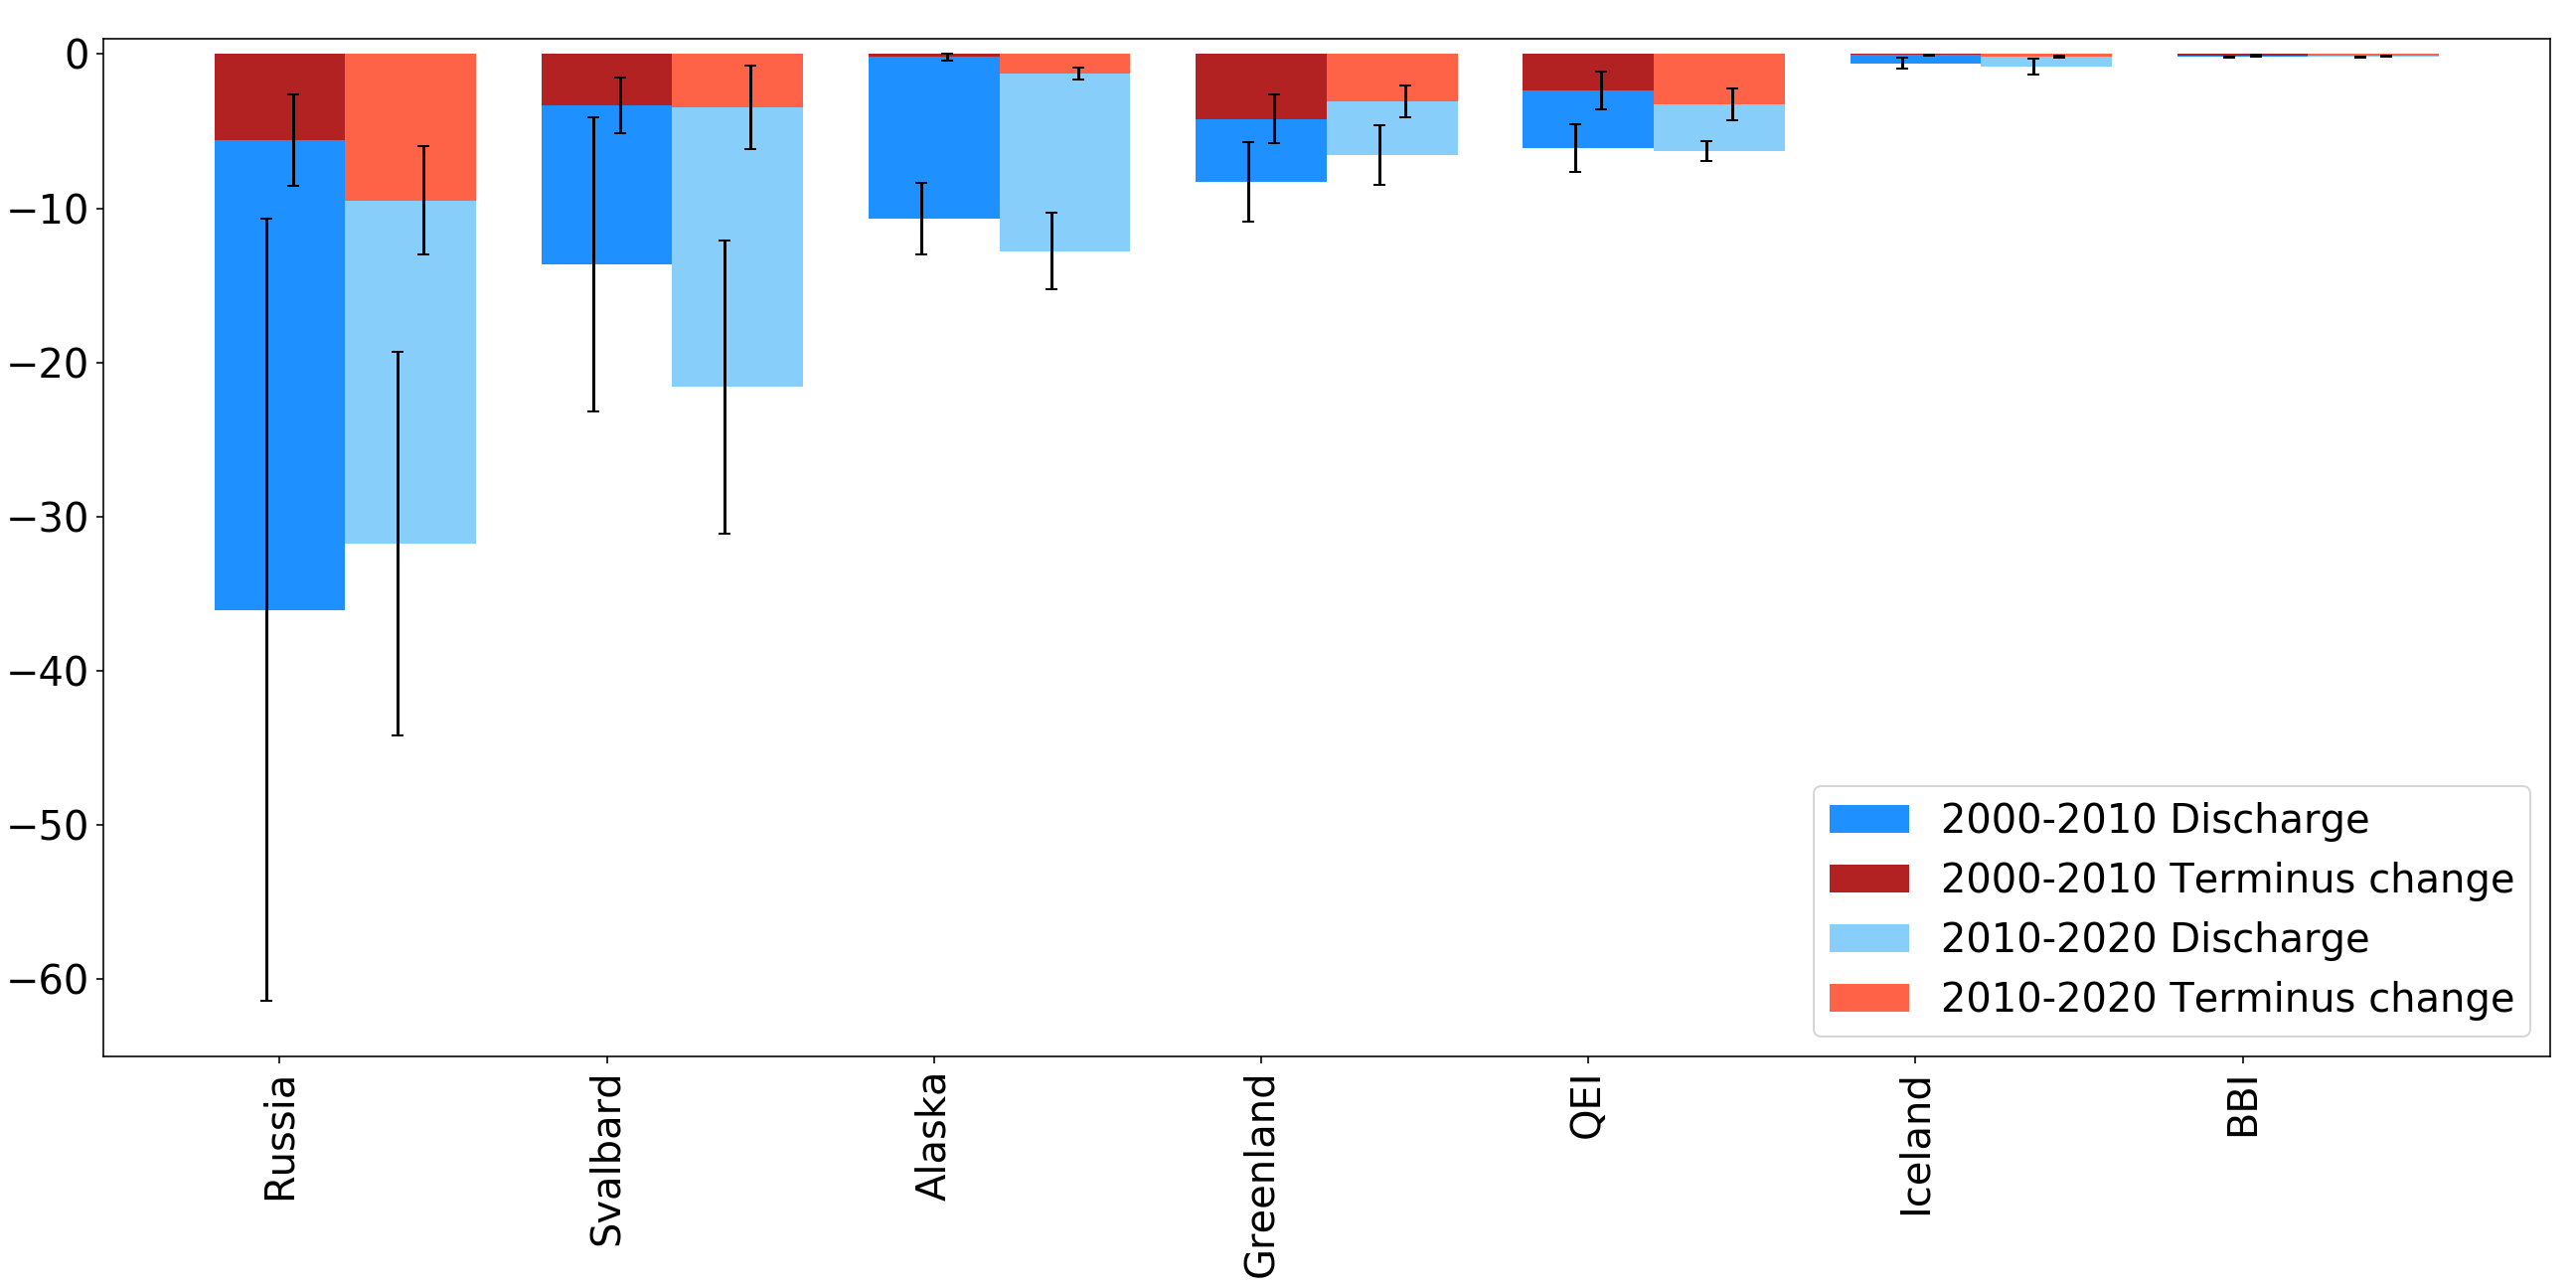

<IPython.core.display.Javascript object>


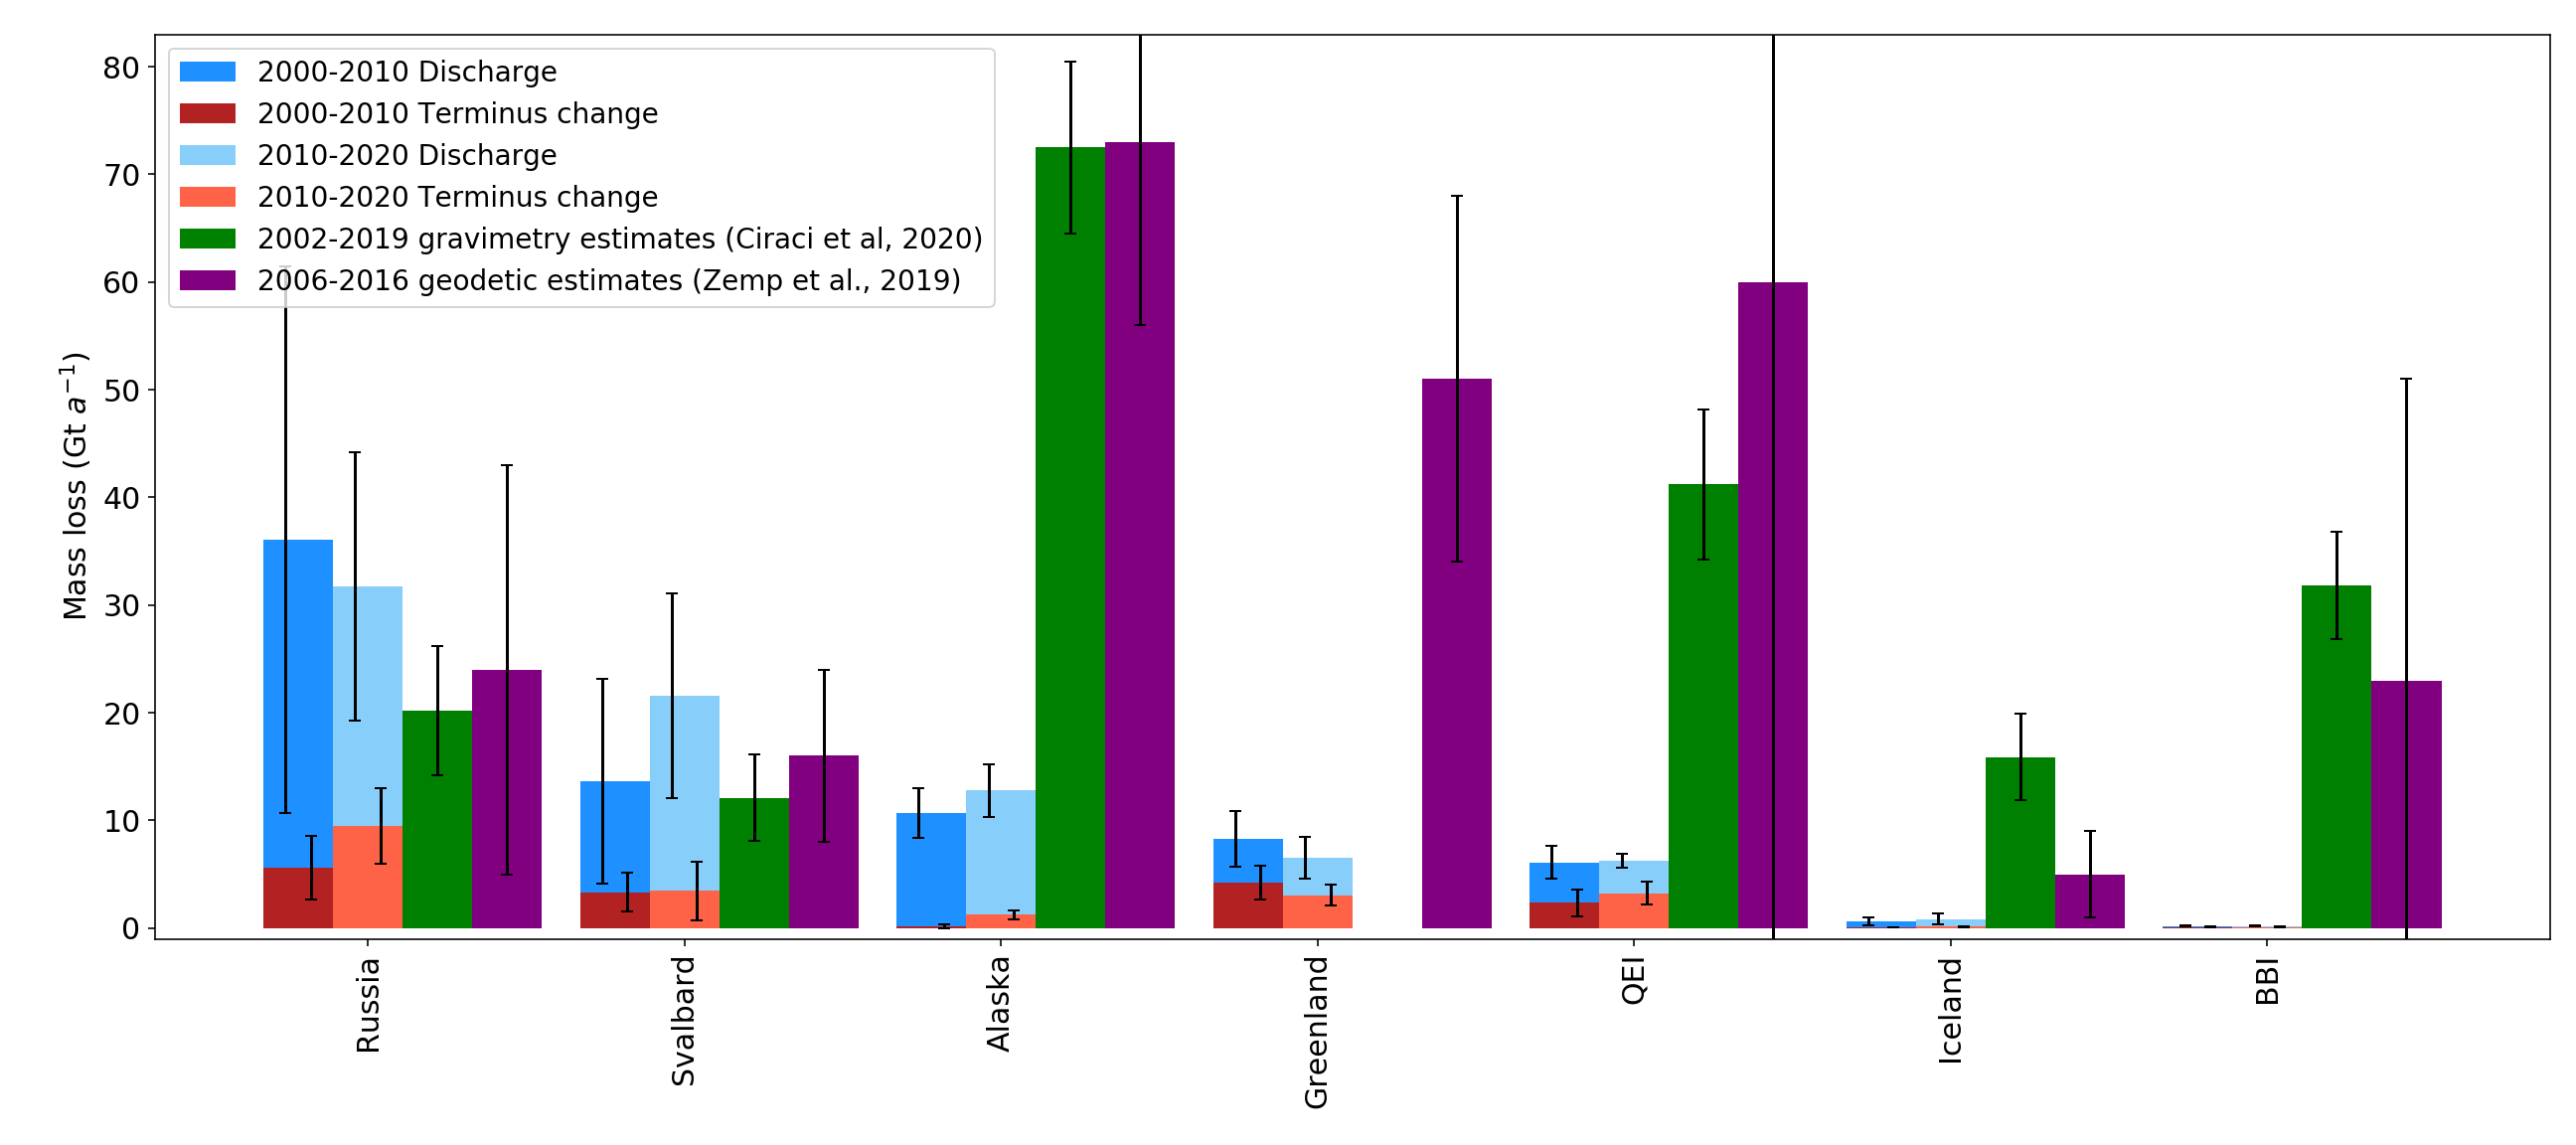

In [36]:
Arctic_region_fa_plotting = Arctic_discharge_fluxes_with_area_export
print(len(Arctic_region_fa_plotting))
Arctic_region_fa_plotting = Arctic_region_fa_plotting[Arctic_region_fa_plotting['Subregion_name']!='Jan Mayen']
print(len(Arctic_region_fa_plotting))
Arctic_region_fa_plotting['Region_name'][(Arctic_region_fa_plotting['Region_name']=='SZ')|(Arctic_region_fa_plotting['Region_name']=='FJL')|(Arctic_region_fa_plotting['Region_name']=='NZ')]='Russia'
Arctic_region_fa_plotting['Region_name'][(Arctic_region_fa_plotting['Region_name']=='Iceland and Jan Mayen')]='Iceland'
Arctic_region_fa_plotting = Arctic_region_fa_plotting.groupby('Region_name').sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean','2010_2018_mean_flux_gt','2010_2018_mean_err_gt','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt','terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean')  
Arctic_region_fa_plotting = Arctic_region_fa_plotting.reset_index()

Arctic_region_fa_plotting['bottom_2000_2010'] = Arctic_region_fa_plotting['terminus_gt_change_per_year_early']
Arctic_region_fa_plotting['bottom_2010_2020'] = Arctic_region_fa_plotting['terminus_gt_change_per_year_late']

for i in range(0,len(Arctic_region_fa_plotting)):
    if Arctic_region_fa_plotting['terminus_gt_change_per_year_early'][i]>0:
        Arctic_region_fa_plotting['bottom_2000_2010'][i] = 0

for i in range(0,len(Arctic_region_fa_plotting)):
    if Arctic_region_fa_plotting['terminus_gt_change_per_year_late'][i]>0:
        Arctic_region_fa_plotting['bottom_2010_2020'][i] = 0

#First make the figure with only my data
fig,ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(18)
# plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frontal ablation (gt/a)',fontsize=20)
# plt.title('Arctic frontal ablation')

barWidth = .4
bar_position = np.arange(len(Arctic_region_fa_plotting))
cap_width=3

plt.bar(bar_position,-Arctic_region_fa_plotting['2000_2010_mean_flux_gt'],label='2000-2010 Discharge',bottom=Arctic_region_fa_plotting['bottom_2000_2010'],width=barWidth,color='dodgerblue')
plt.bar(bar_position,Arctic_region_fa_plotting['terminus_gt_change_per_year_early'],label='2000-2010 Terminus change',width=barWidth,color='firebrick')

plt.bar(bar_position+barWidth,-Arctic_region_fa_plotting['2010_2018_mean_flux_gt'],label='2010-2020 Discharge',bottom=Arctic_region_fa_plotting['bottom_2010_2020'],width=barWidth,color='lightskyblue')
plt.bar(bar_position+barWidth,Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],label='2010-2020 Terminus change',width=barWidth,color='tomato')

trans1 = Affine2D().translate(-0.04, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.04, 0.0) + ax.transData

er_late_flux = ax.errorbar(bar_position,-Arctic_region_fa_plotting['2000_2010_mean_flux_gt']+Arctic_region_fa_plotting['bottom_2000_2010'],yerr= Arctic_region_fa_plotting['2000_2010_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position,Arctic_region_fa_plotting['terminus_gt_change_per_year_early'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_early_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

er_late_flux = ax.errorbar(bar_position+barWidth,-Arctic_region_fa_plotting['2010_2018_mean_flux_gt']+Arctic_region_fa_plotting['bottom_2010_2020'],yerr= Arctic_region_fa_plotting['2010_2018_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position+barWidth,Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_late_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)


ax.set_xticks(bar_position)
ax.set_xticklabels(Arctic_region_fa_plotting['Region_name'].unique())

plt.ylim([-65,1])

plt.legend(loc='lower right',fontsize=20)
fig.subplots_adjust(hspace=0.06, wspace=0.01,top = .97, bottom = 0.18, right = .99, left = 0.04)

fig.savefig('figures/2000to2020_components_bars_regions_v5.jpg',format='jpg',dpi=600)
        
        
        
        
#Now make the figure with Mass balance estiamtes
arctic_mb = pd.read_csv('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/Arctic_Mass_balance_estimates.csv')

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(18)
# plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Mass loss (Gt $a^{-1}$)',fontsize=15)
# plt.title('Arctic frontal ablation')
# plt.bar(Arctic_subregion_fa_plotting['Subregion_name'],Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean'],yerr= Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'],capsize=5,ecolor='black')   

barWidth = .22
bar_position = np.arange(len(Arctic_region_fa_plotting))
cap_width=3


plt.bar(bar_position-barWidth,Arctic_region_fa_plotting['2000_2010_mean_flux_gt'],label='2000-2010 Discharge',bottom=-Arctic_region_fa_plotting['bottom_2000_2010'],width=barWidth,color='dodgerblue')
plt.bar(bar_position-barWidth,-Arctic_region_fa_plotting['terminus_gt_change_per_year_early'],label='2000-2010 Terminus change',width=barWidth,color='firebrick')

plt.bar(bar_position,Arctic_region_fa_plotting['2010_2018_mean_flux_gt'],label='2010-2020 Discharge',bottom=-Arctic_region_fa_plotting['bottom_2010_2020'],width=barWidth,color='lightskyblue')
plt.bar(bar_position,-Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],label='2010-2020 Terminus change',width=barWidth,color='tomato')

trans1 = Affine2D().translate(-0.04, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.04, 0.0) + ax.transData

er_early_flux = ax.errorbar(bar_position-barWidth,Arctic_region_fa_plotting['2000_2010_mean_flux_gt']-Arctic_region_fa_plotting['bottom_2000_2010'],yerr= Arctic_region_fa_plotting['2000_2010_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_early_term = ax.errorbar(bar_position-barWidth,-Arctic_region_fa_plotting['terminus_gt_change_per_year_early'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_early_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

er_late_flux = ax.errorbar(bar_position,Arctic_region_fa_plotting['2010_2018_mean_flux_gt']-Arctic_region_fa_plotting['bottom_2010_2020'],yerr= Arctic_region_fa_plotting['2010_2018_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position,-Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_late_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

plt.bar(bar_position+barWidth,-arctic_mb['Ciraci2020'],yerr=arctic_mb['Ciraci_error'],ecolor='black',capsize=cap_width,label='2002-2019 gravimetry estimates (Ciraci et al, 2020)',width=barWidth,color='green')
plt.bar(bar_position+2*barWidth,-arctic_mb['Zemp2019'],yerr=arctic_mb['Zemp_error'],ecolor='black',capsize=cap_width,label='2006-2016 geodetic estimates (Zemp et al., 2019)',width=barWidth,color='purple')



ax.set_xticks(bar_position)
ax.set_xticklabels(Arctic_region_fa_plotting['Region_name'].unique())

plt.ylim([-1,83])

plt.legend(loc='upper left',fontsize=14)
fig.subplots_adjust(hspace=0.06, wspace=0.01,top = .97, bottom = 0.18, right = .99, left = 0.06)

fig.savefig('figures/2000to2020_components_bars_regions_with_comparison_v5.jpg',format='jpg',dpi=600)

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


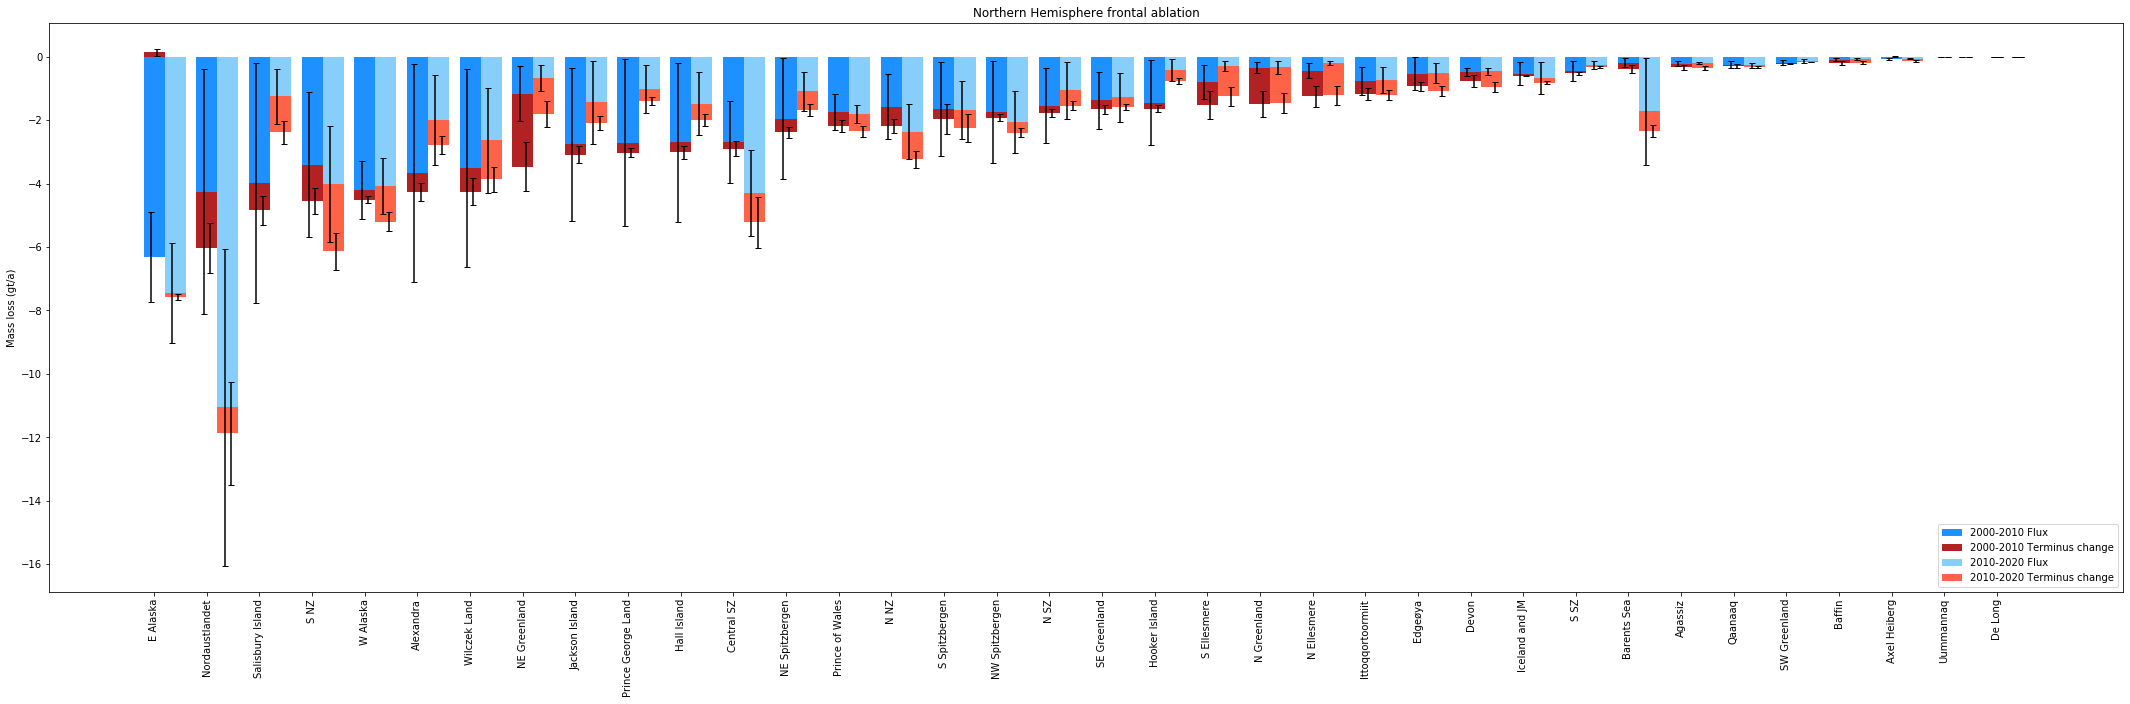

In [17]:
Arctic_subregion_fa_plotting = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean','2010_2018_mean_flux_gt','2010_2018_mean_err_gt','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt','terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean')  
Arctic_subregion_fa_plotting = Arctic_subregion_fa_plotting.reset_index()

Arctic_subregion_fa_plotting['bottom_2000_2010'] = -Arctic_subregion_fa_plotting['2000_2010_mean_flux_gt']
Arctic_subregion_fa_plotting['bottom_2010_2020'] = -Arctic_subregion_fa_plotting['2010_2018_mean_flux_gt']

for i in range(0,len(Arctic_subregion_fa_plotting)):
    if Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early'][i]>0:
        Arctic_subregion_fa_plotting['bottom_2000_2010'][i] = 0

for i in range(0,len(Arctic_subregion_fa_plotting)):
    if Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late'][i]>0:
        Arctic_subregion_fa_plotting['bottom_2010_2020'][i] = 0

fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
# plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical')
plt.ylabel('Mass loss (gt/a)')
plt.title('Northern Hemisphere frontal ablation')
# plt.bar(Arctic_subregion_fa_plotting['Subregion_name'],Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean'],yerr= Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'],capsize=5,ecolor='black')   

barWidth = .4
bar_position = np.arange(len(Arctic_subregion_fa_plotting))

plt.bar(bar_position,-Arctic_subregion_fa_plotting['2000_2010_mean_flux_gt'],label='2000-2010 Flux',width=barWidth,color='dodgerblue')
plt.bar(bar_position,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early'],bottom=Arctic_subregion_fa_plotting['bottom_2000_2010'],label='2000-2010 Terminus change',width=barWidth,color='firebrick')

plt.bar(bar_position+barWidth,-Arctic_subregion_fa_plotting['2010_2018_mean_flux_gt'],label='2010-2020 Flux',width=barWidth,color='lightskyblue')
plt.bar(bar_position+barWidth,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late'],bottom=Arctic_subregion_fa_plotting['bottom_2010_2020'],label='2010-2020 Terminus change',width=barWidth,color='tomato')

trans1 = Affine2D().translate(-0.06, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.06, 0.0) + ax.transData
cap_width=3

er_late_flux = ax.errorbar(bar_position,-Arctic_subregion_fa_plotting['2000_2010_mean_flux_gt'],yerr= Arctic_subregion_fa_plotting['2000_2010_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early']+Arctic_subregion_fa_plotting['bottom_2000_2010'],yerr= Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

er_late_flux = ax.errorbar(bar_position+barWidth,-Arctic_subregion_fa_plotting['2010_2018_mean_flux_gt'],yerr= Arctic_subregion_fa_plotting['2010_2018_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position+barWidth,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late']+Arctic_subregion_fa_plotting['bottom_2010_2020'],yerr= Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)


ax.set_xticks(bar_position)
ax.set_xticklabels(Arctic_subregion_fa_plotting['Subregion_name'].unique())

plt.legend(loc='lower right')
fig.subplots_adjust(hspace=0.06, wspace=0.01,top = .97, bottom = 0.18, right = .99, left = 0.03)

fig.savefig('figures/2000to2020_components_bars_subregions_v4.jpg',format='jpg',dpi=600)


<IPython.core.display.Javascript object>


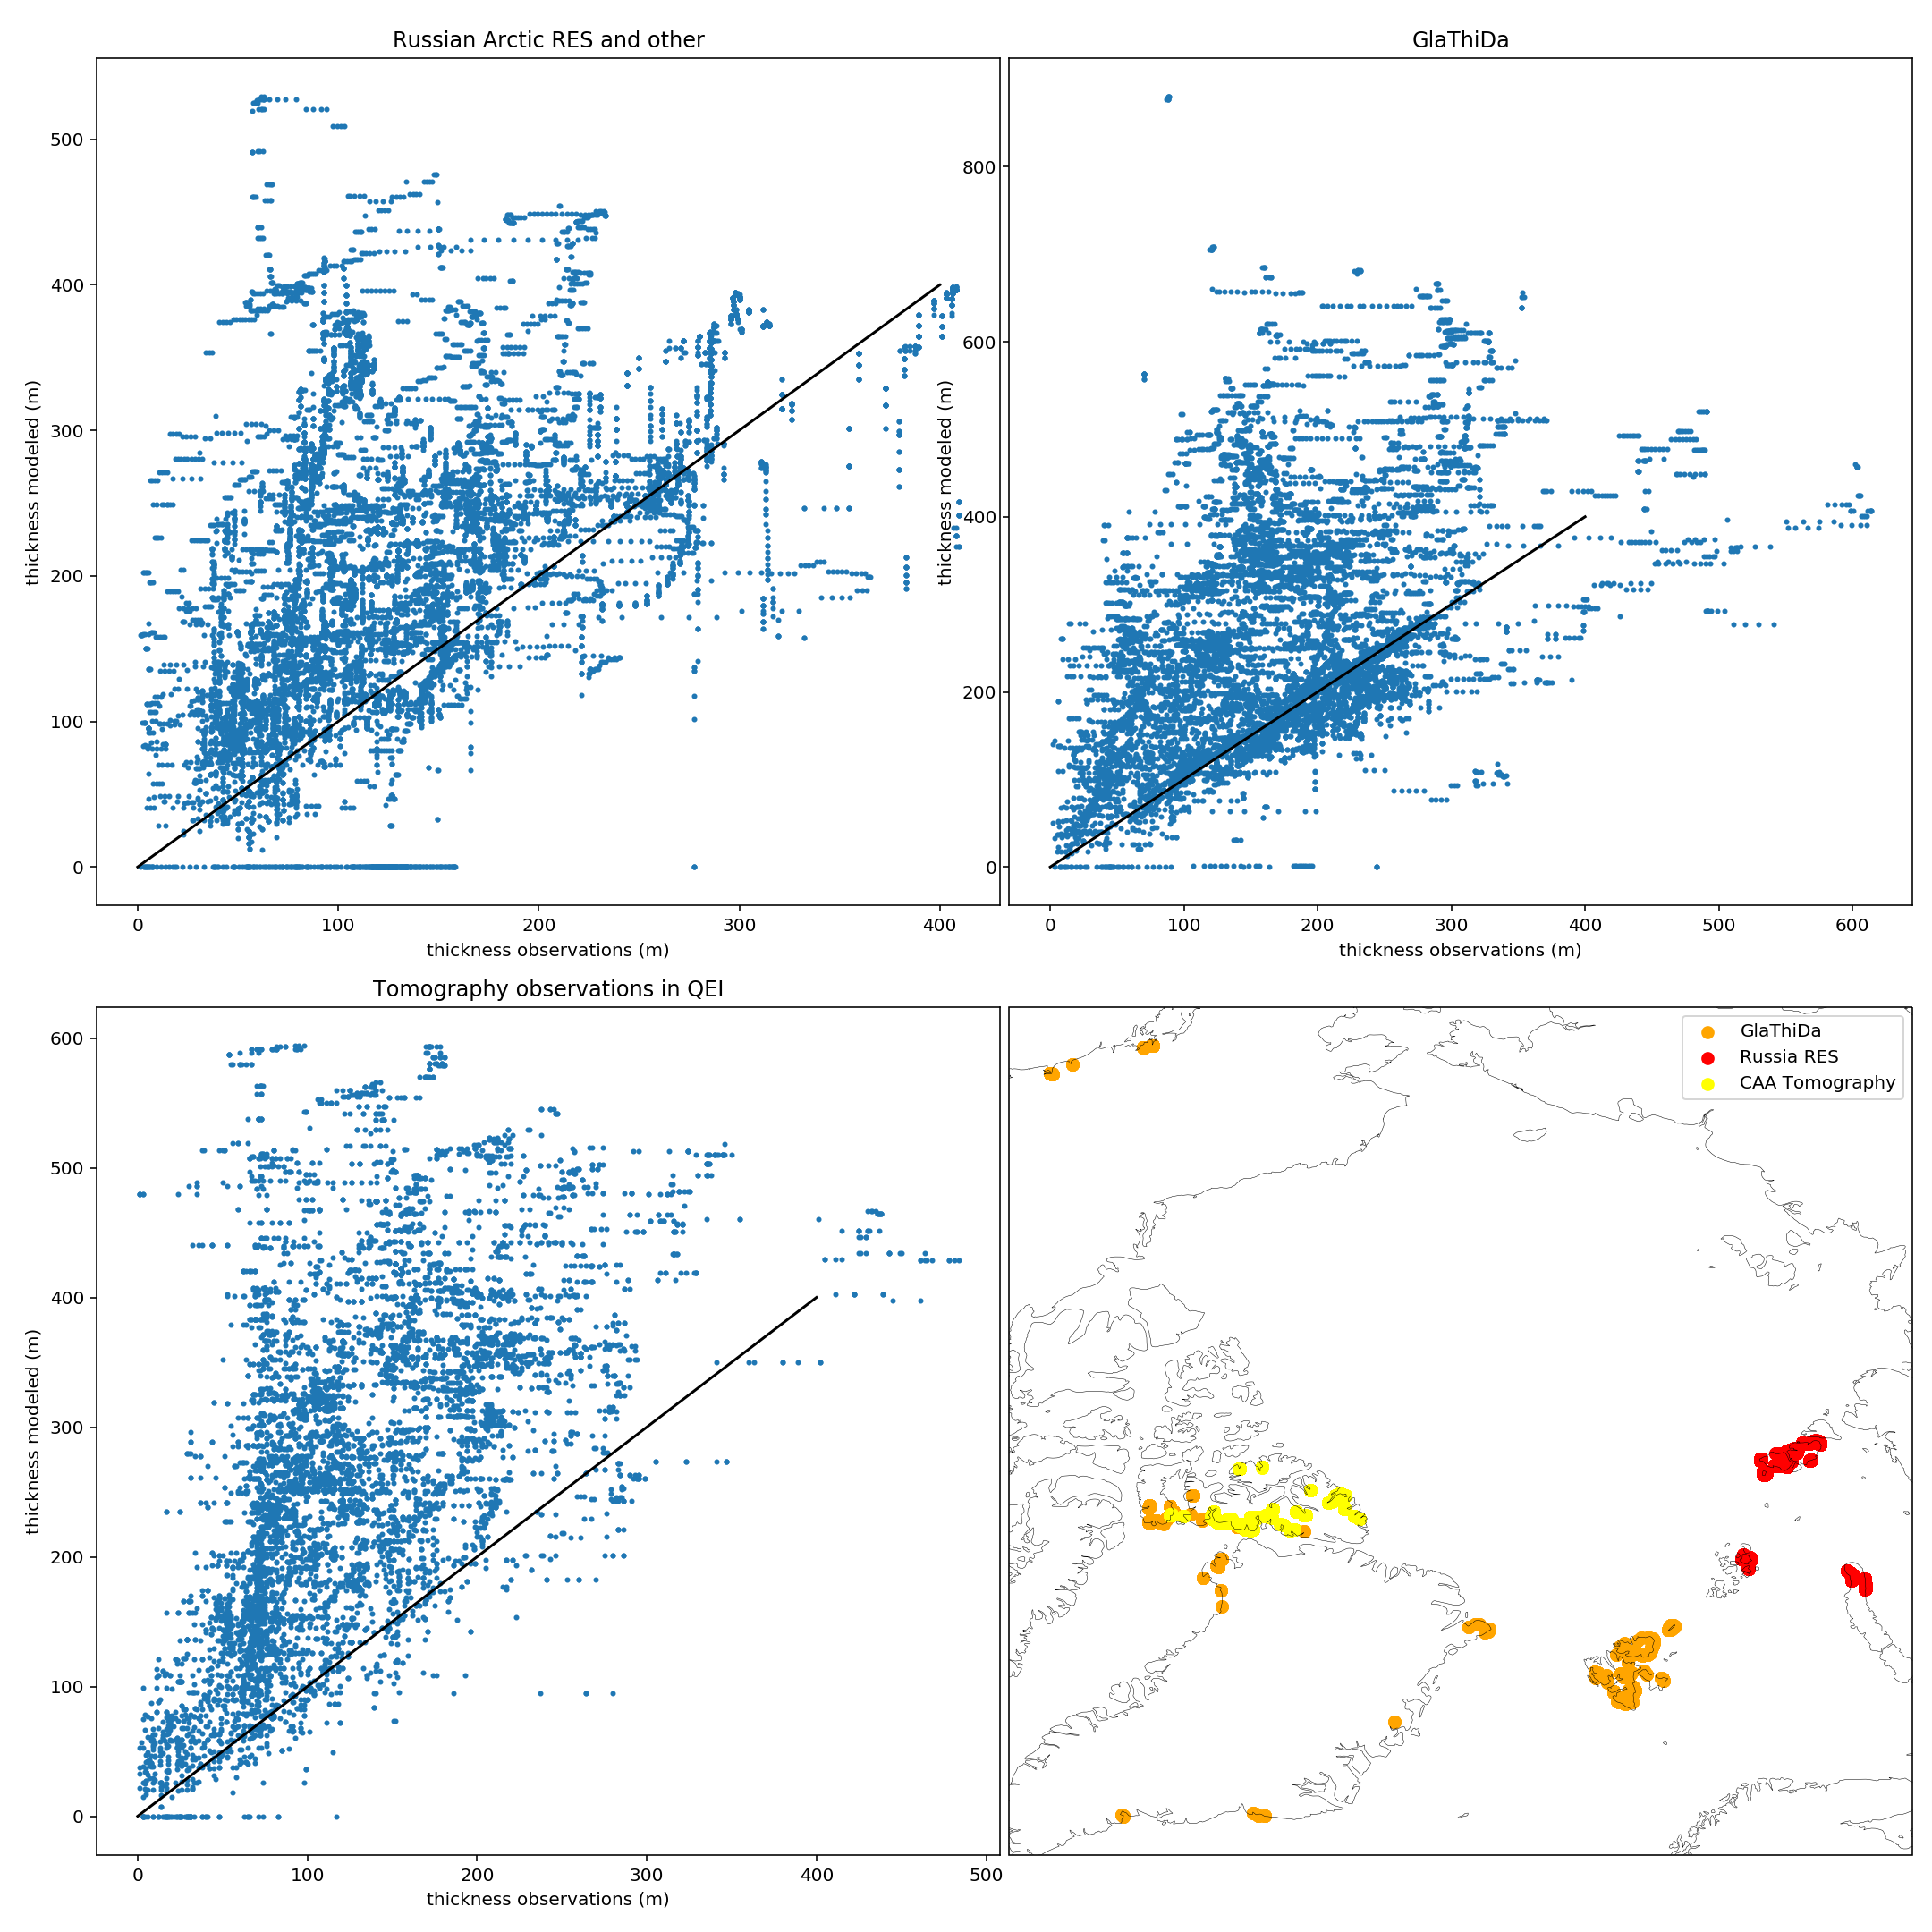

In [88]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot(2,2,1)
plt.scatter(Arctic_discharge['Russian_thickness'],Arctic_discharge['Farinotti_thickness'],s=4)
plt.plot([0,400],[0,400],c='black')
plt.title('Russian Arctic RES and other')
plt.xlabel('thickness observations (m)')
plt.ylabel('thickness modeled (m)')

ax2 = plt.subplot(2,2,2)
plt.scatter(Arctic_discharge['THICKNESS'],Arctic_discharge['Farinotti_thickness'],s=4)
plt.plot([0,400],[0,400],c='black')
plt.title('GlaThiDa')
plt.xlabel('thickness observations (m)')
plt.ylabel('thickness modeled (m)')

ax3 = plt.subplot(2,2,3)
plt.scatter(Arctic_discharge['tomo_thickness'],Arctic_discharge['Farinotti_thickness'],s=4)
plt.plot([0,400],[0,400],c='black')
plt.title('Tomography observations in QEI')
plt.xlabel('thickness observations (m)')
plt.ylabel('thickness modeled (m)')

ax4 = plt.subplot(2,2,4,projection=ccrs.Orthographic(central_longitude=0, central_latitude=90))

im_GlaThiDa = Arctic_discharge[Arctic_discharge['THICKNESS'].notna()].plot(
    ax=ax4,
    markersize=40, 
    color = 'orange',
#     column=Arctic_discharge_fluxes_with_area_export['region'],
    transform=ccrs.epsg('3995'),
)

im_Russia = Arctic_discharge[Arctic_discharge['Russian_thickness']>0].plot(
    ax=ax4,
    markersize=40, 
    color = 'red',
#     column=Arctic_discharge_fluxes_with_area_export['region'],
    transform=ccrs.epsg('3995'),
)

im_tomo = Arctic_discharge[Arctic_discharge['tomo_thickness']>0].plot(
    ax=ax4,
    markersize=40,
    color = 'yellow',
#     column=Arctic_discharge_fluxes_with_area_export['region'],
    transform=ccrs.epsg('3995'),
)

ax4.coastlines(linewidth=.25)
ax4.legend(['GlaThiDa','Russia RES','CAA Tomography'])

ax1.set_aspect('auto', adjustable='box')
ax2.set_aspect('auto', adjustable='box')
ax3.set_aspect('auto', adjustable='box')
ax4.set_aspect('auto', adjustable='box')

fig.subplots_adjust(hspace=0.12, wspace=0.01,top = .97, bottom = 0.04, right = .99, left = 0.05)


fig = plt.gcf()
fig.savefig('figures/thickness_bias.jpg',format='jpg',dpi=600)

In [18]:
Arctic_discharge_fluxes_with_area_export.head()
print('2000-2010 discharge (gt/a):',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'].sum()) 
print('2010-2020 discharge (gt/a):',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()) 
print('2000-2020 discharge (gt/a):',(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum())/2,'±',(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'].sum())/2)    
print()
print('2000-2010 terminus volume change (gt/a):',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early'].sum(),'±',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'].sum()) 
print('2010-2020 terminus volume change (gt/a):',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late'].sum(),'±',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'].sum()) 
print('2000-2020 terminus volume change (gt/a):',(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late'].sum()+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early'].sum())/2,'±',(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'].sum()+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'].sum())/2)    
print()
print('2000-2010 area loss (km2):',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_early'].sum(),'±',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_early_error'].sum()) 
print('2010-2020 area loss (km2):',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late'].sum(),'±',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late_error'].sum()) 
print()

for region in Arctic_discharge_fluxes_with_area_export['region'].unique():
    print(region)
    print('2000-2010 discharge (gt/a):',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'].sum()) 
    print('2010-2020 discharge (gt/a):',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()) 


2000-2010 discharge (gt/a): -75.63034583563416 ± 44.03366984074094
2010-2020 discharge (gt/a): -79.95228624583231 ± 29.867970289702594
2000-2020 discharge (gt/a): -77.79131604073324 ± 36.95082006522177

2000-2010 terminus volume change (gt/a): -15.816856041168366 ± 7.895029860334588
2010-2020 terminus volume change (gt/a): -20.79864878004742 ± 8.760945202782043
2000-2020 terminus volume change (gt/a): -18.307752410607893 ± 8.327987531558316

2000-2010 area loss (km2): -171.30039595642734 ± 41.16536617940389
2010-2020 area loss (km2): -167.88408370041245 ± 44.164585689643246

Alaska
2000-2010 discharge (gt/a): -10.686731834177872 ± 2.3093617400831516
2010-2020 discharge (gt/a): -12.773918465737133 ± 2.5728897033935536
Canada
2000-2010 discharge (gt/a): -6.3110765936046445 ± 2.3424158170506155
2010-2020 discharge (gt/a): -6.462068249160048 ± 1.4303193475097733
Greenland
2000-2010 discharge (gt/a): -8.314798532272334 ± 3.601868661294001
2010-2020 discharge (gt/a): -6.537958779933957 ± 2.5

In [19]:
#FA sum of Trinity-Wykeham
print(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710')|(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710_3')]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710')|(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710_3')]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())

-1.5986992889507092
0.18052462377946163


In [20]:
print('number of glaciers that are no longer marine-terminating (2010):', len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Middle_satellite_id']=='nan']))
print('number of glaciers that are no longer marine-terminating (2020):', len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Late_satellite_id']=='nan']))

number of glaciers that are no longer marine-terminating (2010): 47
number of glaciers that are no longer marine-terminating (2020): 112


In [21]:
# Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean').head()
n_glaciers = 40
print('Contribution of n glaciers',Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:n_glaciers].sum())
print('Error of n glaciers',Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'][0:n_glaciers].sum())
print('Contribution of all glaciers',Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Percent contribution of biggest',n_glaciers,':',(Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:n_glaciers].sum()/Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())*100)
print('minimum contribution is:', Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:n_glaciers].max())
print('this is ',n_glaciers/len(Arctic_discharge_fluxes_with_area_export)*100,'% of all glaciers')
Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean').head(10)

Contribution of n glaciers -40.45713405348857
Error of n glaciers 13.214242495369675
Contribution of all glaciers -79.9522862458323
Percent contribution of biggest 40 : 50.6015974691374
minimum contribution is: -0.4307469901228577
this is  2.73972602739726 % of all glaciers


RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
936     RGI60-07.00027  4.599561  8.308481                 0.100819   
13      RGI60-01.14443  3.578656  4.825904                 4.112021   
40      RGI60-01.10689  1.870511  2.594455                 2.169633   
1054    RGI60-07.01394  0.309684  1.975622                 0.061768   
14      RGI60-01.14683  1.606021  2.190409                 0.010952   
1116  RGI60-09.00515_2  0.254374  0.333680                 0.163005   
227   RGI60-03.01710_3  0.983382  1.227540                 0.702210   
938     RGI60-07.00029  0.382133  0.652858                 0.041470   
1111    RGI60-09.00920  0.944349  1.217498                 0.573756   
1052    RGI60-07.01554  0.342821  0.623558                 0.002263   

      2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
936                  0.767695                 4.480295   
13                   5.698686                 3.618520   
40                   3.083200                 2.126339   
1054                 0.347959                 0.043052   
14                   0.090498                 1.713340   
1116                 0.293442                 0.210338   
227                  0.979980                 0.975050   
938                  0.622491                 0.358896   
1111                 1.339018                 0.872613   
1052                 0.807991                 0.229214   

      2010_2018_mean_flux_max  \
936                 10.186475   
13                   4.984129   
40                   3.003481   
1054                 3.707590   
14                   2.418295   
1116                 0.409530   
227                  1.235466   
938                  0.767223   
1111                 1.364787   
1052                 0.793696   

                                                Name_x      Area  Zmin  Zmax  \
936                                  Austfonna basin 3  1226.367     2   767   
13                                     Hubbard Glacier  2834.493     0  5889   
40                                    Columbia Glacier   773.873     0  3693   
1054                                     Kvit?yj?kulen   645.801     0   408   
14                                      Yahtse Glacier  1019.101     4  3638   
1116     Karpinsky Ice Cap (October Revolution Island)   485.378     6   959   
227                              Wykeham Glacier South  3085.113     0  1751   
938                                          Austfonna   662.905    10   738   
1111  Academy of Sciences Ice Cap (Komsomolets Island)   829.413     0   778   
1052                                        Stonebreen   581.764    54   506   

      Zmed  Slope  Aspect    Lmax  Status  Connect  Form  TermType  Surging  \
936    501    9.0     147   56487       0        0     1         1        2   
13    1911   12.0     151  131321       0        0     0         1        9   
40    1309   11.0     184   53471       0        0     0         1        9   
1054   237   11.1       4   19098       0        0     0         1        0   
14    1447   13.0     179   69977       0        0     0         1        9   
1116   590    7.4     335   37061       0        0     1         5        9   
227    991    7.1     102   81426       0        0     0         1        3   
938    500   10.8     131   35861       0        0     1         1        0   
1111   542   14.2     104   31780       0        0     1         1        9   
1052   237    3.6      57   34056       0        0     0         0        3   

      Linkages  Farinotti_thickness_min    region  Farinotti_thickness_max  \
936          0               162.834854  Svalbard               302.036041   
13           9                 0.000000    Alaska               520.175415   
40           9                 0.000000    Alaska               693.822693   
1054         9               133.475998  Svalbard               442.063568   
14           9                 0.000000    Alaska               214.171204   
1116         

In [22]:
glacier_contrib_threshold = -0.02

print('Contribution of glaciers great than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Contribution all glaciers:',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('this is:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'%')
print('this is: ',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]),'glaciers out of ',len(Arctic_discharge_fluxes_with_area_export))

biggest_contributors = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]

Contribution of glaciers great than threshold: -75.89274962681614
Contribution all glaciers: -79.95228624583231
this is: 94.9225509242673 %
this is:  425 glaciers out of  1460


Alaska
Total fa: -12.773918465737133 ± 2.5728897033935545
number of glaciers: 2
total number of glaciers:  42
percentage of glaciers: 4.761904761904762
covers x% of frontal ablation:  58.095738160563215


/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


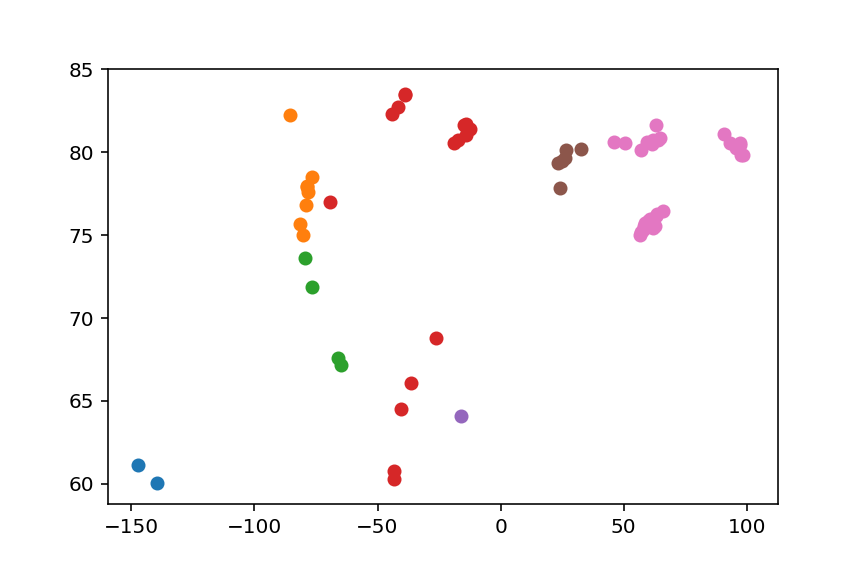

regional mean FA: -0.3041409158508841 ± 0.06125927865222747

QEI
Total fa: -6.268000505491012 ± 1.3760132918641765
number of glaciers: 8
total number of glaciers:  246
percentage of glaciers: 3.2520325203252036
covers x% of frontal ablation:  51.5083780920447
regional mean FA: -0.02547967685158949 ± 0.005593549966927546

BBI
Total fa: -0.18724815635492398 ± 0.05512460726858042
number of glaciers: 4
total number of glaciers:  86
percentage of glaciers: 4.651162790697675
covers x% of frontal ablation:  55.76760934723889
regional mean FA: -0.0021773041436619063 ± 0.0006409838054486099

Greenland
Total fa: -6.537938276402702 ± 2.5648290813103642
number of glaciers: 16
total number of glaciers:  514
percentage of glaciers: 3.11284046692607
covers x% of frontal ablation:  51.3047026019086
regional mean FA: -0.012719724273157007 ± 0.004989939846907325

Iceland and Jan Mayen
Total fa: -0.8359758111586403 ± 0.5185415209462964
number of glaciers: 1
total number of glaciers:  7
percentage of glac

In [414]:
fa_russian_grouped = Arctic_discharge_fluxes_with_area_export
fa_russian_grouped['Region_name'][(fa_russian_grouped['Region_name']=='SZ')|(fa_russian_grouped['Region_name']=='FJL')|(fa_russian_grouped['Region_name']=='NZ')] = 'Russia'

list_of_regions = fa_russian_grouped.groupby('Region_name').mean()[['lon']].sort_values('lon').reset_index()['Region_name'].unique()
# fa_russian_grouped.drop('level_0',inplace=True)

for region_name in list_of_regions:
    print(region_name)
    
    regional_fa = fa_russian_grouped[(fa_russian_grouped['Region_name']==region_name)].reset_index(drop=True).sort_values(by='Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=True)
    print('Total fa:',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean']),'±',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']))
    for i in range(0,len(regional_fa)):
        if sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])>0.5:
            print('number of glaciers:',i+1)
            print('total number of glaciers: ',len(regional_fa))
            print('percentage of glaciers:',(i+1)/len(regional_fa)*100 )
            print('covers x% of frontal ablation: ', sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])*100)
            plt.scatter(regional_fa['lon'][0:i+1],regional_fa['lat'][0:i+1])
            print('regional mean FA:', np.mean(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean']),'±',np.mean(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']))
            print()
            break
    

In [400]:
fa_greenland = Arctic_discharge_fluxes_with_area_export#[(Arctic_discharge_fluxes_with_area_export['Region_name']=='Greenland')]

list_of_subregions = fa_greenland.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()

for subregion_name in list_of_subregions:
    print(subregion_name)
    
    regional_fa = fa_greenland[(fa_greenland['Subregion_name']==subregion_name)].reset_index(drop=True).sort_values(by='Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=True)
    print('Total fa:',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean']),'±',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']))
    for i in range(0,len(regional_fa)):
        if sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])>0.9:
            print('number of glaciers:',i+1)
            print('total number of glaciers: ',len(regional_fa))
            print('percentage of glaciers:',(i+1)/len(regional_fa)*100 )
            print('covers x% of frontal ablation: ', sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])*100)
            print()
            break

W Alaska
Total fa: -5.197634513802439 ± 0.9703761810060441
number of glaciers: 5
total number of glaciers:  22
percentage of glaciers: 22.727272727272727
covers x% of frontal ablation:  90.66461778179594

E Alaska
Total fa: -7.576283951934694 ± 1.6025135223875095
number of glaciers: 4
total number of glaciers:  20
percentage of glaciers: 20.0
covers x% of frontal ablation:  92.09164637670072

Axel Heiberg
Total fa: -0.13087324561298783 ± 0.033347305523059576
number of glaciers: 2
total number of glaciers:  2
percentage of glaciers: 100.0
covers x% of frontal ablation:  100.0

Devon
Total fa: -0.9511972154560236 ± 0.19763451722817746
number of glaciers: 13
total number of glaciers:  45
percentage of glaciers: 28.888888888888886
covers x% of frontal ablation:  91.00081426572186

N Ellesmere
Total fa: -1.2141904274583497 ± 0.3430825123476602
number of glaciers: 14
total number of glaciers:  47
percentage of glaciers: 29.78723404255319
covers x% of frontal ablation:  90.97458230693545

S E

In [402]:
#contribution of Devon, Sydkap, Manson, and POW 
(2.357157+1.252840+0.95119)/6.268000

0.7276941608168476

In [411]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Region_name']=='FJL')]

RGIId      flux_min  flux_max  2000_2010_mean_flux_min  \
1055    RGI60-09.01069  0.000000e+00  0.000000                 0.000000   
1140    RGI60-09.00583  0.000000e+00  0.000013                 0.000000   
1141  RGI60-09.00583_2  0.000000e+00  0.000046                 0.000000   
1142  RGI60-09.00583_3  3.123467e-07  0.000026                 0.000000   
1143    RGI60-09.00585  1.017397e-02  0.023784                 0.002993   
...                ...           ...       ...                      ...   
1455    RGI60-09.00860  4.067348e-02  0.131810                 0.048982   
1456    RGI60-09.00861  2.179980e-05  0.000349                 0.000000   
1457  RGI60-09.00861_2  2.516160e-04  0.001243                 0.000000   
1458    RGI60-09.01065  2.845820e-02  0.207254                 0.083521   
1459    RGI60-09.01068  1.317673e-02  0.054749                 0.058027   

      2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
1055                 0.004567             0.000000e+00   
1140                 0.000966             6.443333e-07   
1141                 0.001183             2.295012e-06   
1142                 0.001013             7.935809e-07   
1143                 0.114309             8.754566e-03   
...                       ...                      ...   
1455                 0.398232             3.628029e-02   
1456                 0.017385             1.117955e-05   
1457                 0.017943             1.350537e-06   
1458                 0.716251             1.089336e-02   
1459                 0.228438             7.635002e-03   

      2010_2018_mean_flux_max                              Name_x     Area  \
1055                 0.004567  Victoria Ice Cap (Victoria Island)    6.101   
1140                 0.000149                      (Bliss Island)    3.401   
1141                 0.000174                      (Bliss Island)    3.401   
1142                 0.000158                      (Bliss Island)    3.401   
1143                 0.035561     Jackson Ice Cap (Hooker Island)   24.727   
...                       ...                                 ...      ...   
1455                 0.342555                    (Rudolph Island)  127.349   
1456                 0.001473                    (Rudolph Island)   10.919   
1457                 0.005377                    (Rudolph Island)   10.919   
1458                 0.606616   Vostok-4 Ice Cap (Eva-Liv Island)   36.825   
1459                 0.167239                    (Rudolph Island)   76.427   

      Zmin  Zmax  Zmed  Slope  Aspect  Lmax  Status  Connect  Form  TermType  \
1055     0   108    64   10.6     300  1201       0        0     0         1   
1140     0   302   184   15.6      14  1332       0        0     0         1   
1141     0   302   184   15.6      14  1332       0        0     0         1   
1142     0   302   184   15.6      14  1332       0        0     0         1   
1143    27   573   247   10.9     210  6874       0        0     1         1   
...    ...   ...   ...    ...     ...   ...     ...      ...   ...       ...   
1455     0   456   179    7.3     131  9943       0        0     1         1   
1456     0   401   232   11.6     155  4042       0        0     0         1   
1457     0   401   232   11.6     155  4042       0        0     0         1   
1458     0   335   182   22.6      37  5956       0        0     0         1   
1459     0   446   207    7.8     355  7501       0        0     1         1   

      Surging  Linkages  Farinotti_thickness_min    region  \
1055        9         9               120.000000  Svalbard   
1140        9         9                 0.000000    Russia   
1141        9         9                 0.000000    Russia   
1142        9         9                 0.000000    Russia   
1143        9         9                36.050133    Russia   
...       ...       ...                      ...       ...   
1455        9         9                77.531181    Russia   
1456        9         9  

In [170]:
#contribution of surge type glaciers according to RGI
print('FA from 2010-2020 of glaciers that are observed or probably surgers in the Arctic:')
surge_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Surging']==3)|(Arctic_discharge_fluxes_with_area_export['Surging']==2)]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()
print(surge_FA)
print(surge_FA/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'% of all glacier FA')

print('FA from 2000-2010 of glaciers that are observed or probably surgers in the Arctic:')
surge_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Surging']==3)|(Arctic_discharge_fluxes_with_area_export['Surging']==2)]['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum()
print(surge_FA)
print(surge_FA/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum()*100,'% of all glacier FA')


Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Surging']==3)].sort_values('Frontal_ablation_2000_to_2010_gt_per_yr_mean',ascending=True).head(10)

FA from 2010-2020 of glaciers that are observed or probably surgers in the Arctic:
-17.820298442684123
22.65058565147371 % of all glacier FA
FA from 2000-2010 of glaciers that are observed or probably surgers in the Arctic:
-12.122824003122595
16.019170713275805 % of all glacier FA


RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
157   RGI60-03.01710_3  0.983382  1.227540                 0.702210   
890     RGI60-07.00025  0.039147  0.089301                 0.000000   
1043    RGI60-07.01554  0.342822  0.623555                 0.002263   
1065    RGI60-09.00077  0.381080  0.758754                 0.136349   
888     RGI60-06.00483  0.234313  0.536090                 0.199034   
1036    RGI60-07.01506  0.013594  0.029753                 0.006855   
94      RGI60-03.01517  0.005094  0.010985                 0.020555   
155     RGI60-03.01710  0.359237  0.466346                 0.198129   
993     RGI60-07.00892  0.096446  0.170398                 0.000507   
1046    RGI60-07.01560  0.030245  0.065916                 0.005485   

      2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
157                  0.979980                 0.975050   
890                  1.034828                 0.016285   
1043                 0.807991                 0.229214   
1065                 0.975297                 0.369489   
888                  0.985738                 0.168909   
1036                 0.230931                 0.017686   
94                   0.069042                 0.005997   
155                  0.324231                 0.321612   
993                  0.630725                 0.084315   
1046                 0.624008                 0.021492   

      2010_2018_mean_flux_max                                       Name_x  \
157                  1.235466                        Wykeham Glacier South   
890                  0.373162                               Braasvellbreen   
1043                 0.793696                                   Stonebreen   
1065                 0.871374  Nordenskiold and North Island Novaya Zemlya   
888                  1.279135                          Breidamerkurjoekull   
1036                 0.109989                                   Negribreen   
94                   0.018467                                       Mittie   
155                  0.421823                        Wykeham Glacier South   
993                  0.219605                                 Sonklarbreen   
1046                 0.147891                             Hochstetterbreen   

          Area  Zmin  Zmax  Zmed  Slope  Aspect   Lmax  Status  Connect  Form  \
157   3085.113     0  1751   991    7.1     102  81426       0        0     0   
890   1095.853    11   666   281    4.4     179  50954       0        0     1   
1043   581.764    54   506   237    3.6      57  34056       0        0     0   
1065   757.677    87  1121   661   14.4     278  40813       0        0     0   
888   1067.745    97  1878  1334    9.0     135  53427       0        0     1   
1036   963.857    52  1153   513    5.0     132  50824       0        0     0   
94    1741.310     0  1348   528    6.4      25  56818       0        0     0   
155   3085.113     0  1751   991    7.1     102  81426       0        0     0   
993    222.606    43   534   318    4.6     132  19433       0        0     1   
1046   594.902    41   630   357    3.9      61  40919       0        0     1   

      TermType  Surging  Linkages  Farinotti_thickness_min    region  \
157          1        3         9                 0.000000    Canada   
890          1        3         0               114.077461  Svalbard   
1043         0        3         0                 0.000000  Svalbard   
1065         1        3         9                 0.000000    Russia   
888          0        3         9               101.877899   Iceland   
1036         0        3         0                66.107460  Svalbard   
94           1        3         9                42.328487    Canada   
155          1        3         9                37.159744    Canada   
993          1        3         0                 0.181058  Svalbard   
1046         0        3         0                 0.000000  Svalbard   

      Farinotti_thickness_max  do_we_have_an_observa

In [83]:
#discharge plots with error symbols and only 6 regions
%matplotlib notebook

for i in [0,1]:
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean']
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'jet_r'
    counter = 1
    marker_size_def = 15 #change marker size
    vmin_fill = -1.5
    vmax_fill = -0.02
    
    #percent error
    per_err = (Arctic_discharge_fluxes_with_area_export[dataset_err[i]])/np.abs(Arctic_discharge_fluxes_with_area_export[dataset[i]])*100
    big_flux = Arctic_discharge_fluxes_with_area_export[dataset[i]]<vmax_fill
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face',facecolor='gainsboro')
    
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:

        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()


        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.set_facecolor('lightskyblue')
        ax1.add_feature(land_50m,zorder=0)
#         rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
#         Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
        
        im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=vmax_fill)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='purple',
            transform=ccrs.epsg('3995'),
            zorder=2
        )
        
        num=[0,-.05,-0.1,-0.15,-0.2,-0.25,-0.3,-0.4,-0.8,-1.2,-1.8,-2.5,-5]
        for n in range(0,12):
            plotting_group_flux=(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=num[n])&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>num[n+1])
            im_low = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='o',
                cmap = color_map,
                zorder=4
            )

            im_low = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                zorder=4
            )

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+10000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1

    cax = fig.add_axes([0.905, 0.01, 0.03, 0.98]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Frontal ablation gt $a^-1$')
    plt.tight_layout()
    
    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)
    if dataset[i] == 'Frontal_ablation_2000_to_2010_gt_per_yr_mean':
#         fig.suptitle('Arctic Frontal Ablation 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_Discharge_err_sym_v18.jpg',format='jpg',dpi=600)
    if dataset[i] == 'Frontal_ablation_2010_to_2020_gt_per_yr_mean':
#         fig.suptitle('Arctic Frontal Ablation 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_Discharge_err_sym_v18.jpg',format='jpg',dpi=600)

<IPython.core.display.Javascript object>

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa8e04452f0>
Traceback (most recent call last):
  File "/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/shapely/geometry/base.py", line 241, in __del__
    def __del__(self):
KeyboardInterrupt


KeyboardInterrupt: 

In [145]:
#calculate contribution of glaciers to terminus changes
thresh = 0.01
print(len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late']))
print(sum(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late']))     
print(sum(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']))

thresh_num = len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late'])
total_num = len(Arctic_discharge_fluxes_with_area_export)

thresh_sum = sum(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late'])
total_sum = sum(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late'])


print('total fraction of glaciers',thresh_num/total_num*100)
print('total fraction of terminus loss',thresh_sum/total_sum*100)

1133
-1.6301481762602925
-19.521142590176655
total fraction of glaciers 77.6027397260274
total fraction of terminus loss 8.350680134269439


<IPython.core.display.Javascript object>


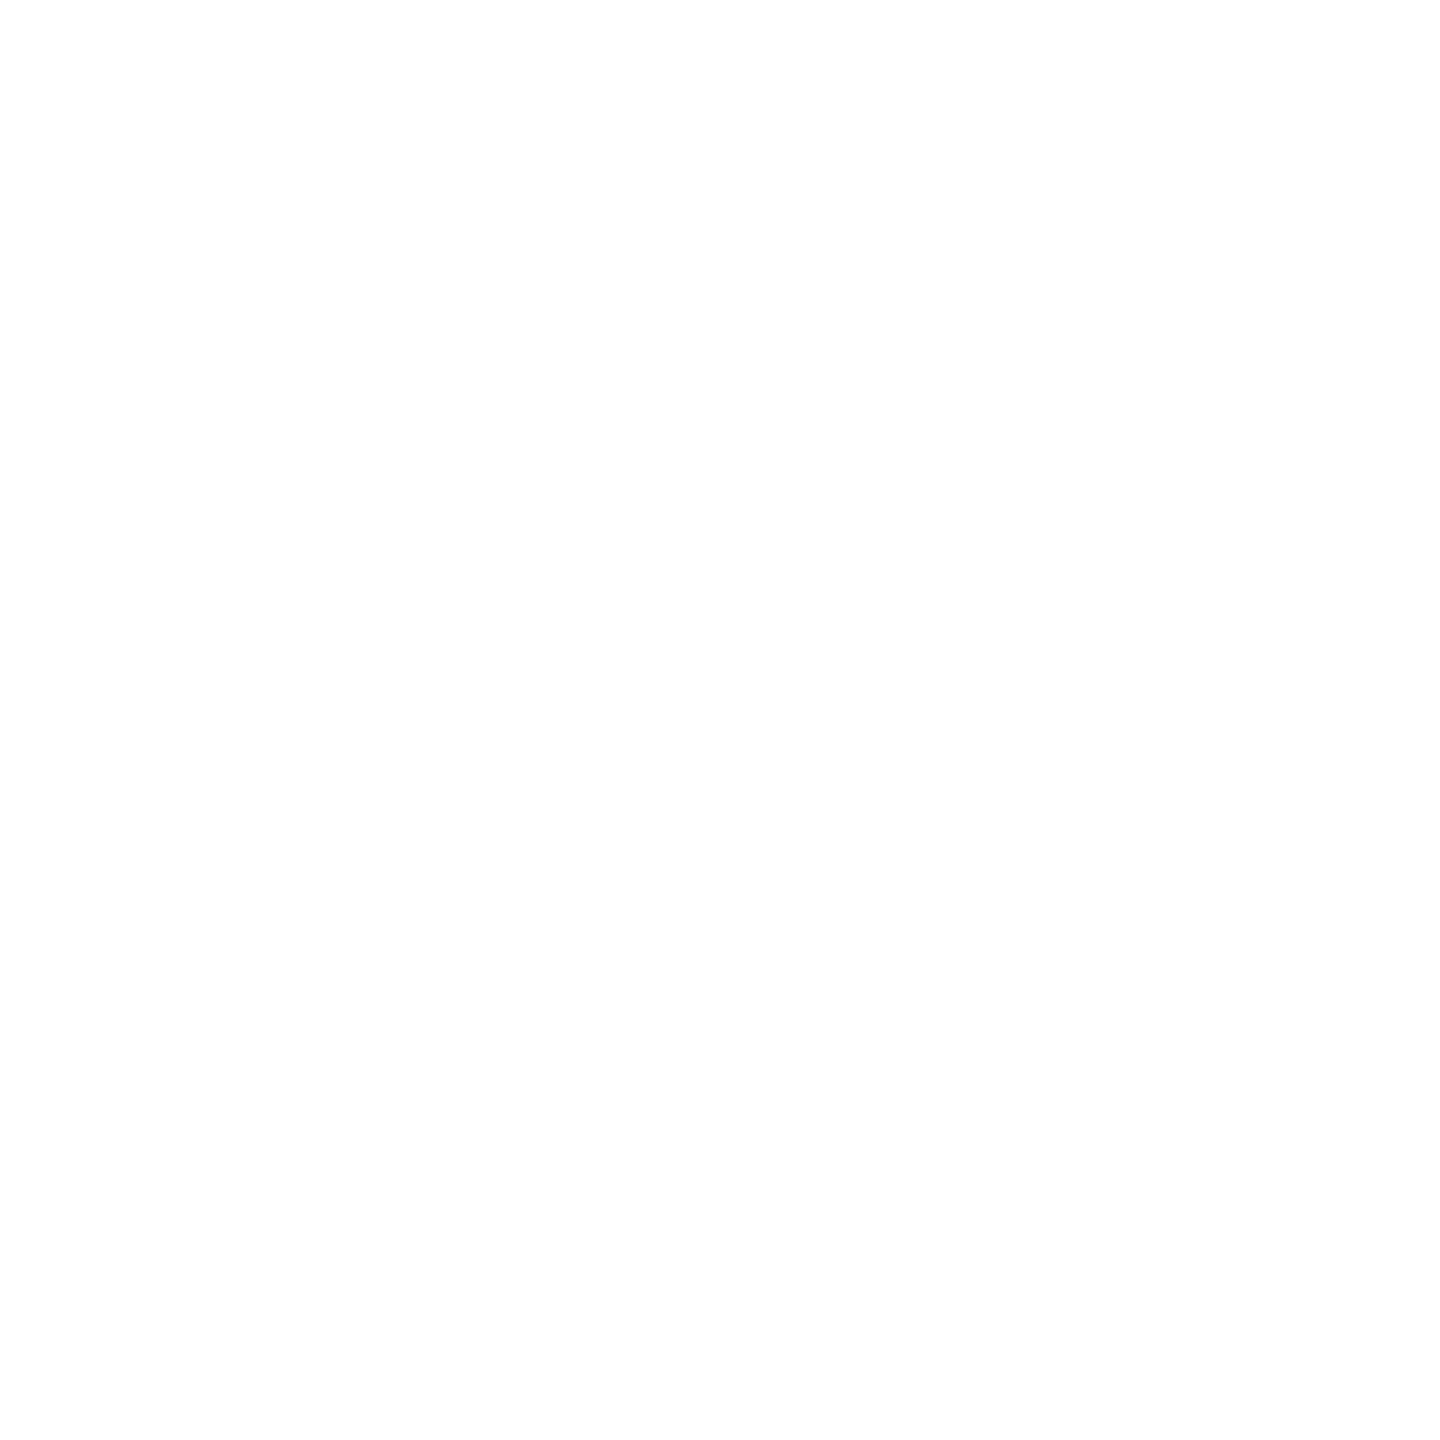

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:86: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


<IPython.core.display.Javascript object>


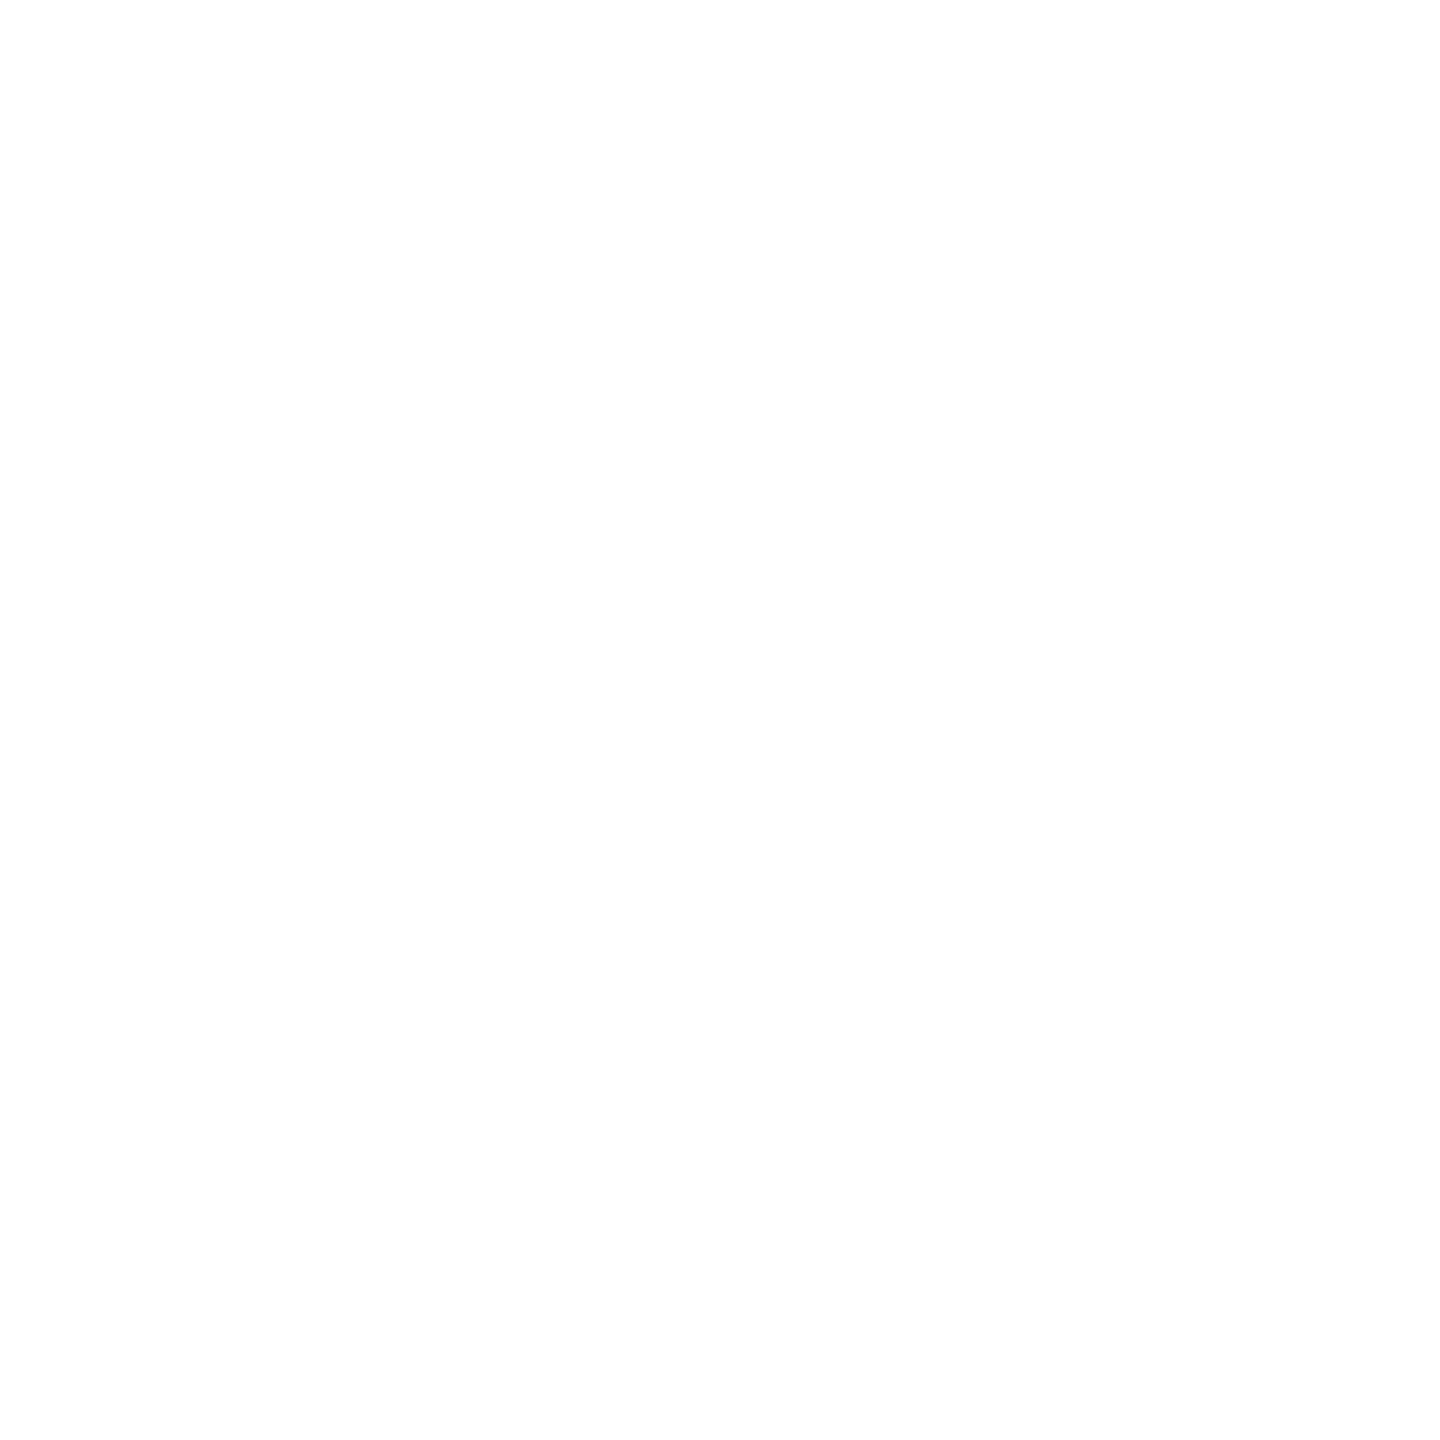

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:86: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


In [24]:
#Terminus volume change plots
%matplotlib notebook

for i in [0,1]:
    dataset = ['terminus_gt_change_per_year_early','terminus_gt_change_per_year_late']
    dataset_err = ['terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late_area_error']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 30 #change marker size
    vmin_fill = -0.5
    vmax_fill = 0.5
    dont_display=0.01
    
    #percent error
#     per_err = (Arctic_discharge_fluxes_with_area_export[dataset_err[i]])/np.abs(Arctic_discharge_fluxes_with_area_export[dataset[i]])*100
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='gainsboro')
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:
        
        data_for_purple_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<dont_display)&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>-dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
        data_for_plotting_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<=-dont_display)|(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
    
        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()


        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_50m,zorder=0)
        im = Arctic_discharge_fluxes_with_area_export[data_for_purple_mask].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='gray',
            transform=ccrs.epsg('3995'),
        )

        im_low = Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask].plot(
            ax=ax1,
            markersize=marker_size_def, 
            column=Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask][dataset[i]],
            vmin=vmin_fill, 
            vmax=vmax_fill,
            transform=ccrs.epsg('3995'),
            marker='o',
            cmap = color_map,
            zorder=2
        )

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1

        
    cax = fig.add_axes([0.905, 0.01, 0.03, 0.98]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Terminus volume change gt $a^-1$')
    plt.tight_layout()

    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)

    if dataset[i] == 'terminus_gt_change_per_year_early':
#         fig.suptitle('Terminus volume change 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_term_vol_change_v12.jpg',format='jpg',dpi=600)
    if dataset[i] == 'terminus_gt_change_per_year_late':
#         fig.suptitle('Terminus volume change 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_term_vol_change_v12.jpg',format='jpg',dpi=600)

<IPython.core.display.Javascript object>


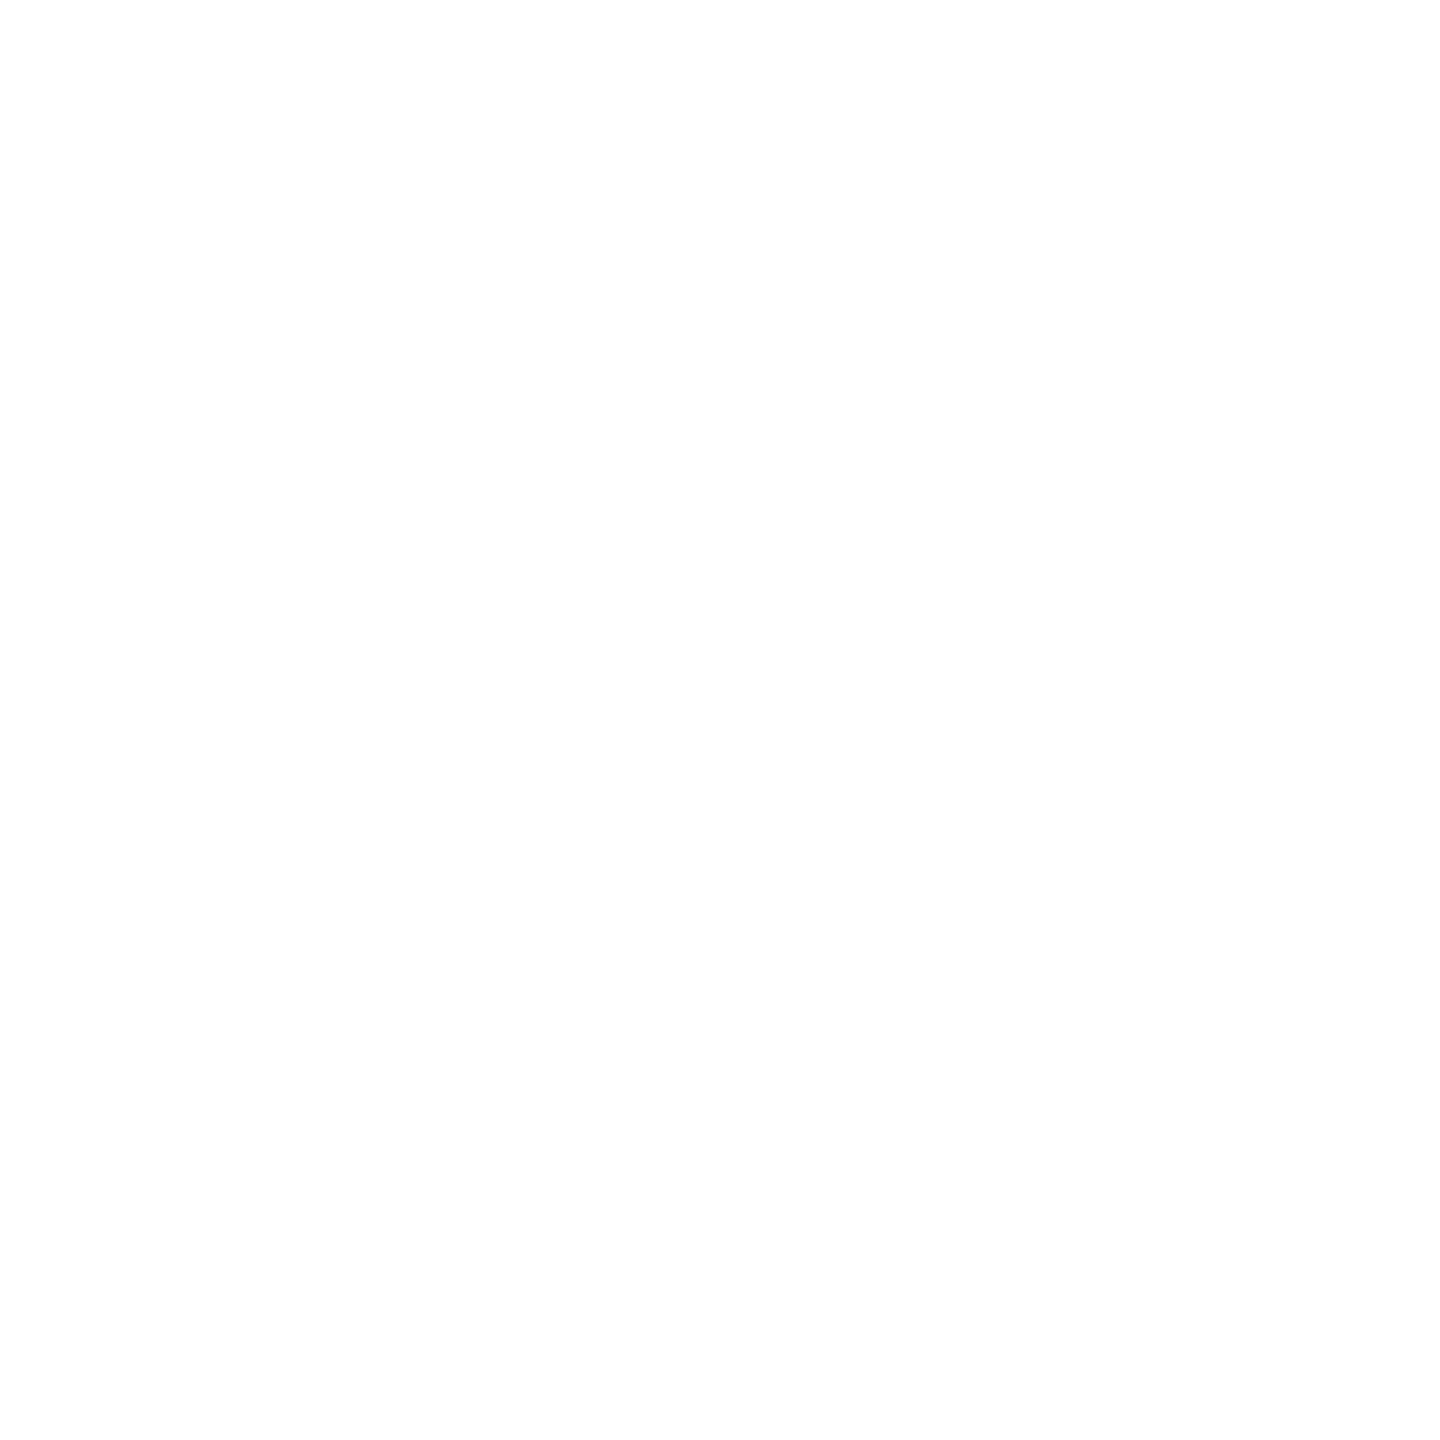

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

<IPython.core.display.Javascript object>


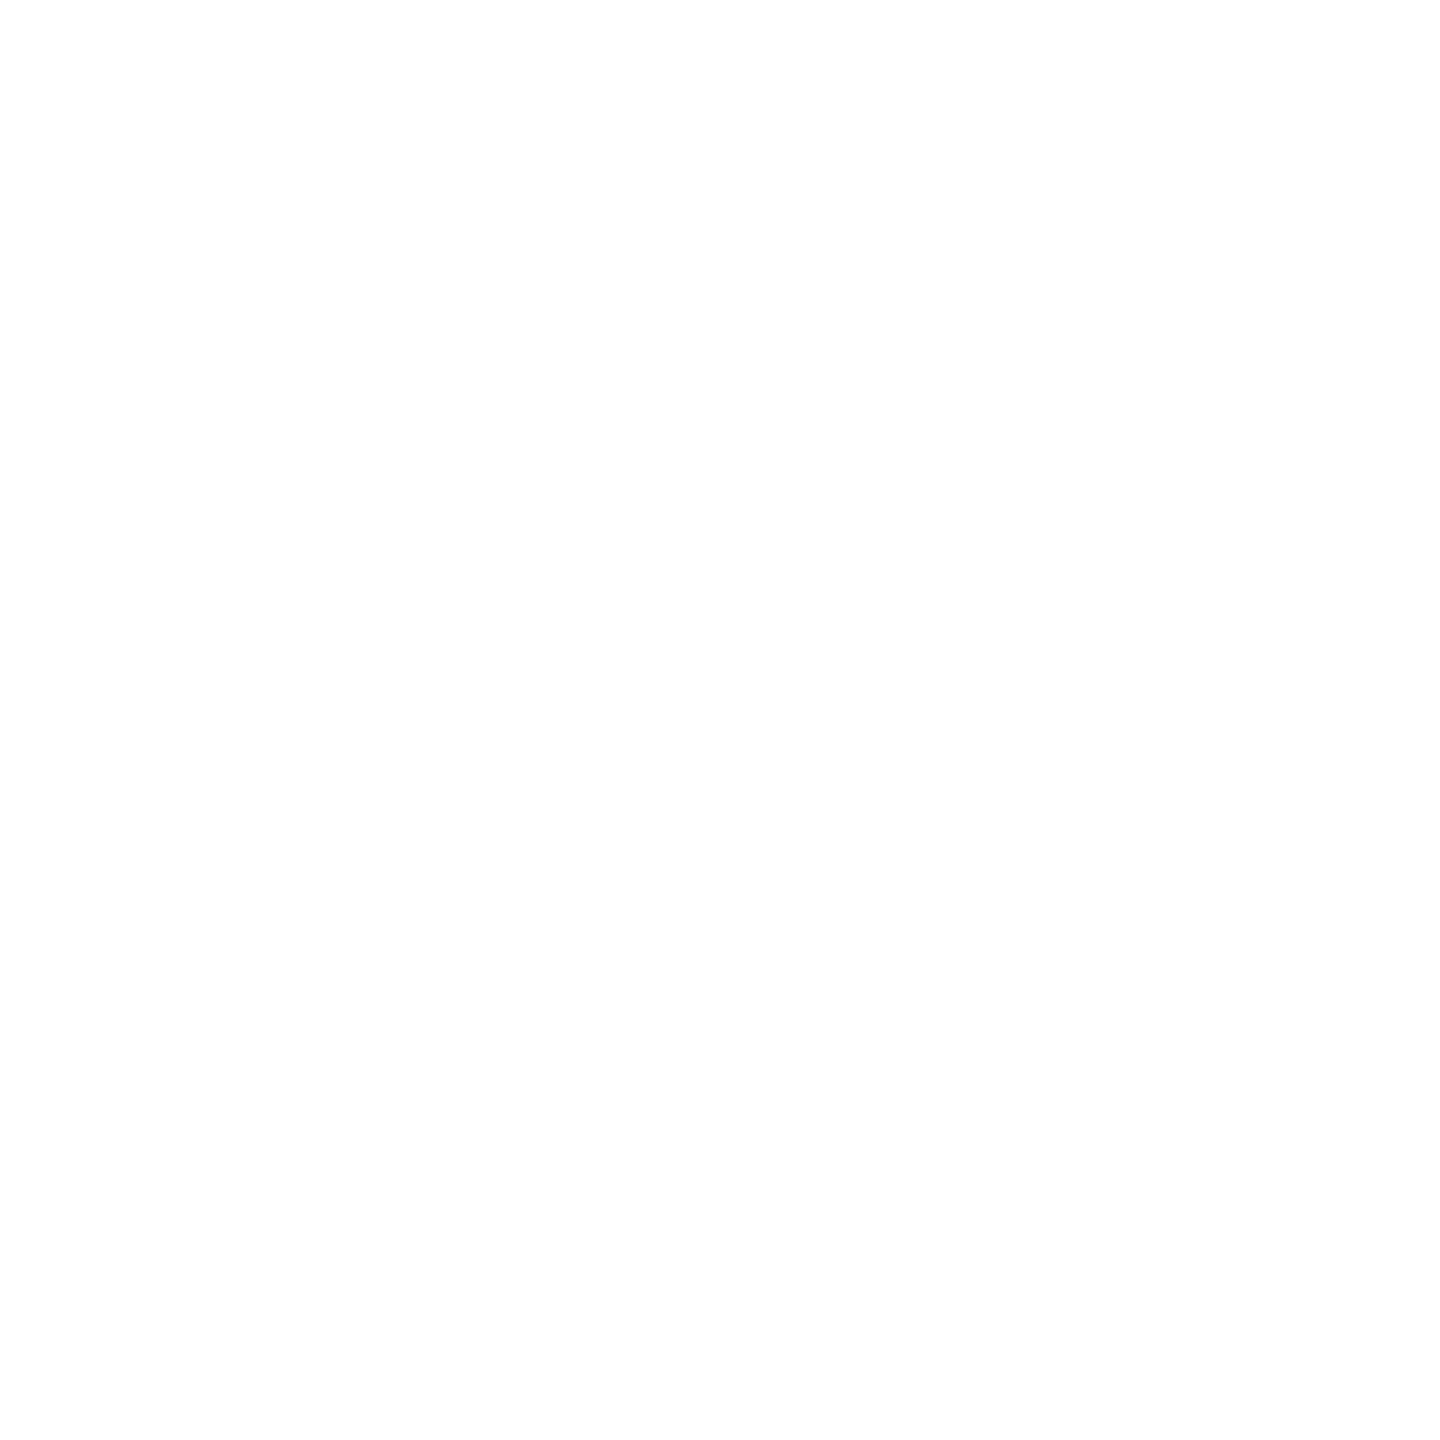

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

In [25]:
#Terminus area change plots
%matplotlib notebook

for i in [0,1]:
    dataset = ['net_area_change_per_year_early','net_area_change_per_year_late']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 30 #change marker size
    vmin_fill = -3
    vmax_fill = 3
    dont_display=0.001
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='gainsboro')
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:
        
        data_for_purple_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<dont_display)&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>-dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
        data_for_plotting_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<=-dont_display)|(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
    
        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()


        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_50m,zorder=0)
        im = Arctic_discharge_fluxes_with_area_export[data_for_purple_mask].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='gray',
            transform=ccrs.epsg('3995'),
        )

        im_low = Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask].plot(
            ax=ax1,
            markersize=marker_size_def, 
            column=Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask][dataset[i]],
            vmin=vmin_fill, 
            vmax=vmax_fill,
            transform=ccrs.epsg('3995'),
            marker='o',
            cmap = color_map,
            zorder=2
        )

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1

        
    cax = fig.add_axes([0.9, 0.01, 0.03, 0.98]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Terminus area change km $a^-1$')
    plt.tight_layout()

    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .895, left = 0.005)
    
    if dataset[i] == 'net_area_change_per_year_early':
#         fig.suptitle('Terminus volume change 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_term_area_change_v12.jpg',format='jpg',dpi=600)
    if dataset[i] == 'net_area_change_per_year_late':
#         fig.suptitle('Terminus volume change 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_term_area_change_v12.jpg',format='jpg',dpi=600)

In [148]:
Arctic_discharge_fluxes_with_area_export.sort_values('net_area_change_per_year_total').tail(10)

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
24    RGI60-01.14443  3.578656  4.825904                 4.112021   
47    RGI60-03.00191  0.005966  0.007621                 0.001494   
1406  RGI60-09.00917  0.241174  0.350700                 0.145578   
25    RGI60-01.14683  1.606021  2.190409                 0.010952   
63    RGI60-03.00994  0.042061  0.061538                 0.053834   
943   RGI60-07.00465  0.211888  0.347167                 0.002400   
891   RGI60-07.00026  0.448048  0.775648                 0.000318   
925   RGI60-07.00298  0.153911  0.259338                 0.038338   
892   RGI60-07.00027  4.599561  8.308481                 0.100819   
1419  RGI60-09.00971  0.908020  1.213032                 0.038462   

      2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
24                   5.698686                 3.618520   
47                   0.026246                 0.007010   
1406                 0.433323                 0.222414   
25                   0.090498                 1.713340   
63                   0.085551                 0.049700   
943                  0.227949                 0.093110   
891                  0.674497                 0.399124   
925                  0.530682                 0.241883   
892                  0.767695                 4.480295   
1419                 0.148996                 0.830039   

      2010_2018_mean_flux_max  \
24                   4.984129   
47                   0.019230   
1406                 0.408816   
25                   2.418295   
63                   0.073311   
943                  0.535969   
891                  1.298306   
925                  0.477443   
892                 10.186475   
1419                 1.277000   

                                                 Name_x      Area  Zmin  Zmax  \
24                                      Hubbard Glacier  2834.493     0  5889   
47                                              Parrish   770.215    37  2069   
1406   Academy of Sciences Ice Cap (Komsomolets Island)   412.902     0   778   
25                                       Yahtse Glacier  1019.101     4  3638   
63                                      Good Friday Bay   731.002    68  1652   
943                                     Wahlenbergbreen   119.079    58  1018   
891                                           Austfonna   153.538    28   386   
925   Dobrowolskibreen, Nathorstbreen, Zawadskibreen...    50.583   169   897   
892                                   Austfonna basin 3  1226.367     2   767   
1419        Vavilov Ice Cap (October Revolution Island)   354.648     0   701   

      Zmed  Slope  Aspect    Lmax  Status  Connect  Form  TermType  Surging  \
24    1911   12.0     151  131321       0        0     0         1        9   
47    1283    7.1     211   69566       0        0     1         1        1   
1406   408   14.5     190   29079       0        0     1         1        9   
25    1447   13.0     179   69977       0        0     0         1        9   
63     877    6.3     211   55006       0        0     0         0        3   
943    432    8.1     118   26052       0        0     0         1        2   
891    199    3.4     158   18363       0        0     1         1        0   
925    441    6.7     313   18052       0        0     0         1        3   
892    501    9.0     147   56487       0        0     1         1        2   
1419   439    9.5     241   25363       0        0     1         1        9   

      Linkages  Farinotti_thickness_min    region  Farinotti_thickness_max  \
24           9                 0.000000    Alaska               520.175415   
47           9               108.615585    Canada               406.352905   
1406         9               102.956894    Russia               330.792175   
25           9                 0.000000    Alaska               214.171204   
63           9                84.055290    Canada               522.904541   
943          0        

In [26]:
#retreating early
print('retreating early: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<0]))
#advancing early
print('advancing early: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0]))
print('advancing glaciers that are surge type:', len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0)&(Arctic_discharge_fluxes_with_area_export['Surging']==3)]    ))
print()
#retreating late
print('retreating late: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])<0]))
#advancing late
print('advancing late: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0]))
print('advancing glaciers that are surge type:', len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0)&(Arctic_discharge_fluxes_with_area_export['Surging']==3)]    ))


print('retreating during both time periods:',len(Arctic_discharge_fluxes_with_area_export[(((Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])<0))&(((Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<0))]    ))
print('advancing during both time periods:',len(Arctic_discharge_fluxes_with_area_export[(((Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0))&(((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0))]    ))

print('Glaciers that are surge-type and advancing during both times periods')
Arctic_discharge_fluxes_with_area_export[(((Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0)&(Arctic_discharge_fluxes_with_area_export['Surging']==3))&(((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0)&(Arctic_discharge_fluxes_with_area_export['Surging']==3))]    

retreating early:  893
advancing early:  43
advancing glaciers that are surge type: 9

retreating late:  861
advancing late:  32
advancing glaciers that are surge type: 8
retreating during both time periods: 706
advancing during both time periods: 11
Glaciers that are surge-type and advancing during both times periods


RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
924   RGI60-07.00298  0.153886  0.259398                 0.038338   
132   RGI60-03.00994  0.042061  0.061538                 0.053834   
1024  RGI60-07.01458  0.019516  0.033043                 0.000000   
1057  RGI60-09.00053  0.027573  0.057658                 0.018282   

      2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
924                  0.530682                 0.241883   
132                  0.085551                 0.049700   
1024                 0.042877                 0.058060   
1057                 0.128987                 0.023988   

      2010_2018_mean_flux_max  \
924                  0.477443   
132                  0.073311   
1024                 0.166206   
1057                 0.087917   

                                                 Name_x     Area  Zmin  Zmax  \
924   Dobrowolskibreen, Nathorstbreen, Zawadskibreen...   50.583   169   897   
132                                     Good Friday Bay  731.002    68  1652   
1024                                          Tunabreen  163.425     0  1052   
1057                         North Island Novaya Zemlya  164.901     7  1056   

      Zmed  Slope  Aspect   Lmax  Status  Connect  Form  TermType  Surging  \
924    441    6.7     313  18052       0        0     0         1        3   
132    877    6.3     211  55006       0        0     0         0        3   
1024   637    7.6     216  27433       0        0     0         0        3   
1057   474    7.9     208  26056       0        0     0         0        3   

      Linkages  Farinotti_thickness_min    region  Farinotti_thickness_max  \
924          0                 0.000000  Svalbard               277.849182   
132          9                84.055290    Canada               522.904541   
1024         0                64.948364  Svalbard               235.755859   
1057         9                22.259821    Russia               441.429138   

      do_we_have_an_observation_in_middle_fifth       easting      northing  \
924                                         1.0  3.868838e+05 -1.316829e+06   
132                                         1.0 -1.247610e+06  3.845423e+04   
1024                                        1.0  3.762281e+05 -1.198749e+06   
1057                                        NaN  1.401958e+06 -9.115600e+05   

      Farinotti_thickness_mean     0000_v  best_thickness_mean  \
924                 198.765200  74.460227           198.765200   
132                 368.859124  87.645134           136.856695   
1024                196.671704  49.740166           196.671704   
1057                232.465879  52.848493           232.465879   

      thickness_mean_uncertainty  length_early_min  length_early_max  \
924                    35.777736         18.458029         24.293796   
132                     9.310525         19.115607         23.947977   
1024                   35.400907         19.541284         23.752294   
1057                   60.441128         21.100000         24.100000   

      length_late_min  length_late_max  2000_2010_mean  2000_2010_mean_err  \
924         20.514599        24.441606       88.963757           67.557186   
132         19.549133        23.878613      125.015752            3.339639   
1024        23.091743        24.100917       34.684434           34.684434   
1057        21.650000        23.627778       73.405389           37.352775   

      2010_2018_mean  2010_2018_mean_err  num_pts  GlaThiDa_observations  \
924       127.503553           13.080432      548                    111   
132       104.595256            0.742826      173                     10   
1024      200.501681           57.594981      109                     97   
1057       60.361982           13.939766      180                      0   

      Tomography_observations  Russian_observations  gate_length_km  \
924                         0                     0          13.700   
132                        

In [84]:
print('Glaciers with an increase in FA')
increase_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean']-Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'])>(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'])]
print(len(increase_FA))
print('total that are surge-type:',len(increase_FA[increase_FA['Surging']==3]))

print('Glaciers with an decrease in FA')
decrease_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean']+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'])<(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']-Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'])]
print('total:',len(decrease_FA))
print('total that are surge-type:',len(decrease_FA[decrease_FA['Surging']==3]))

Glaciers with an increase in FA
67
total that are surge-type: 7
Glaciers with an decrease in FA
total: 68
total that are surge-type: 4


In [ ]:
increase_FA.groupby('Region_name').count()

In [29]:
decrease_FA.groupby('Region_name').count()

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
Region_name                                                                 
BBI                       10        10        10                       10   
FJL                        4         4         4                        4   
Greenland                 26        26        26                       26   
Iceland and Jan Mayen      1         1         1                        1   
QEI                       23        23        23                       23   
SZ                         2         2         2                        2   
Svalbard                   3         3         3                        3   

                       2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
Region_name                                                               
BBI                                         10                       10   
FJL                                          4                        4   
Greenland                                   26                       26   
Iceland and Jan Mayen                        1                        1   
QEI                                         23                       23   
SZ                                           2                        2   
Svalbard                                     3                        3   

                       2010_2018_mean_flux_max  Name_x  Area  Zmin  Zmax  \
Region_name                                                                
BBI                                         10       0    10    10    10   
FJL                                          4       4     4     4     4   
Greenland                                   26       2    26    26    26   
Iceland and Jan Mayen                        1       1     1     1     1   
QEI                                         23       6    23    23    23   
SZ                                           2       2     2     2     2   
Svalbard                                     3       3     3     3     3   

                       Zmed  Slope  Aspect  Lmax  Status  Connect  Form  \
Region_name                                                               
BBI                      10     10      10    10      10       10    10   
FJL                       4      4       4     4       4        4     4   
Greenland                26     26      26    26      26       26    26   
Iceland and Jan Mayen     1      1       1     1       1        1     1   
QEI                      23     23      23    23      23       23    23   
SZ                        2      2       2     2       2        2     2   
Svalbard                  3      3       3     3       3        3     3   

                       TermType  Surging  Linkages  Farinotti_thickness_min  \
Region_name                                                                   
BBI                          10       10        10                       10   
FJL                           4        4         4                        4   
Greenland                    26       26        26                       26   
Iceland and Jan Mayen         1        1         1                        1   
QEI                          23       23        23                       23   
SZ                            2        2         2                        2   
Svalbard                      3        3         3                        3   

                       region  Farinotti_thickness_max  \
Region_name                                              
BBI                        10                       10   
FJL                         4                        4   
Greenland                  26                       26   
Iceland and Jan Mayen       1                        1   
QEI                        23                       23   
SZ                          2                        2   
Svalbard                    3                        3   

                       do_we_have_an_observation_in_middl

In [36]:
increase_FA[increase_FA['Region_name']=='Alaska']

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
9     RGI60-01.20968  0.001890  0.004899                 0.004621   
14    RGI60-01.14683  1.606021  2.190409                 0.010952   
19  RGI60-01.23642_2  0.000435  0.001703                 0.001601   
36    RGI60-01.10431  0.000004  0.000084                 0.000022   

    2000_2010_mean_flux_max  2010_2018_mean_flux_min  2010_2018_mean_flux_max  \
9                  0.020030                 0.001640                 0.009159   
14                 0.090498                 1.713340                 2.418295   
19                 0.007271                 0.000190                 0.007406   
36                 0.000430                 0.000043                 0.000447   

             Name_x      Area  Zmin  Zmax  Zmed  Slope  Aspect   Lmax  Status  \
9   McBride Glacier   113.425   121  2192  1199   13.0     208  23153       0   
14   Yahtse Glacier  1019.101     4  3638  1447   13.0     179  69977       0   
19     Tsaa Glacier   178.632     6  2044  1236   12.0      53  24939       0   
36    Smith Glacier    16.803     0  3094  1511   22.0     127  10250       0   

    Connect  Form  TermType  Surging  Linkages  Farinotti_thickness_min  \
9         0     0         1        9         9                46.155312   
14        0     0         1        9         9                 0.000000   
19        0     0         1        9         9                56.307308   
36        0     0         1        9         9                 0.000000   

    region  Farinotti_thickness_max  \
9   Alaska               247.703796   
14  Alaska               214.171204   
19  Alaska               168.845337   
36  Alaska                92.975677   

    do_we_have_an_observation_in_middle_fifth       easting      northing  \
9                                         NaN -2.389503e+06  2.480810e+06   
14                                        1.0 -2.069121e+06  2.589208e+06   
19                                        NaN -2.064784e+06  2.600910e+06   
36                                        NaN -1.699909e+06  2.696965e+06   

    Farinotti_thickness_mean       0000_v  best_thickness_mean  \
9                 187.885017    18.725230           187.885017   
14                159.370274  2757.911336           246.854195   
19                125.546578    11.383073           125.546578   
36                 61.200002     1.284734            61.200002   

    thickness_mean_uncertainty  length_early_min  length_early_max  \
9                    48.850104         21.230769         24.256410   
14                   24.363273         21.294737         24.105263   
19                   32.642110         21.290323         24.387097   
36                   15.912001         17.000000         25.000000   

    length_late_min  length_late_max  2000_2010_mean  2000_2010_mean_err  \
9         18.384615        24.000000       58.909679           21.156272   
14        23.210526        23.894737     2447.265911          148.006356   
19        17.000000        25.000000       42.296793           15.721271   
36        17.000000        25.000000        6.667459            4.956652   

    2010_2018_mean  2010_2018_mean_err  num_pts  GlaThiDa_observations  \
9        27.440655           11.449142       39                      0   
14     3068.456387           76.952837       95                     17   
19       31.212681           26.585452       31                      0   
36        7.518723            4.488697       19                      0   

    Tomography_observations  Russian_observations  gate_length_km  IL_flux_gt  \
9                         0                     0           0.975    0.003113   
14                        0                     0           2.375    1.740663   
19                        0                     0           0.775    0.000980   
36                        0                     0           0.475    0.000041   

    IL_err_gt  2000_2010_mean_flux_gt  2000_2010_mean_err_g

In [41]:
decrease_FA[decrease_FA['Frontal_ablation_2000_to_2010_gt_per_yr_mean']<-0.4]

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
694  RGI60-05.10315_4  0.002065  0.005784                 0.027014   
698  RGI60-05.10315_8  0.013050  0.019149                 0.027107   
935    RGI60-07.00026  0.448048  0.775648                 0.000318   

     2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
694                 0.099480                 0.005119   
698                 0.064374                 0.013116   
935                 0.674497                 0.399124   

     2010_2018_mean_flux_max                 Name_x      Area  Zmin  Zmax  \
694                 0.024540  Flade Isblink Ice Cap  7537.579    32  1130   
698                 0.027490  Flade Isblink Ice Cap  7537.579    32  1130   
935                 1.298306              Austfonna   153.538    28   386   

     Zmed  Slope  Aspect   Lmax  Status  Connect  Form  TermType  Surging  \
694   435    2.0      63   3890       0        0     0         1        9   
698   435    2.0      63   3890       0        0     0         1        9   
935   199    3.4     158  18363       0        0     1         1        0   

     Linkages  Farinotti_thickness_min     region  Farinotti_thickness_max  \
694         9                 0.000000  Greenland               505.839935   
698         9                56.897247  Greenland               455.234985   
935         9               130.575287   Svalbard               216.018234   

     do_we_have_an_observation_in_middle_fifth        easting      northing  \
694                                        1.0 -236092.949113 -8.814273e+05   
698                                        1.0 -249945.998825 -8.829257e+05   
935                                        1.0  481012.600680 -1.057148e+06   

     Farinotti_thickness_mean      0000_v  best_thickness_mean  \
694                311.451696    2.038466           133.498089   
698                358.609413   17.756366            99.587997   
935                168.226369  256.398506           168.226369   

     thickness_mean_uncertainty  length_early_min  length_early_max  \
694                   13.242010         17.654391         24.235127   
698                    9.851905         21.105422         24.162651   
935                   30.280746         17.612214         24.184733   

     length_late_min  length_late_max  2000_2010_mean  2000_2010_mean_err  \
694        17.000000        25.000000       30.339822           10.199181   
698        19.644578        24.611446       51.770305           12.661127   
935        20.575573        24.001527      109.789527          109.529718   

     2010_2018_mean  2010_2018_mean_err  num_pts  GlaThiDa_observations  \
694        6.838490            3.106304      706                      8   
698       22.490148            4.731155      332                      8   
935      332.576086          102.688916      655                    239   

     Tomography_observations  Russian_observations  gate_length_km  \
694                        0                     0          17.650   
698                        0                     0           8.300   
935                        0                     0          16.375   

     IL_flux_gt  IL_err_gt  2000_2010_mean_flux_gt  2000_2010_mean_err_gt  \
694    0.003599   0.001705                0.057998               0.033226   
698    0.014763   0.002796                0.041944               0.017087   
935    0.561065   0.150205                0.309403               0.309111   

     2010_2018_mean_flux_gt  2010_2018_mean_err_gt  level_0  index  \
694                0.013599               0.008905      742    742   
698                0.018618               0.006591      765    765   
935                0.778272               0.412275     1069   1069   

     area_km2_gained_total  perimeter_gained_total  \
694                0.00000                0.000000   
698                0.00000                0.000000   
935               97.49835            96625.009919   

     perim

In [143]:
increase_FA[increase_FA['Frontal_ablation_2000_to_2010_gt_per_yr_mean']<-0.4]

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
227  RGI60-03.01710_3  0.983382  1.227540                 0.702210   
936    RGI60-07.00027  4.599561  8.308481                 0.100819   

     2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
227                 0.979980                 0.975050   
936                 0.767695                 4.480295   

     2010_2018_mean_flux_max                 Name_x      Area  Zmin  Zmax  \
227                 1.235466  Wykeham Glacier South  3085.113     0  1751   
936                10.186475      Austfonna basin 3  1226.367     2   767   

     Zmed  Slope  Aspect   Lmax  Status  Connect  Form  TermType  Surging  \
227   991    7.1     102  81426       0        0     0         1        3   
936   501    9.0     147  56487       0        0     1         1        2   

     Linkages  Farinotti_thickness_min    region  Farinotti_thickness_max  \
227         9                 0.000000    Canada               487.154785   
936         0               162.834854  Svalbard               302.036041   

     do_we_have_an_observation_in_middle_fifth       easting      northing  \
227                                        1.0 -1.286249e+06 -2.600006e+05   
936                                        NaN  4.881456e+05 -1.040901e+06   

     Farinotti_thickness_mean       0000_v  best_thickness_mean  \
227                393.947888   712.305416           212.867159   
936                233.880821  1440.275463           233.880821   

     thickness_mean_uncertainty  length_early_min  length_early_max  \
227                   10.000000         21.686347         23.804428   
936                   42.098548         20.055012         24.731051   

     length_late_min  length_late_max  2000_2010_mean  2000_2010_mean_err  \
227        22.343173        24.136531      558.561730           31.107541   
936        20.440098        23.773839       81.802421           55.686149   

     2010_2018_mean  2010_2018_mean_err  num_pts  GlaThiDa_observations  \
227      713.983072            7.752082      271                    267   
936     1592.210420          217.413055      818                     72   

     Tomography_observations  Russian_observations  gate_length_km  \
227                      271                     0           6.775   
936                        0                     0          20.450   

     IL_flux_gt  IL_err_gt  2000_2010_mean_flux_gt  2000_2010_mean_err_gt  \
227    1.013708   0.111947                0.771284               0.127357   
936    5.918337   1.700540                0.398213               0.305763   

     2010_2018_mean_flux_gt  2010_2018_mean_err_gt  level_0  index  \
227                1.013521               0.119401      179    179   
936                6.724714               2.616283     1131   1131   

     area_km2_gained_total  perimeter_gained_total  \
227               0.001898             4355.781536   
936              86.303173            74683.544866   

     perimeter_error_gained_total  area_km2_lost_total  perimeter_lost_total  \
227                      0.130673            32.413819          36669.648304   
936                      2.240506             9.995345          22610.260618   

     perimeter_error_lost_total  area_km2_lost_early  perimeter_lost_early  \
227                    1.100089            18.534201          34032.876032   
936                    0.678308            13.975642          67709.080491   

     perimeter_error_lost_early  area_km2_gained_early  \
227                    1.020986               0.001898   
936                    2.031272               1.764231   

     perimeter_gained_early  perimeter_error_gained_early  area_km2_lost_late  \
227             3785.031271                      0.113551           13.879618   
936            19874.255981                      0.596228            5.629232   

     perimeter_lost_late  perimeter_error_lost_late  area_km2_gained_late  \
227         38676.959532               

In [226]:
Arctic_discharge_fluxes_with_area_export.head(2)

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
925   RGI60-07.00298  0.153911  0.259338                 0.038338   
1419  RGI60-09.00971  0.908020  1.213032                 0.038462   

      2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
925                  0.530682                 0.241883   
1419                 0.148996                 0.830039   

      2010_2018_mean_flux_max  \
925                  0.477443   
1419                 1.277000   

                                                 Name_x     Area  Zmin  Zmax  \
925   Dobrowolskibreen, Nathorstbreen, Zawadskibreen...   50.583   169   897   
1419        Vavilov Ice Cap (October Revolution Island)  354.648     0   701   

      Zmed  Slope  Aspect   Lmax  Status  Connect  Form  TermType  Surging  \
925    441    6.7     313  18052       0        0     0         1        3   
1419   439    9.5     241  25363       0        0     1         1        9   

      Linkages  Farinotti_thickness_min    region  Farinotti_thickness_max  \
925          0                      0.0  Svalbard               277.849182   
1419         9                      0.0    Russia               162.445541   

      do_we_have_an_observation_in_middle_fifth       easting      northing  \
925                                         1.0  3.868838e+05 -1.316829e+06   
1419                                        1.0  1.161201e+06  8.959952e+04   

      Farinotti_thickness_mean      0000_v  best_thickness_mean  \
925                 198.765200   74.460227            198.76520   
1419                 98.007982  917.813086            135.40744   

      thickness_mean_uncertainty  length_early_min  length_early_max  \
925                    35.777736         18.458029         24.293796   
1419                    9.973373         22.461538         24.698225   

      length_late_min  length_late_max  2000_2010_mean  2000_2010_mean_err  \
925         20.514599        24.441606       88.963757           67.557186   
1419        21.890533        23.789941      102.975395           42.741805   

      2010_2018_mean  2010_2018_mean_err  num_pts  GlaThiDa_observations  \
925       127.503553           13.080432      548                    111   
1419      903.823211           89.098126      338                      0   

      Tomography_observations  Russian_observations  gate_length_km  \
925                         0                     0           13.70   
1419                        0                   337            8.45   

      IL_flux_gt  IL_err_gt  2000_2010_mean_flux_gt  2000_2010_mean_err_gt  \
925     0.189475   0.048338                0.260895                0.22574   
1419    0.972503   0.139848                0.085950                0.05068   

      2010_2018_mean_flux_gt  2010_2018_mean_err_gt  level_0  index  \
925                 0.329811               0.108004     1478   1478   
1419                0.966078               0.204931     2478   2478   

      area_km2_gained_total  perimeter_gained_total  \
925               63.248692            54037.431441   
1419             128.538672            54921.326643   

      perimeter_error_gained_total  area_km2_lost_total  perimeter_lost_total  \
925                       1.621123                  0.0                   0.0   
1419                      1.647640                  0.0                   0.0   

      perimeter_error_lost_total  area_km2_lost_early  perimeter_lost_early  \
925                          0.0             3.154083          14706.511657   
1419                         0.0             0.000000              0.000000   

      perimeter_error_lost_early  area_km2_gained_early  \
925                     0.441195              43.349158   
1419                    0.000000               6.305146   

      perimeter_gained_early  perimeter_error_gained_early  \
925             38644.753980                      1.159343   
1419            21589.648006                      0.647689   

      area_km2_lost_late

<IPython.core.display.Javascript object>


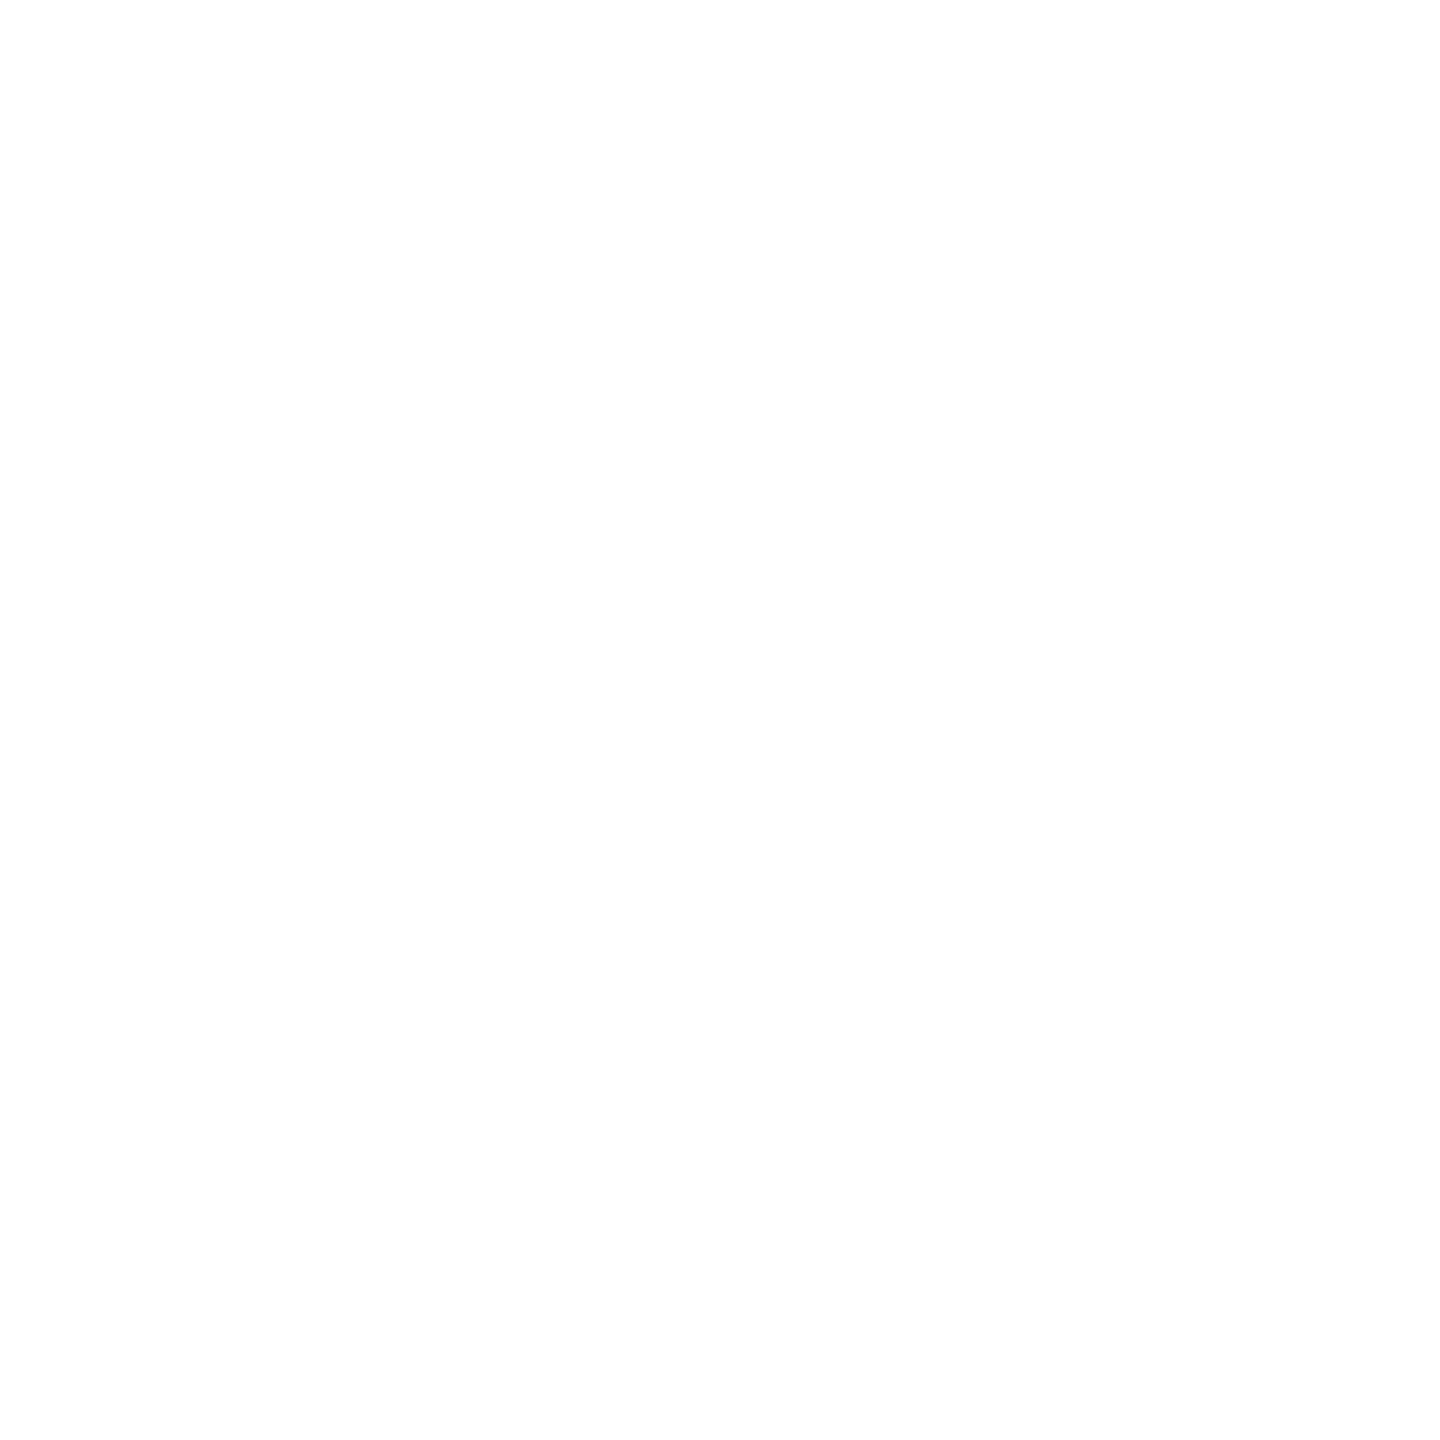

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/geopandas/plotting.py:607: UserW

KeyboardInterrupt: 

In [27]:
#Terminus area change plots
%matplotlib notebook

for i in [0,1]:
    dataset = ['net_area_change_early','net_area_change_late']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 30 #change marker size
                                                              
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='gainsboro')
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:

        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()

        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_50m,zorder=0)
        
        im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<=0)
                                                     &((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>=0)
                                                     &(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='gray',
            transform=ccrs.epsg('3995'),
        )
        
        im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<0)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='red',
            transform=ccrs.epsg('3995'),
        )
        
        im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>0)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='blue',
            transform=ccrs.epsg('3995'),
        )
        
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1
    
    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .995, left = 0.005)
    
    if dataset[i] == 'net_area_change_early':
#         fig.suptitle('Terminus area change 2000-2010')
        fig.savefig('figures/2000to2010_advancing_retreating_uncertain_v4.jpg',format='jpg',dpi=600)
    if dataset[i] == 'net_area_change_late':
#         fig.suptitle('Terminus area change 2010-2020')
        fig.savefig('figures/2010to2020_advancing_retreating_uncertain_v4.jpg',format='jpg',dpi=600)

In [85]:
#export layer of advancing glaciers
dataset = ['net_area_change_early','net_area_change_late']
dataset_err = ['net_area_change_early_error','net_area_change_late_error']
export_name = ['advanced_early.gpkg','advanced_late.gpkg']
layer_name = ['advanced_early','advanced_late']

Arctic_discharge_fluxes_with_area_export['advanced_early'] = np.nan
Arctic_discharge_fluxes_with_area_export['advanced_late'] = np.nan

for i in [0,1]:
    Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>0)].to_file(export_name[i],driver='GPKG')
    
    for n in range(0,len(Arctic_discharge_fluxes_with_area_export)):
        if ((Arctic_discharge_fluxes_with_area_export[dataset[i]][n]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]][n])>0):
            Arctic_discharge_fluxes_with_area_export[layer_name[i]][n] = 1
        
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['advanced_early']==1)|(Arctic_discharge_fluxes_with_area_export['advanced_late']==1)][['Name_x','lat','lon','advanced_early','advanced_late','Surging','net_area_change_early','net_area_change_early_error','net_area_change_late','net_area_change_late_error','geometry']].to_file('Are_these_advancing_glaciers_surge_type_v2')

/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/willkochtitzky/opt/miniconda3/envs/old_descartes/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
#Terminus world plots
%matplotlib notebook
rgi = gpd.read_file('/Users/willkochtitzky/data/rgi60/regions/rgi60_merge.shp')
rgi['geometry'] = rgi.buffer(0)
rgi = rgi[rgi.centroid.y>50].to_crs(epsg=3995)
rgi_tidewater = gpd.read_file('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/Terminus_positions/RGI_Arctic_marine_terminating_glacier_outlines.gpkg') 
Greenland_IS = gpd.read_file('/Users/willkochtitzky/data/Greenland_Ice_Sheet.gpkg')
regions_outlines = gpd.read_file('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/vector_files/plotting_regions2.gpkg')

In [ ]:


for i in [0,1]:
    dataset = ['net_area_change_early','net_area_change_late']
    dataset_err = ['net_area_change_early_error','net_area_change_late_error']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 15 #change marker size
                                                              
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='gainsboro')
    fig = plt.figure(figsize=(8,6))


    ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo(central_longitude=-90,true_scale_latitude=60))
#     ax1 = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=0, central_latitude=70))
    ax1.set_facecolor('lightskyblue')
    ax1.add_feature(land_50m,zorder=0)
    rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
    Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
    
    im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<=0)
                                                 &((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>=0)].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='gray',
        transform=ccrs.epsg('3995'),
        label='Uncertain',zorder=4)
    im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Late_satellite_id']=='nan')].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='black',
        transform=ccrs.epsg('3995'),
        label='No longer marine terminating',zorder=4)
    im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<0)&(Arctic_discharge_fluxes_with_area_export['Late_satellite_id']!='nan')].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='red',
        transform=ccrs.epsg('3995'),
        label='Retreating',zorder=4)    
    im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>0)].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='blue',
        transform=ccrs.epsg('3995'),
        label='Advancing',zorder=4)

    gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
    gl.xlocator = mticker.FixedLocator(range(-180,180, 20))
    gl.ylocator = mticker.FixedLocator(range(0,90, 10))
    ax1.set_aspect(aspect=1, adjustable='datalim')
    
    regions_outlines.plot(ax=ax1,transform=ccrs.epsg('3995'),color='none',edgecolor='black')
    
    fs=10
    ax1.annotate('Alaska', xy=(0.08,0.35),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('QEI', xy=(0.51,0.52),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('BBI', xy=(0.66,0.12),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Greenland', xy=(0.67,0.4),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Iceland', xy=(0.87,0.436),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Jan Mayen', xy=(0.768,0.605),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Svalbard', xy=(0.737,0.72),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Severnaya Zemlya', xy=(0.4,0.885),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Franz Josef Land', xy=(0.531,0.836),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Novaya Zemlya', xy=(0.6755,0.897),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Russia', xy=(0.4,0.755),xycoords='axes fraction',fontsize=fs)
    
    fig.subplots_adjust(hspace=0.01, wspace=0.01,top =1, bottom = 0, right = 1, left = 0)
    plt.legend(loc='upper left')
    
    ax1.set_extent(          
                [min(Arctic_discharge_fluxes_with_area_export['geometry'].x-500000),
                max(Arctic_discharge_fluxes_with_area_export['geometry'].x+500000),
                min(Arctic_discharge_fluxes_with_area_export['geometry'].y-500000),
                max(Arctic_discharge_fluxes_with_area_export['geometry'].y+500000)],
                crs = ccrs.epsg('3995'))
    
    if dataset[i] == 'net_area_change_early':
#         fig.suptitle('Terminus area change 2000-2010')
        fig.savefig('figures/2000to2010_global_advancing_retreating_uncertain_v6.jpg',format='jpg',dpi=600)
    if dataset[i] == 'net_area_change_late':
#         fig.suptitle('Terminus area change 2010-2020')
        fig.savefig('figures/2010to2020_global_advancing_retreating_uncertain_v6.jpg',format='jpg',dpi=600)

<IPython.core.display.Javascript object>


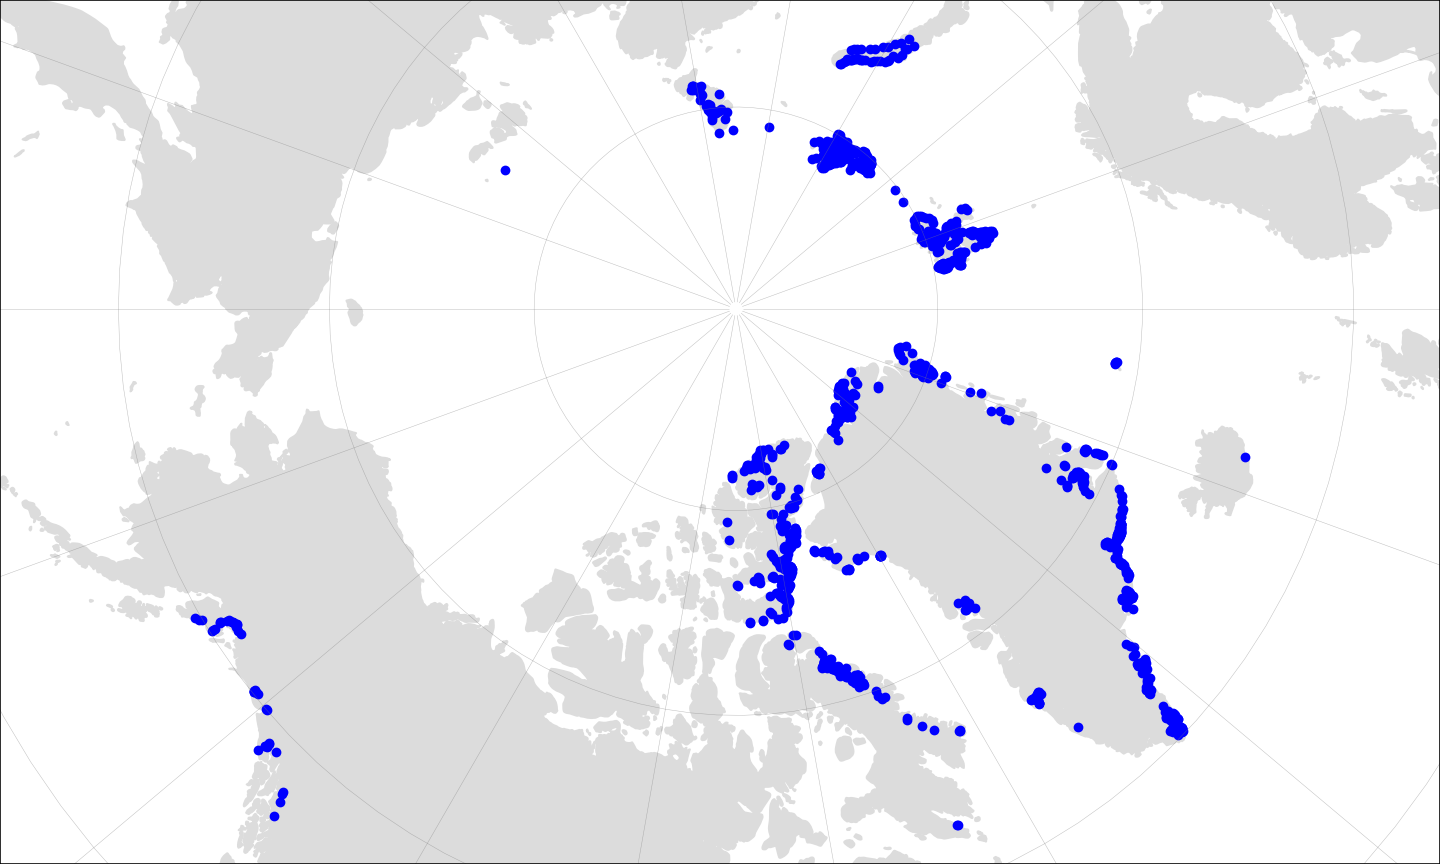

In [272]:
#Map of Northern Hemisphere glaciers
%matplotlib notebook
Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
color_map = 'seismic_r'
counter = 1
marker_size_def = 15 #change marker size

#sort the subregions by longitude so that your plots go from west to east
list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='gainsboro')
fig = plt.figure(figsize=(10,6))


ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo(central_longitude=-90,true_scale_latitude=60))
#     ax1 = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=0, central_latitude=70))

ax1.add_feature(land_50m,zorder=0)

im = Arctic_discharge_fluxes_with_area_export.plot(
    ax=ax1,
    markersize=marker_size_def,
    color='blue',
    transform=ccrs.epsg('3995'))

gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
gl.xlocator = mticker.FixedLocator(range(-180,180, 20))
gl.ylocator = mticker.FixedLocator(range(0,90, 10))
ax1.set_aspect(aspect=1, adjustable='datalim')

fig.subplots_adjust(hspace=0.01, wspace=0.01,top =1, bottom = 0, right = 1, left = 0)
    
fig.savefig('figures/Northern_hemisphere_marine_terminating_glaciers.jpg',format='jpg',dpi=600)

In [86]:
for i in [0,1]:
    dataset = ['net_area_change_early','net_area_change_late']
    dataset_err = ['net_area_change_early_error','net_area_change_late_error']
    landsat_data = ['Middle_satellite_id','Late_satellite_id']
    print('Dataset:  ',dataset[i])
    print('Uncertain glaciers:',len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<=0)
                                                     &((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>=0)&(Arctic_discharge_fluxes_with_area_export[landsat_data[i]]!='nan')]))
    print('Retreating glaciers:',len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<0)&(Arctic_discharge_fluxes_with_area_export[landsat_data[i]]!='nan')]))
    print('Advancing glaciers:',len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>0)]))
    print('No longer tidewater glaciers:',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export[landsat_data[i]]=='nan']))
    print()

Dataset:   net_area_change_early
Uncertain glaciers: 488
Retreating glaciers: 882
Advancing glaciers: 43
No longer tidewater glaciers: 47

Dataset:   net_area_change_late
Uncertain glaciers: 465
Retreating glaciers: 851
Advancing glaciers: 32
No longer tidewater glaciers: 112



In [271]:
Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Early_satellite_id']=='nan']

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
63  RGI60-03.00994  0.042061  0.061538                 0.053834   

    2000_2010_mean_flux_max  2010_2018_mean_flux_min  2010_2018_mean_flux_max  \
63                 0.085551                   0.0497                 0.073311   

             Name_x     Area  Zmin  Zmax  Zmed  Slope  Aspect   Lmax  Status  \
63  Good Friday Bay  731.002    68  1652   877    6.3     211  55006       0   

    Connect  Form  TermType  Surging  Linkages  Farinotti_thickness_min  \
63        0     0         0        3         9                 84.05529   

    region  Farinotti_thickness_max  \
63  Canada               522.904541   

    do_we_have_an_observation_in_middle_fifth       easting      northing  \
63                                        1.0 -1.247610e+06  38454.231252   

    Farinotti_thickness_mean     0000_v  best_thickness_mean  \
63                368.859124  87.645134           136.856695   

    thickness_mean_uncertainty  length_early_min  length_early_max  \
63                    9.310525         19.115607         23.947977   

    length_late_min  length_late_max  2000_2010_mean  2000_2010_mean_err  \
63        19.549133        23.878613      125.015752            3.339639   

    2010_2018_mean  2010_2018_mean_err  num_pts  GlaThiDa_observations  \
63      104.595256            0.742826      173                     10   

    Tomography_observations  Russian_observations  gate_length_km  IL_flux_gt  \
63                       97                     0           4.325      0.0475   

    IL_err_gt  2000_2010_mean_flux_gt  2000_2010_mean_err_gt  \
63    0.00893                0.063908               0.014542   

    2010_2018_mean_flux_gt  2010_2018_mean_err_gt  level_0  index  \
63                0.056401               0.010826       69     69   

    area_km2_gained_total  perimeter_gained_total  \
63               2.636269            11194.097906   

    perimeter_error_gained_total  area_km2_lost_total  perimeter_lost_total  \
63                      0.335823                  0.0                   0.0   

    perimeter_error_lost_total  area_km2_lost_early  perimeter_lost_early  \
63                         0.0                  0.0                   0.0   

    perimeter_error_lost_early  area_km2_gained_early  perimeter_gained_early  \
63                         0.0               1.928915             9949.737087   

    perimeter_error_gained_early  area_km2_lost_late  perimeter_lost_late  \
63                      0.298492                 0.0                  0.0   

    perimeter_error_lost_late  area_km2_gained_late  perimeter_gained_late  \
63                        0.0              0.707354            4595.590054   

    perimeter_error_gained_late Early_satellite_id  \
63                     0.137868                nan   

                         Middle_satellite_id  \
63  LE07_L1TP_052004_20100814_20161213_01_T1   

                           Late_satellite_id Early_date    Mid_date  \
63  LC08_L1TP_052003_20190815_20190820_01_T1        NaT  2010/08/14   

     Late_date  Early_date_decimal_year  Middle_date_decimal_year  \
63  2019/08/15                      0.0               2010.619178   

    Late_date_decimal_year  total_years_elapsed  \
63             2019.621918                 10.0   

    early_to_middle_years_elapsed  middle_to_late_years_elapsed  \
63                           10.0                       9.00274   

    net_area_change_total  net_area_change_total_error  \
63               2.636269                          0.0   

    net_area_change_per_year_total  net_area_change_per_year_total_error  \
63                        0.263627                                   0.0   

    net_area_change_early  net_area_change_early_error  \
63               1.928915                     0.298492   

    net_area_change_per_year_early  net_area_change_per_year_early_error  \
63                        0.192891                              0.029849   

    

In [ ]:
#Make regional maps
%matplotlib notebook

for i in [0,1]:
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean']
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'jet_r'
    counter = 1
    marker_size_def = 60 #change marker size
    vmax_fill = -0.02
    
    #percent error
    per_err = (Arctic_discharge_fluxes_with_area_export[dataset_err[i]])/np.abs(Arctic_discharge_fluxes_with_area_export[dataset[i]])*100
    big_flux = Arctic_discharge_fluxes_with_area_export[dataset[i]]<vmax_fill
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_regions = Arctic_discharge_fluxes_with_area_export.groupby('Region_name').mean()[['lon']].sort_values('lon').reset_index()['Region_name'].unique()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='gainsboro')
    
    for region_name in list_of_regions:
        fig = plt.figure(figsize=(10,6))
        vmin_fill = min(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]])
    
        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['lon'].mean()


        ax1 = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_50m,zorder=0)
        plot_very_low = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=vmax_fill)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
            ax=ax1,
            markersize=marker_size_def/3,
            color='mediumorchid',
            transform=ccrs.epsg('3995'),
#             label='Frontal ablation <-0.02 gt $a^-1$',
#             legend=True
        )
        
        num=[0,-.05,-0.1,-0.15,-0.2,-0.25,-0.3,-0.4,-0.8,-1.2,-1.8,-2.5,-5,-10]
        for n in range(0,len(num)-1):
            plotting_group_flux=(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=num[n])&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>num[n+1])
            plot_low_err = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='o',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty <50%'
            )

            plot_high_err = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty >50%'
            )
#         plt.legend(handles=[plot_very_low,plot_low_err,plot_high_err],labels=['1','2','3'],fontsize=20,loc='upper left')
        
        ax1.set_extent(
            [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].x-0),
            max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].x+0),
            min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].y-0),
            max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].y+0)],
            crs = ccrs.epsg('3995')
        )
            
#         ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 10))
        gl.ylocator = mticker.FixedLocator(range(0,90, 5))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')

        cax = fig.add_axes([0.905, 0.01, 0.03, 0.98], frame_on=False) # [left, bottom, width, height] 
        sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
        cbar = fig.colorbar(sm, cax=cax)
        cbar.ax.set_ylabel('Frontal ablation gt $a^-1$')
        
        
        #for legend
        custom_lines = [Line2D([0], [0],color='none', markerfacecolor='mediumorchid',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='s', markersize=marker_size_def/7)]
        ax1.legend(custom_lines, ['Frontal ablation <-0.02 gt $a^-1$','Frontal ablation uncertainty <50%','Frontal ablation uncertainty >50%'])
        
#         ax1.legend([plot_low_err,plot_high_err],['1','2'],loc='upper left')

        fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)
        if dataset[i] == 'Frontal_ablation_2000_to_2010_gt_per_yr_mean':
    #         fig.suptitle('Arctic Frontal Ablation 2000-2010')
            fig.savefig('figures/2000to2010_Regional_'+region_name+'_Discharge_err_sym_v18.jpg',format='jpg',dpi=600)
        if dataset[i] == 'Frontal_ablation_2010_to_2020_gt_per_yr_mean':
    #         fig.suptitle('Arctic Frontal Ablation 2010-2020')
            fig.savefig('figures/2010to2020_Regional_'+region_name+'_Discharge_err_sym_v18.jpg',format='jpg',dpi=600)
        plt.close()

In [280]:
max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']=='SZ']['lon'])

148.9548592593845

In [ ]:
#Make map of Russia
%matplotlib notebook

for i in [0,1]:
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean']
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'jet_r'
    counter = 1
    marker_size_def = 30 #change marker size
    vmax_fill = -0.02
    vmin_fill = min(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Region_name']=='SZ')][dataset[i]])
    
    Russia_dataset=Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['lon']>37)&(Arctic_discharge_fluxes_with_area_export['lon']<148)]
    
    #percent error
    per_err = (Russia_dataset[dataset_err[i]])/np.abs(Russia_dataset[dataset[i]])*100
    big_flux = Russia_dataset[dataset[i]]<vmax_fill
                                                                                                 
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='gainsboro')
    
    
    fig = plt.figure(figsize=(8,6))
    counter=1
    for region_name in ['FJL','NZ','SZ']:
    
        center_lat = Russia_dataset[Russia_dataset['Region_name']==region_name]['lat'].mean()
        center_lon = Russia_dataset[Russia_dataset['Region_name']==region_name]['lon'].mean()


        if counter==1:
            ax1 = plt.subplot(2,1,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        else:
            ax1 = plt.subplot(2,2,counter+1,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        counter=counter+1
        ax1.add_feature(land_50m,zorder=0)
        plot_very_low = Russia_dataset[(Russia_dataset[dataset[i]]>=vmax_fill)&(Russia_dataset['Region_name']==region_name)].plot(
            ax=ax1,
            markersize=marker_size_def/3,
            color='mediumorchid',
            transform=ccrs.epsg('3995'),
#             label='Frontal ablation <-0.02 gt $a^-1$',
#             legend=True
        )
        
        num=[0,-.05,-0.1,-0.15,-0.2,-0.25,-0.3,-0.4,-0.8,-1.2,-1.8,-2.5,-5,-10]
        for n in range(0,len(num)-1):
            plotting_group_flux=(Russia_dataset[dataset[i]]<=num[n])&(Russia_dataset[dataset[i]]>num[n+1])
            plot_low_err = Russia_dataset[big_flux&plotting_group_flux&(per_err<50)&(Russia_dataset['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Russia_dataset[big_flux&plotting_group_flux&(per_err<50)&(Russia_dataset['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='o',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty <50%'
            )

            plot_high_err = Russia_dataset[big_flux&plotting_group_flux&(per_err>=50)&(Russia_dataset['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Russia_dataset[big_flux&plotting_group_flux&(per_err>=50)&(Russia_dataset['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty >50%'
            )
#         plt.legend(handles=[plot_very_low,plot_low_err,plot_high_err],labels=['1','2','3'],fontsize=20,loc='upper left')
        
        ax1.set_extent(
            [min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x-5000),
            max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x+5000),
            min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y-5000),
            max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y+5000)],
            crs = ccrs.epsg('3995')
        )
        if region_name == 'FJL':
            ax1.set_extent(
                [min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x+40000),
                max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x-50000),
                min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y+50000),
                max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y-5000)],
                crs = ccrs.epsg('3995')
            )
            
#         ax1.set_title(subregion_name, fontsize=10,pad=0)
#         ax1.text(0.1, 0.9,region_name,horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
        if region_name == 'FJL':
            ax1.annotate('Franz Josef Land', xy=(0.05,0.9),xycoords='axes fraction',fontsize=14)
            custom_lines = [Line2D([0], [0],color='none', markerfacecolor='mediumorchid',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='s', markersize=marker_size_def/7)]
            ax1.legend(custom_lines, ['Frontal ablation <-0.02 gt $a^-1$','Frontal ablation uncertainty <50%','Frontal ablation uncertainty >50%'],loc='lower right',fontsize=6)
        if region_name == 'NZ':
            ax1.annotate('Novaya Zemlya', xy=(0.05,0.9),xycoords='axes fraction',fontsize=14)
        if region_name == 'SZ':
            ax1.annotate('Severnaya Zemlya', xy=(0.05,0.9),xycoords='axes fraction',fontsize=14)

        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 10))
        gl.ylocator = mticker.FixedLocator(range(0,90, 5))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')

        cax = fig.add_axes([0.885, 0.01, 0.03, 0.98], frame_on=False) # [left, bottom, width, height] 
        sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
        cbar = fig.colorbar(sm, cax=cax)
        cbar.ax.set_ylabel('Frontal ablation gt $a^-1$')
        
        
#         #for legend
#         custom_lines = [Line2D([0], [0],color='none', markerfacecolor='mediumorchid',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
#                         Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
#                         Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='s', markersize=marker_size_def/7)]
#         ax1.legend(custom_lines, ['Frontal ablation <-0.02 gt $a^-1$','Frontal ablation uncertainty <50%','Frontal ablation uncertainty >50%'])
        
#         ax1.legend([plot_low_err,plot_high_err],['1','2'],loc='upper left')

    fig.subplots_adjust(hspace=0.01, wspace=0.01,top = .98, bottom = 0.005, right = .88, left = 0.005)
    if dataset[i] == 'Frontal_ablation_2000_to_2010_gt_per_yr_mean':
#         fig.suptitle('Arctic Frontal Ablation 2000-2010')
        fig.savefig('figures/2000to2010_Regional_Russia_Discharge_err_sym_v19.jpg',format='jpg',dpi=600)
    if dataset[i] == 'Frontal_ablation_2010_to_2020_gt_per_yr_mean':
#         fig.suptitle('Arctic Frontal Ablation 2010-2020')
        fig.savefig('figures/2010to2020_Regional_Russia_Discharge_err_sym_v19.jpg',format='jpg',dpi=600)
    plt.close()

In [ ]:
#THESE NEXT TWO DONT REALLY WORK, there is a problem where some glaciers are trending positive, but their uncertainty surrounds 0 and is not properly accounted for here

In [51]:
#LOOK AT TERMINUS CHANGE FROM AREA TRENDS

#Create groups based on how the terminus is changing
more_positive_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])]
more_negative_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])]
no_change = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>=
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error']))&
    ((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<=
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error']))|
    ((Arctic_discharge_fluxes_with_area_export['net_area_change_late']==0)&(Arctic_discharge_fluxes_with_area_export['net_area_change_early']==0))]

# more_positive_now
was_retreating_now_advancing = more_positive_now[(more_positive_now['net_area_change_early']<0)&
                                    (more_positive_now['net_area_change_late']>0)]
advancing_faster = more_positive_now[(more_positive_now['net_area_change_early']<more_positive_now['net_area_change_late'])
                                   &(more_positive_now['net_area_change_early']>0)]
retreating_slower = more_positive_now[(more_positive_now['net_area_change_early']<0)
                                    &(more_positive_now['net_area_change_late']<=0)]

merge_dataset_pos = pd.concat([was_retreating_now_advancing,advancing_faster,retreating_slower,more_positive_now])

# more_negative_now
was_advancing_now_retreating = more_negative_now[(more_negative_now['net_area_change_early']>0)&
                                    (more_negative_now['net_area_change_late']<0)]

retreating_faster = more_negative_now[(more_negative_now['net_area_change_early']>more_negative_now['net_area_change_late'])
                                   &(more_negative_now['net_area_change_early']<=0)]

advancing_slower = more_negative_now[(more_negative_now['net_area_change_early']>0)
                                    &(more_negative_now['net_area_change_late']>0)]

merge_dataset_neg = pd.concat([was_advancing_now_retreating,retreating_faster,advancing_slower,more_negative_now])

#no change
constant_retreat = no_change[(no_change['net_area_change_early']+no_change['net_area_change_early_error']<0)
                             &(no_change['net_area_change_late']+no_change['net_area_change_late_error']<0)]

constant_advance = no_change[(no_change['net_area_change_early']-no_change['net_area_change_early_error']>0)
                             &(no_change['net_area_change_late']-no_change['net_area_change_late_error']>0)]

overlapping_uncertainties_around_0 = pd.concat([constant_retreat,constant_advance,no_change]).drop_duplicates(subset='RGIId',keep=False)


# What numbers of each group
print(len(more_positive_now))
print(len(more_negative_now))
print(len(no_change))
print()
print(len(more_positive_now)+len(more_negative_now)+len(no_change))
print(len(Arctic_discharge_fluxes_with_area_export))
print()
print(len(was_retreating_now_advancing))
print(len(advancing_faster))
print(len(retreating_slower))
print()
print(len(was_retreating_now_advancing)+len(advancing_faster)+len(retreating_slower))
print(len(more_positive_now))
print()
print()
print(len(was_advancing_now_retreating))
print(len(retreating_faster))
print(len(advancing_slower))
print()
print(len(was_advancing_now_retreating)+len(retreating_faster)+len(advancing_slower))
print(len(more_negative_now))
print()
print(len(constant_retreat))
print(len(constant_advance))
print(len(overlapping_uncertainties_around_0))
print()
print(len(constant_retreat)+len(constant_advance)+len(overlapping_uncertainties_around_0))
print(len(no_change))

213
177
1070

1460
1460

38
3
172

213
213


38
134
5

177
177

481
7
582

1070
1070


<IPython.core.display.Javascript object>


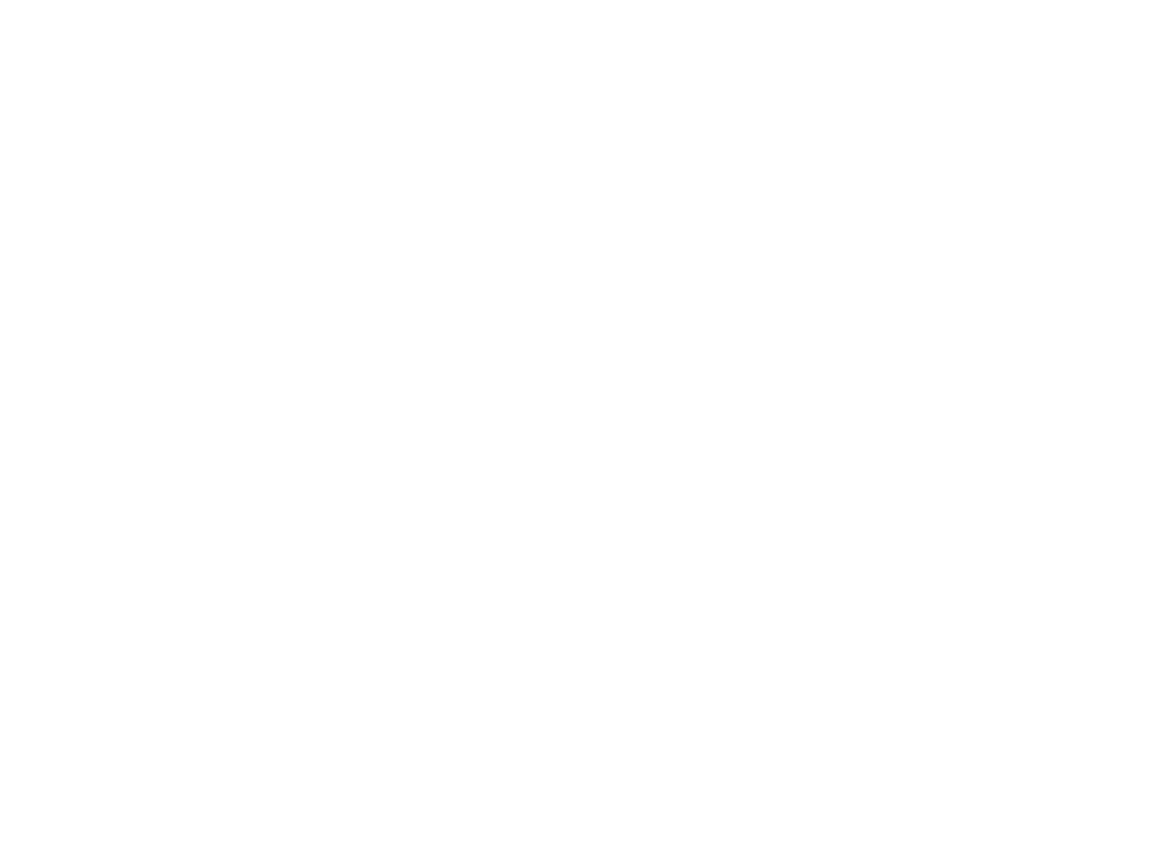

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [52]:
%matplotlib notebook
evenly_spaced_interval = np.linspace(0, 1,8)
colors = [matplotlib.cm.seismic_r(x) for x in evenly_spaced_interval]
colors.insert(0,'gray')

dataset = [overlapping_uncertainties_around_0,retreating_faster,was_advancing_now_retreating,constant_retreat,retreating_slower,advancing_slower,constant_advance,was_retreating_now_advancing,advancing_faster]
color_plot = colors
dataset_name = ['Uncertain near 0','Retreating faster','Was advancing, now retreating','Constant retreat','Retreating slower','Advancing slower','Constant Advance','Was retreating, now advancing','Advancing faster']

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)

for i in range(0,len(dataset)):
    plt.scatter(dataset[i]['best_thickness_mean'],dataset[i]['2010_2018_mean'],c=color_plot[i],label=(dataset_name[i]+' (n='+str(len(dataset[i]))+')'),s=10,zorder=4)
    plt.scatter(np.median(dataset[i]['best_thickness_mean']),np.nanmedian(dataset[i]['2010_2018_mean']),c=color_plot[i],s=500,zorder=1)
plt.legend(fontsize='small')
plt.xlabel('Flux gate mean thickness (m)')
plt.ylabel('2010-2020 mean velocity (m/yr)')
plt.xlim([10,600])
plt.ylim([0,3100])
ax1.set_yscale('symlog')
ax1.set_xscale('symlog')

plt.savefig('figures/Termini_area_change_against_mean_thickness_and_velocity_v4.jpg',format='jpg',dpi=600)

In [53]:
was_retreating_now_advancing[['net_area_change_per_year_early','net_area_change_per_year_early_error','net_area_change_late','net_area_change_late_error']]

net_area_change_per_year_early  net_area_change_per_year_early_error  \
875                        -0.004461                              0.003433   
822                        -0.005654                              0.002755   
38                         -0.007700                              0.012790   
296                        -0.007423                              0.003884   
529                        -0.008878                              0.004491   
586                        -0.007728                              0.004761   
360                        -0.008892                              0.003958   
1257                       -0.011230                              0.006822   
403                        -0.011761                              0.006312   
572                        -0.010513                              0.004242   
420                        -0.018746                              0.006054   
92                         -0.026440                              0.028284   
1299                       -0.031339                              0.014259   
120                        -0.027225                              0.014244   
1109                       -0.028291                              0.046784   
633                        -0.053151                              0.017849   
967                        -0.047829                              0.012166   
1045                       -0.062191                              0.020629   
568                        -0.061084                              0.012801   
902                        -0.086990                              0.025815   
277                        -0.070002                              0.011371   
1418                       -0.064469                              0.013061   
901                        -0.088088                              0.028918   
1084                       -0.083887                              0.022049   
276                        -0.086636                              0.011453   
715                        -0.086328                              0.014297   
920                        -0.121373                              0.024443   
629                        -0.115308                              0.031914   
250                        -0.180273                              0.051375   
1201                       -0.251040                              0.021454   
918                        -0.222898                              0.026551   
1113                       -0.227480                              0.073399   
1013                       -0.462712                              0.041023   
923                        -0.477979                              0.064874   
1458                       -0.913011                              0.180979   
936                        -1.237414                              0.266251   
257                        -2.061771                              0.072419   
935                        -3.597652                              0.638720   

      net_area_change_late  net_area_change_late_error  
875               0.039176                    0.032421  
822               0.002488                    0.014180  
38                0.206584                    0.106377  
296               0.003376                    0.017340  
529               0.005930                    0.023781  
586               0.009642                    0.026048  
360               0.000958                    0.016993  
1257              0.024490                    0.041114  
403               0.000374                    0.035903  
572               0.016796                    0.027404  
420               0.007517                    0.035488  
92                1.175195                    0.187466  
1299              0.028929                    0.126168  
120               0.055958                    0.089066  
1109              1.278085                    0.482394  
633               0.182718                    0.134

In [54]:
#LOOK AT TERMINUS CHANGE FROM VOLUME TRENDS

#Create groups based on how the terminus is changing
more_positive_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])<
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'])]
more_negative_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])>
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'])]
no_change = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])>=
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error']))&
    ((Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])<=
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error']))|
    ((Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']==0)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']==0))]

# more_positive_now
was_retreating_now_advancing = more_positive_now[(more_positive_now['terminus_gt_change_per_year_early']<0)&
                                    (more_positive_now['terminus_gt_change_per_year_late']>0)]
advancing_faster = more_positive_now[(more_positive_now['terminus_gt_change_per_year_early']<more_positive_now['terminus_gt_change_per_year_late'])
                                   &(more_positive_now['terminus_gt_change_per_year_early']>0)]
retreating_slower = more_positive_now[(more_positive_now['terminus_gt_change_per_year_early']<0)
                                    &(more_positive_now['terminus_gt_change_per_year_late']<=0)]

merge_dataset_pos = pd.concat([was_retreating_now_advancing,advancing_faster,retreating_slower,more_positive_now])

# more_negative_now
was_advancing_now_retreating = more_negative_now[(more_negative_now['terminus_gt_change_per_year_early']>0)&
                                    (more_negative_now['terminus_gt_change_per_year_late']<0)]

retreating_faster = more_negative_now[(more_negative_now['terminus_gt_change_per_year_early']>more_negative_now['terminus_gt_change_per_year_late'])
                                   &(more_negative_now['terminus_gt_change_per_year_early']<=0)]

advancing_slower = more_negative_now[(more_negative_now['terminus_gt_change_per_year_early']>0)
                                    &(more_negative_now['terminus_gt_change_per_year_late']>0)]

merge_dataset_neg = pd.concat([was_advancing_now_retreating,retreating_faster,advancing_slower,more_negative_now])

#no change
constant_retreat = no_change[(no_change['terminus_gt_change_per_year_early']+no_change['terminus_gt_change_per_year_early_area_error']<0)
                             &(no_change['terminus_gt_change_per_year_late']+no_change['terminus_gt_change_per_year_late_area_error']<0)]

constant_advance = no_change[(no_change['terminus_gt_change_per_year_early']-no_change['terminus_gt_change_per_year_early_area_error']>0)
                             &(no_change['terminus_gt_change_per_year_late']-no_change['terminus_gt_change_per_year_late_area_error']>0)]

overlapping_uncertainties_around_0 = pd.concat([constant_retreat,constant_advance,no_change]).drop_duplicates(subset='RGIId',keep=False)


# What numbers of each group
print(len(more_positive_now))
print(len(more_negative_now))
print(len(no_change))
print()
print(len(more_positive_now)+len(more_negative_now)+len(no_change))
print(len(Arctic_discharge_fluxes_with_area_export))
print()
print(len(was_retreating_now_advancing))
print(len(advancing_faster))
print(len(retreating_slower))
print()
print(len(was_retreating_now_advancing)+len(advancing_faster)+len(retreating_slower))
print(len(more_positive_now))
print()
print()
print(len(was_advancing_now_retreating))
print(len(retreating_faster))
print(len(advancing_slower))
print()
print(len(was_advancing_now_retreating)+len(retreating_faster)+len(advancing_slower))
print(len(more_negative_now))
print()
print(len(constant_retreat))
print(len(constant_advance))
print(len(overlapping_uncertainties_around_0))
print()
print(len(constant_retreat)+len(constant_advance)+len(overlapping_uncertainties_around_0))
print(len(no_change))


135
290
1035

1460
1460

40
3
92

135
135


82
207
1

290
290

502
6
527

1035
1035


<IPython.core.display.Javascript object>


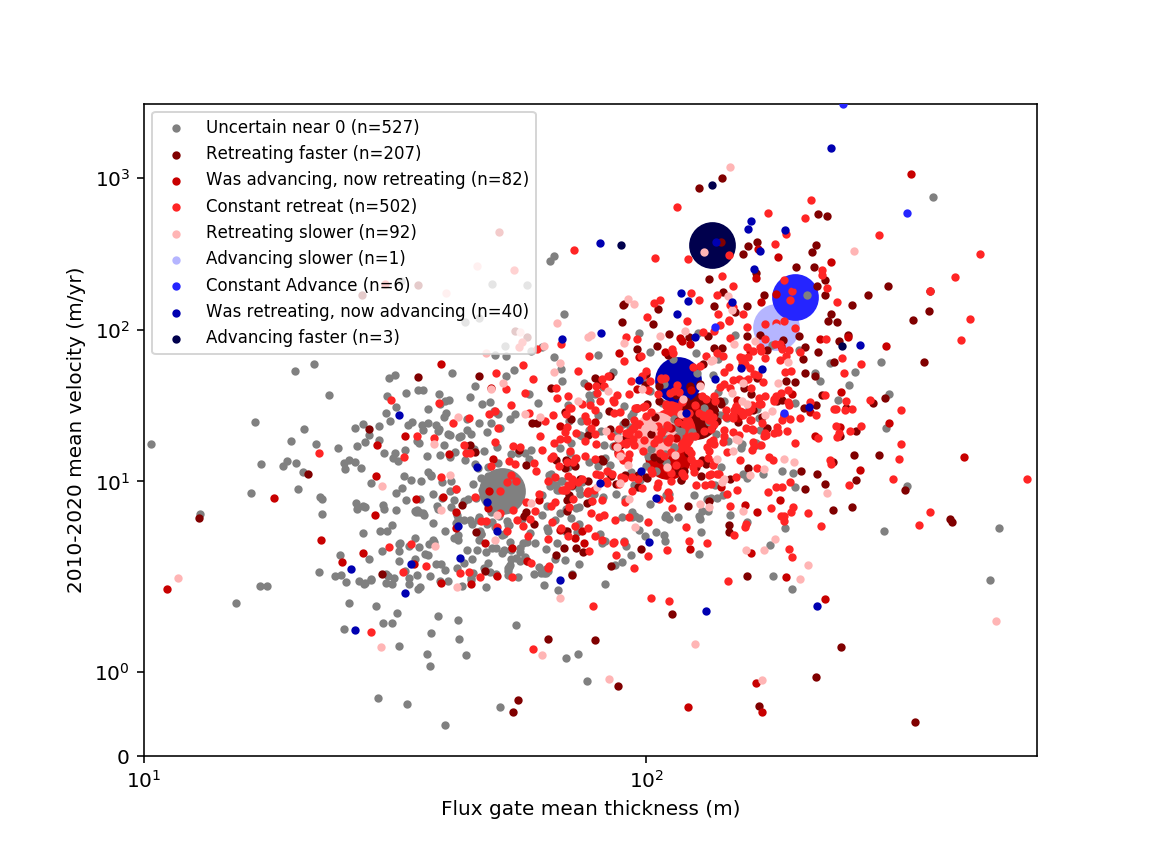

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [55]:
%matplotlib notebook
evenly_spaced_interval = np.linspace(0, 1,8)
colors = [matplotlib.cm.seismic_r(x) for x in evenly_spaced_interval]
colors.insert(0,'gray')

dataset = [overlapping_uncertainties_around_0,retreating_faster,was_advancing_now_retreating,constant_retreat,retreating_slower,advancing_slower,constant_advance,was_retreating_now_advancing,advancing_faster]
color_plot = colors
dataset_name = ['Uncertain near 0','Retreating faster','Was advancing, now retreating','Constant retreat','Retreating slower','Advancing slower','Constant Advance','Was retreating, now advancing','Advancing faster']

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)

for i in range(0,len(dataset)):
    plt.scatter(dataset[i]['best_thickness_mean'],dataset[i]['2010_2018_mean'],c=color_plot[i],label=(dataset_name[i]+' (n='+str(len(dataset[i]))+')'),s=10,zorder=4)
    plt.scatter(np.median(dataset[i]['best_thickness_mean']),np.nanmedian(dataset[i]['2010_2018_mean']),c=color_plot[i],s=500,zorder=1)
plt.legend(fontsize='small')
plt.xlabel('Flux gate mean thickness (m)')
plt.ylabel('2010-2020 mean velocity (m/yr)')
plt.xlim([10,600])
plt.ylim([0,3100])
ax1.set_yscale('symlog')
ax1.set_xscale('symlog')

plt.savefig('figures/Termini_volume_change_against_mean_thickness_and_velocity_v4.jpg',format='jpg',dpi=600)

In [ ]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>0.01)]

In [43]:
glacier_contrib_threshold = -0.04

print('Contribution of glaciers great than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Error of glaciers greater than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())
print('Contribution all glaciers:',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('this is:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'%')
print('this is: ',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]),'glaciers out of ',len(Arctic_discharge_fluxes_with_area_export))
print('glaciers less than threshold:',len(Arctic_discharge_fluxes_with_area_export)-len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]))
biggest_contributors = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]

Contribution of glaciers great than threshold: -70.64833747325336
Error of glaciers great than threshold: 25.731252435252177
Contribution all glaciers: -78.67478005596153
this is: 89.79794722400375 %
this is:  284 glaciers out of  1460
glaciers less than threshold: 1176


In [42]:
glacier_contrib_threshold = -0.04

print('Contribution of glaciers less than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Error of glaciers less than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())
print('Contribution all glaciers:',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('this is:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'%')
print('this is: ',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]),'glaciers out of ',len(Arctic_discharge_fluxes_with_area_export))


Contribution of glaciers less than threshold: -8.026442582708173
Error of glaciers less than threshold: 3.9482317303037755
Contribution all glaciers: -78.67478005596153
this is: 10.202052775996256 %
this is:  1176 glaciers out of  1460


In [258]:
biggest_contributors.groupby(['Region_name']).sum()

flux_min   flux_max  2000_2010_mean_flux_min  \
Region_name                                                            
Alaska                  9.286962  13.627777                 8.793870   
Greenland               1.295234   2.644545                 1.083131   
Iceland and Jan Mayen   0.234313   0.536090                 0.199034   
QEI                     2.178120   2.856909                 1.882772   
Russia                 10.180191  20.722524                 5.052633   
Svalbard                9.963683  19.299934                 0.781628   

                       2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
Region_name                                                               
Alaska                               13.649583                 9.750772   
Greenland                             4.304201                 1.111885   
Iceland and Jan Mayen                 0.985738                 0.168909   
QEI                                   3.562364                 2.146937   
Russia                               48.146175                 9.368866   
Svalbard                             16.782221                 8.515392   

                       2010_2018_mean_flux_max       Area  Zmin   Zmax   Zmed  \
Region_name                                                                     
Alaska                               14.907877   8140.258   721  54714  24707   
Greenland                             3.592050  58339.060  1564  44429  23005   
Iceland and Jan Mayen                 1.279135   1067.745    97   1878   1334   
QEI                                   2.975710  31380.079   134  47156  25825   
Russia                               32.644600  27894.293  1594  75649  42923   
Svalbard                             26.500275  16349.606  3976  50499  26099   

                        Slope  Aspect     Lmax  Status  Connect  Form  \
Region_name                                                             
Alaska                  236.0    2625   692994       0        0     0   
Greenland               252.4    5001   646834       0       14     6   
Iceland and Jan Mayen     9.0     135    53427       0        0     1   
QEI                     271.4    4657  1478205       0        0     5   
Russia                 1564.4   24831  2360210       0        0   104   
Svalbard                520.7    9451  1615208       0        0    24   

                       TermType  Surging  Linkages  Farinotti_thickness_min  \
Region_name                                                                   
Alaska                       17      153       153               198.663639   
Greenland                    34      306       306               439.370218   
Iceland and Jan Mayen         0        3         9               101.877899   
QEI                          29       34       279               826.119635   
Russia                      152     1111      1233              5264.075920   
Svalbard                     45       89       236              2077.306942   

                       Farinotti_thickness_max  \
Region_name                                      
Alaska                             5234.421631   
Greenland                         11680.416351   
Iceland and Jan Mayen               469.701843   
QEI                               14108.333145   
Russia                            40223.465065   
Svalbard                          16489.052620   

                       do_we_have_an_observation_in_middle_fifth  \
Region_name                                                        
Alaska                                                       5.0   
Greenland                                                    7.0   
Iceland and Jan Mayen                                        0.0   
QEI                                                         23.0   
Russia                                                      29.0   
Svalbard                                                    29.0   

                            easti

In [267]:
print(len(biggest_contributors[(biggest_contributors['Region_name']=='Russia')|(biggest_contributors['Region_name']=='Svalbard')]))
biggest_contributors[(biggest_contributors['Region_name']=='Russia')|(biggest_contributors['Region_name']=='Svalbard')].sum()

201


RGIId                                               RGI60-09.00885RGI60-07.00301RGI60-07.01477RGI6...
flux_min                                                                                      20.1439
flux_max                                                                                      40.0225
2000_2010_mean_flux_min                                                                       5.83426
2000_2010_mean_flux_max                                                                       64.9284
2010_2018_mean_flux_min                                                                       17.8843
2010_2018_mean_flux_max                                                                       59.1449
Area                                                                                          44243.9
Zmin                                                                                             5570
Zmax                                                                              

In [269]:
#comparison of GRACE estimates and FA
print((78.7-29.7)/(193.7+34))
print((78.7+29.7)/(193.7-34))

#comparison to Greenland
print((78.7-29.7)/(488+49))
print((78.7+29.7)/(488-49))

0.21519543258673696
0.6787726988102694
0.09124767225325885
0.24692482915717542


In [261]:
biggest_contributors.groupby(['Region_name']).count()['RGIId']

Region_name
Alaska                    17
Greenland                 34
Iceland and Jan Mayen      1
QEI                       31
Russia                   137
Svalbard                  64
Name: RGIId, dtype: int64

In [260]:
biggest_contributors.sum()

RGIId                                               RGI60-01.14443RGI60-09.00885RGI60-01.14683RGI6...
flux_min                                                                                      33.1385
flux_max                                                                                      59.6878
2000_2010_mean_flux_min                                                                       17.7931
2000_2010_mean_flux_max                                                                       87.4303
2010_2018_mean_flux_min                                                                       31.0628
2010_2018_mean_flux_max                                                                       81.8996
Area                                                                                           143171
Zmin                                                                                             8086
Zmax                                                                              

In [179]:
Arctic_discharge_fluxes_with_area_export.groupby(['Region_name']).count()

RGIId  flux_min  flux_max  2000_2010_mean_flux_min  \
Region_name                                                                 
Alaska                    42        42        42                       42   
BBI                       86        86        86                       86   
Greenland                514       514       514                      514   
Iceland and Jan Mayen      7         7         7                        7   
QEI                      246       246       246                      246   
Russia                   405       405       405                      405   
Svalbard                 160       160       160                      160   

                       2000_2010_mean_flux_max  2010_2018_mean_flux_min  \
Region_name                                                               
Alaska                                      42                       42   
BBI                                         86                       86   
Greenland                                  514                      514   
Iceland and Jan Mayen                        7                        7   
QEI                                        246                      246   
Russia                                     405                      405   
Svalbard                                   160                      160   

                       2010_2018_mean_flux_max  Name_x  Area  Zmin  Zmax  \
Region_name                                                                
Alaska                                      42      42    42    42    42   
BBI                                         86       0    86    86    86   
Greenland                                  514       8   514   514   514   
Iceland and Jan Mayen                        7       7     7     7     7   
QEI                                        246      42   246   246   246   
Russia                                     405     403   405   405   405   
Svalbard                                   160     157   160   160   160   

                       Zmed  Slope  Aspect  Lmax  Status  Connect  Form  \
Region_name                                                               
Alaska                   42     42      42    42      42       42    42   
BBI                      86     86      86    86      86       86    86   
Greenland               514    514     514   514     514      514   514   
Iceland and Jan Mayen     7      7       7     7       7        7     7   
QEI                     246    246     246   246     246      246   246   
Russia                  405    405     405   405     405      405   405   
Svalbard                160    160     160   160     160      160   160   

                       TermType  Surging  Linkages  Farinotti_thickness_min  \
Region_name                                                                   
Alaska                       42       42        42                       42   
BBI                          86       86        86                       86   
Greenland                   514      514       514                      514   
Iceland and Jan Mayen         7        7         7                        7   
QEI                         246      246       246                      246   
Russia                      405      405       405                      405   
Svalbard                    160      160       160                      160   

                       region  Farinotti_thickness_max  \
Region_name                                              
Alaska                     42                       42   
BBI                        86                       86   
Greenland                 514                      514   
Iceland and Jan Mayen       7                        7   
QEI                       246                      246   
Russia                    405                      405   
Svalbard                  160                      160   

                       do_we_have_an_observation_in_middl

In [191]:
region_stats['biggest'] = ((region_stats['terminus_gt_change_per_year_late']-region_stats['terminus_gt_change_per_year_late_area_error'])/(region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean']+region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']-region_stats['terminus_gt_change_per_year_late_area_error']))*100
region_stats['smallest'] = ((region_stats['terminus_gt_change_per_year_late']+region_stats['terminus_gt_change_per_year_late_area_error'])/(region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean']-region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']+region_stats['terminus_gt_change_per_year_late_area_error']))*100
region_stats

terminus_gt_change_per_year_late  \
Region_name                                               
Alaska                                        -1.255663   
BBI                                           -0.112876   
Greenland                                     -3.069859   
Iceland and Jan Mayen                         -0.161848   
QEI                                           -3.243208   
Russia                                        -9.423132   
Svalbard                                      -2.254557   

                       terminus_gt_change_per_year_late_area_error  \
Region_name                                                          
Alaska                                                    0.399965   
BBI                                                       0.037438   
Greenland                                                 1.007590   
Iceland and Jan Mayen                                     0.043926   
QEI                                                       1.035662   
Russia                                                    3.509305   
Svalbard                                                  2.423111   

                       Frontal_ablation_2010_to_2020_gt_per_yr_mean  \
Region_name                                                           
Alaska                                                   -12.773918   
BBI                                                       -0.187248   
Greenland                                                 -6.537938   
Iceland and Jan Mayen                                     -0.835976   
QEI                                                       -6.268001   
Russia                                                   -31.680248   
Svalbard                                                 -20.391451   

                       Frontal_ablation_2010_to_2020_gt_per_yr_mean_err  \
Region_name                                                               
Alaska                                                         2.572890   
BBI                                                            0.055125   
Greenland                                                      2.564829   
Iceland and Jan Mayen                                          0.518542   
QEI                                                            1.376013   
Russia                                                        13.234449   
Svalbard                                                       9.357637   

                         biggest   smallest  
Region_name                                  
Alaska                 15.617671   5.724942  
BBI                    88.648415  36.810708  
Greenland              81.864985  25.475276  
Iceland and Jan Mayen  56.944273   8.997627  
QEI                    72.184938  33.405395  
Russia                 58.904010  14.282747  
Svalbard               34.760306  -0.616829

In [189]:
Arctic_discharge_fluxes_with_area_export.sum()

RGIId                                               RGI60-07.00298RGI60-09.00971RGI60-03.03956RGI6...
flux_min                                                                                      36.9098
flux_max                                                                                      67.2168
2000_2010_mean_flux_min                                                                       19.6871
2000_2010_mean_flux_max                                                                       110.751
2010_2018_mean_flux_min                                                                       34.4663
2010_2018_mean_flux_max                                                                        94.527
Area                                                                                           228087
Zmin                                                                                            61191
Zmax                                                                              

In [ ]:
#Produce % error figures for discharge
%matplotlib notebook

for i in [0,1]: 
    
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean'][i]
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'][i]

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'jet'
    counter = 1
    marker_size_def =30 #change marker size
    vmin_fill = 0
    vmax_fill = 100
    min_value=-0.01
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='gainsboro')
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:

        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()


        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_50m,zorder=0)
        im = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export[dataset]<=min_value].plot(
            ax=ax1,
            column=Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export[dataset]<=min_value][dataset_err]/np.abs(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export[dataset]<=min_value][dataset])*100,
            vmin=vmin_fill, 
            vmax=vmax_fill,
            markersize=marker_size_def,
            cmap=color_map,
            transform=ccrs.epsg('3995'),
        )

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect('auto', adjustable='box')
        counter = counter+1

    cax = fig.add_axes([0.91, 0.025, 0.03, 0.95]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Percent uncertainty of frontal ablation')

    fig.subplots_adjust(hspace=0.2, wspace=0.01,top = .93, bottom = 0.01, right = .90, left = 0.01)
    if dataset == 'Frontal_ablation_2000_to_2010_gt_per_yr_mean':
        fig.suptitle('Arctic Discharge 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_Discharge_err_v8.jpg',format='jpg',dpi=600)
    if dataset == 'Frontal_ablation_2010_to_2020_gt_per_yr_mean':
        fig.suptitle('Arctic Discharge 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_Discharge_err_v8.jpg',format='jpg',dpi=600)

In [ ]:
#export figures of every glacier
distance_across=[]
interpolated_thickness=[]
THICKNESS=[]
tomo_thick=[]
Farinotti=[]

rgi_ids = Arctic_discharge['RGIId'].unique()
Arctic_discharge[Arctic_discharge['RGIId']==rgi_ids[0]]

%matplotlib notebook

for i in range(0,len(rgi_ids)):
    plt.figure(figsize=[20,10])
    plt.plot(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['best_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['interpolated_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['THICKNESS'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['tomo_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['Farinotti_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['0000_v'][Arctic_discharge['RGIId']==rgi_ids[i]],color='w')
    plt.xlabel('Distance across glacier (m)')
    plt.ylabel('Thickness (m) or velocity (m/yr)')
    plt.legend(['Best thickness used for calculations','interpolated','GlaThiDa','Tomography','Farinotti','Velocity 2019-2020'])
    plt.title((rgi_ids[i],Arctic_discharge['Name'][Arctic_discharge['RGIId']==rgi_ids[i]].reset_index()['Name'][1]))
    fig_title=rgi_ids[i]+'.tif'
    plt.savefig(fig_title)
    plt.close()

In [ ]:
#export figures of glaciers with more than 0.1 gt of ice
distance_across=[]
interpolated_thickness=[]
THICKNESS=[]
tomo_thick=[]
Farinotti=[]

rgi_ids = Arctic_discharge['RGIId'].unique()
Arctic_discharge[Arctic_discharge['RGIId']==rgi_ids[0]]

%matplotlib notebook

for i in range(0,len(rgi_ids)):
    if Arctic_discharge['IL_flux_gt'][Arctic_discharge['RGIId']==rgi_ids[i]].iloc[0]>0.1:
        plt.figure(figsize=[20,10])
        plt.plot(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['best_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['interpolated_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['THICKNESS'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['tomo_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['Farinotti_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['0000_v'][Arctic_discharge['RGIId']==rgi_ids[i]],color='w')
        plt.xlabel('Distance across glacier (m)')
        plt.ylabel('Thickness (m) or velocity (m/yr)')
        plt.legend(['Best thickness used for calculations','interpolated','GlaThiDa','Tomography','Farinotti','Velocity 2019-2020'])
        plt.title((rgi_ids[i],Arctic_discharge['Name'][Arctic_discharge['RGIId']==rgi_ids[i]].reset_index()['Name'][1]))
        fig_title=rgi_ids[i]+'.tif'
        plt.savefig(fig_title)
    

In [ ]:
# export biggest contributes to geopackage, shapefile, and csv
inProj = Proj(init='epsg:3995')
outProj = Proj(init='epsg:4326')

easting=[]
northing=[]
for i in range(0,len(Arctic_discharge_fluxes)):
    easting.append(Arctic_discharge_fluxes['easting'][i])
    northing.append(Arctic_discharge_fluxes['northing'][i])
    
Arctic_discharge_fluxes['lon'],Arctic_discharge_fluxes['lat'] = transform(inProj,outProj,easting,northing)

Arctic_discharge_fluxes_gt0pt1gt =Arctic_discharge_fluxes[Arctic_discharge_fluxes['IL_flux_gt']>0.1]

Arctic_discharge_fluxes_gt0pt1gt.to_csv('Arctic_discharge_fluxes_greater_0pt1gt_'+date_string+'2020.txt')

#export to geopackage
Arctic_discharge_fluxes_gt0pt1gt = gpd.GeoDataFrame(Arctic_discharge_fluxes_gt0pt1gt, geometry=gpd.points_from_xy(Arctic_discharge_fluxes_gt0pt1gt.easting, Arctic_discharge_fluxes_gt0pt1gt.northing),crs='EPSG:3995')
Arctic_discharge_fluxes_gt0pt1gt.to_file('Arctic_discharge_fluxes_greater_0pt1gt_'+date_string+'2020_epsg3995.gpkg', driver="GPKG")#change file name based on distance
Arctic_discharge_fluxes_gt0pt1gt.to_file('Arctic_discharge_fluxes_greater_0pt1gt_'+date_string+'2020_epsg3995') #change file name based on distance




In [ ]:
#export all data to geopackage and csv files

#optional add in lat lon in decimal degrees
inProj = Proj(init='epsg:3995')
outProj = Proj(init='epsg:4326')

easting=[]
northing=[]
for i in range(0,len(Arctic_discharge_fluxes)):
    easting.append(Arctic_discharge_fluxes['easting'][i])
    northing.append(Arctic_discharge_fluxes['northing'][i])
    
Arctic_discharge_fluxes['lon'],Arctic_discharge_fluxes['lat'] = transform(inProj,outProj,easting,northing)

Arctic_discharge_fluxes.to_csv('Arctic_discharge_fluxes_'+date_string+'2020.txt')

#export to geopackage
Arctic_discharge_fluxes_export = gpd.GeoDataFrame(Arctic_discharge_fluxes, geometry=gpd.points_from_xy(Arctic_discharge_fluxes.easting, Arctic_discharge_fluxes.northing),crs='EPSG:3995')
Arctic_discharge_fluxes_export.to_file('Arctic_discharge_fluxes_epsg3995.gpkg', driver="GPKG")#change file name based on distance

Arctic_discharge_fluxes_export = gpd.GeoDataFrame(Arctic_discharge_fluxes, geometry=gpd.points_from_xy(Arctic_discharge_fluxes.lon, Arctic_discharge_fluxes.lat),crs='EPSG:4326')
Arctic_discharge_fluxes_export.to_file('Arctic_discharge_fluxes_epsg4326.gpkg', driver="GPKG")#change file name based on distance

In [ ]:
%matplotlib notebook
Arctic_discharge_fluxes=Arctic_discharge_fluxes.sort_values('IL_flux_gt',ascending=True)
Arctic_discharge_fluxes.plot.scatter(x='easting',y='northing',c='IL_flux_gt',colormap='Spectral')

In [ ]:
Arctic_discharge_fluxes.plot.scatter(x='Area',y='IL_flux_gt',c='b')

In [ ]:
threshold=.4

print('total Arctic discahrge:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt']),'Gt')
print('Number of Arctic marine terminating:        ',len(Arctic_discharge_fluxes['IL_flux_gt']))
print()
print('Discharge of glaciers with more than ',threshold, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold]),'Gt')
print('Number of glaciers with more than ',threshold, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold]))
print()
print('Discharge of glaciers with more than ',threshold/2, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/2]),'Gt')
print('Number of glaciers with more than ',threshold/2, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/2]))
print()
print('Discharge of glaciers with more than ',threshold/4, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/4]),'Gt')
print('Number of glaciers with more than ',threshold/4, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/4]))
print()
print('Discharge of glaciers with more than ',threshold/8, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/8]),'Gt')
print('Number of glaciers with more than ',threshold/8, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/8]))
  
      